# Exploring Large Digital Libraries by Multimodal Criteria

The original publication is available [online](https://link.springer.com/chapter/10.1007%2F978-3-319-43997-6_24).

# TO DO
* generell auf we umschreiben im tutorial-teil

## Why to Read this Tutorial?
* In this tutorial, you will learn to read metadata from an OAI-PMH data provider and how to convert the retrieved data from Dublin Core to a pandas data frame.
* Furthermore, you will carry out some basic data analysis on your data in order to find out if the data is corrupt or unclean. Based on an example, you will clean some aspects of your data.
* Finally, you will analyse and visualize the data with the help of a network graph.

![title](img/architecture.png)

### Preparations
The following code snippet initializes your Python run-time enviroment in order to run all of the subsequent actions.

If you installed everything correctly with the help of [Anaconda](https://www.continuum.io/downloads) as explained in [dst4l0.ipynb](https://github.com/elektrobohemian/dst4l-copenhagen/blob/master/dst4l0.ipynb), the following packages should be installed correctly and be importable without problems.

In [1]:
!pip install jellyfish
!pip install geojson
!pip install geopy
!pip install sickle
!pip install googlemaps

#### Additional Configuration of This Notebook

In [2]:
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
#
# If you set 'allowDownloads' to True, all images will be downloaded and processed again
#
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
allowDownloads=False # should be True if you run this for the first time

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
#
# Download directory used for images etc.
#
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
downloadDir="./tmp/"

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
#
# Keep original downloaded TIFF images? Otherwise, they will be deleted and only JPEG thumbnails remain after download.
#
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

keepTIFFs=False

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
#
# If you set 'demoClustering' to False, the clustering steps will take about 2 hours
#
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
demoClustering=False # should be False if you run this for the first time

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
#
# If you set 'allowComputationallyExpensiveCalculations' to True, various time consuming tasks (some of them running 
# several hours) will be carried out and not only loaded from pre-computed data files
#
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
allowComputationallyExpensiveCalculations=False # should be True if you run this for the first time

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
#
# Enabling this action activates exact string matching againt name lists
#
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
allowExactStringMatching=True

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
#
# If you set to True, some plots will be saved as PDF documents in ./figures/
#
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
saveFiguresAsPDF=True

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
#
# If you set to True, Google Map API will be used to resolve location names, if False OpenStreetMap will be used
#
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *i
useGoogleMapsAPI=False
privateGoogleKey='ENTER YOUR KEY HERE' #if you want to use Google, you need a personal key

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
#
# If set to True, OpenStreetMap API will be used to fetch spatial names and alternative localized names, should be True at first run
#
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
getSpatialNamesFromOSM=False

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
#
# If set to True, details per PPN will be saved as separate JSON files in "jsonWebDir"
#
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
serializePPNLookup2JSON=False
jsonWebDir="./web/data/ppn/"

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
#
# If set to True, the raw features created by the Java application will be read from disk and converted for further usage, must be True at first run
#
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
reinterpretVisualWordRawFeatures=False

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
#
# If set to True, a HTTP webserver will be started after all cells have been processed to show the results
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
launchHTTPServer=False

In [3]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 40)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook")

from bs4 import BeautifulSoup
from collections import OrderedDict # provides the ordered dictionary
import re # for regular expressions used below
import urllib # to read from URLs
import json
import networkx as nx # network analysis
from networkx.readwrite import json_graph
import itertools
import os.path
from datetime import datetime # for time measurement
import sys
import os
import pickle
import subprocess as subp
import gzip
import math
import codecs

from jellyfish import jaro_distance, jaro_winkler, hamming_distance, levenshtein_distance
import scipy.cluster.hierarchy as scipycluster
from sklearn.feature_extraction.text import TfidfVectorizer

from skimage import io, exposure
from scipy.spatial import distance
# import the k-means algorithm
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import pairwise_distances_argmin,pairwise_distances_argmin_min, pairwise_distances
from sklearn.metrics.pairwise import euclidean_distances

# OAI
from sickle import Sickle

# image handling
from PIL import Image

# geo stuff
import googlemaps
from geopy.distance import vincenty
import geojson as gj

def printLog(text):
    now=str(datetime.now())
    print("["+now+"]\t"+text)
    # forces to output the result of the print command immediately, see: http://stackoverflow.com/questions/230751/how-to-flush-output-of-python-print
    sys.stdout.flush()
    
def pickleCompress(fileName,pickledObject):
    printLog("Pickling to '%s'" %fileName)
    f = gzip.open(fileName,'wb')
    pickle.dump(pickledObject,f)
    f.close()
    printLog("Pickling done.")
    
def pickleDecompress(fileName):
    #restore the object
    printLog("Depickling from '%s'" %fileName)
    f = gzip.open(fileName,'rb')
    pickledObject = pickle.load(f)
    f.close()
    printLog("Depickling done.")
    return pickledObject

if not os.path.exists(downloadDir):
        os.makedirs(downloadDir)
if not os.path.exists("./picklez/"):
        os.makedirs("./picklez/")
if not os.path.exists("./figures/"):
        os.makedirs("./figures/")
if not os.path.exists("./graphs/"):
        os.makedirs("./graphs/")
if not os.path.exists("./graphs/generics/"):
        os.makedirs("./graphs/generics/")        
if not os.path.exists("./html/"):
        os.makedirs("./html/")
if not os.path.exists("./web/"):
        os.makedirs("./web/")
if not os.path.exists("./web/qa/"):
        os.makedirs("./web/qa/")
if not os.path.exists("./web/data/"):
        os.makedirs("./web/data/")
if not os.path.exists("./web/data/ppn/"):
        os.makedirs("./web/data/ppn/")
if not os.path.exists("./web/data/layers/"):
        os.makedirs("./web/data/layers/")

The only missing package is most likely Jellyfish, which provides support for string matching and offers such phonetic distance functions that we will need below. For further details, see the [Jellyfish homepage](https://pypi.python.org/pypi/jellyfish). The package can be installed by running the following command.

## Retrieving Data
### Connecting to the OAI-conform Repository

In [18]:
# connect to a metadata repository
sickle = Sickle('http://digital.staatsbibliothek-berlin.de/oai')

# for debugging purposes you might want to uncomment the following commands
# get the sets from the data provider connected to
#sets = sickle.ListSets()
# print the returned sets including their identifiers
#print("Sets provided by data provider\n* * * * * * * * * * * * * * * * * * * * * ") # \n creates a new line
#for s in sets:
#    print("'"+s.setName+"' accessible via: '"+s.setSpec+"'")

In [19]:
# get the records from this repository's specific document set 'DC_krieg.1914.1918' (documents related to World War I) 
# using Dublin Core format 
records = sickle.ListRecords(metadataPrefix='oai_dc', set='DC_all')

### Downloading Metadata Records

The next cell connects to the Berlin State Library OAI-PMH server to download metadata records in the [Dublin Core format](http://dublincore.org/).
The records are then saved locally to work with them later. For the sake of simplicity, the saving relies on the pickling mechanism of Python - its built-in object serialization method. In a productive use case, you might reach the limits of the pickle package because of the resulting file size. A viable alternative is [HDF5](https://www.h5py.org/).

In [27]:
savedRecords=[]
if allowDownloads:
    printLog("Starting OAI-PMH record download...")
    # initialize some variables for counting and saving the metadata records
    savedDocs=0
    # 2:15 h for 100k
    maxDocs=120000 # 100 is just for testing, for more interesting results increase this value to 1000. ATTENTION! this will also take more time for reading data.

    # save the records locally as we don't want to have to rely on a connection to the OAI-PMH server all the time
    # iterate over all records until maxDocs is reached
    # ATTENTION! if you re-run this cell, the contents of the savedRecords array will be altered!
    for record in records:
        # check if we reach the maximum document value
        if savedDocs<maxDocs:
            savedDocs=savedDocs+1
            # save the current record to the "savedRecords" array
            savedRecords.append(record.metadata)
            if savedDocs%10000==0:
                printLog("Downloaded %d of %d records."%(savedDocs,maxDocs))
        # if so, end the processing of the for-loop
        else:
            break # break ends the processing of the loop

    printLog("Finished OAI-PMH download of "+str(len(savedRecords))+" records.")
    pickle.dump( savedRecords, open( "save_120k_dc_all.pickle", "wb" ) )
else:
    printLog("Loading OAI-PMH records from disk...")
    savedRecords=pickle.load( open( "save_120k_dc_all.pickle", "rb" ) )
    printLog("Done.")

[2019-02-23 15:27:01.111075]	Starting OAI-PMH record download...
[2019-02-23 15:33:25.557386]	Downloaded 10000 of 120000 records.
[2019-02-23 15:41:53.251695]	Downloaded 20000 of 120000 records.
[2019-02-23 15:48:48.691312]	Downloaded 30000 of 120000 records.
[2019-02-23 15:54:25.536651]	Downloaded 40000 of 120000 records.
[2019-02-23 16:02:02.489606]	Downloaded 50000 of 120000 records.
[2019-02-23 16:03:30.541595]	Finished OAI-PMH download of 52391 records.


In [ ]:
# uncomment this cell if you want to split the image download to two different computers
# in this case, one computer will use "even_dc_all.pickle" while the other will use "odd_dc_all.pickle" in the next cell

#availableKeys=dict()
#evenRecords=[]
#oddRecords=[]

#for i,r in enumerate(savedRecords):
#    for k in r.keys():
#        if not k in availableKeys:
#            availableKeys[k]=1
#        else:
#            availableKeys[k]=availableKeys[k]+1
#    if i%2==0:
#        evenRecords.append(r)
#    else:
#        oddRecords.append(r)

#pickle.dump( evenRecords, open( "even_dc_all.pickle", "wb" ) )
#pickle.dump( oddRecords, open( "odd_dc_all.pickle", "wb" ) )

In the next step, all images are downloaded, downscaled and converted to the JPEG format.

In [44]:
savedRecords[1]

{'title': ['Ein Recht geschickter und beglückter grosser Fürsten-Rath, aus den Worten Christi Joh VI. v. 54 ... Zum unsterblichen Andencken Des ... Herrn Joh. George Döhlers, Auff Röda und Windischleuba ... Welcher am 23. Decembr. MDCCX. ... durch einen angewandelten Steck- und Schlag-Fluß ... von dieser Welt abgefordert, und den 26. eiusd. dessen abgelebter Cörper in der Kirchen zur Aufferstehung beygesetzet worden, Den 25. Jan. 1711 darauff ... in der Kirchen zu St. Bartholomaei ... in einer Gedächtniß-Predigt Einfältig fürgestellet Von M. Friderico Schmidten, des Fürstl. Consistorii Assessore und Stiffts-Predigern'],
 'creator': ['Schmidt, Friedrich'],
 'subject': ['Historische Drucke', 'Theologie', 'VD18 digital'],
 'publisher': ['Richter'],
 'type': ['monograph', 'text'],
 'format': ['application/mets+xml', 'image/jpeg'],
 'identifier': ['PPN736737871',
  'PPN301055300',
  'http://resolver.staatsbibliothek-berlin.de/SBB0000BD8E00000000'],
 'language': ['lat'],
 'date': ['1711'],
 

In [63]:
# uncomment this line if you are continuing the execution of this notebook at a later point in time
#savedRecords=pickle.load( open( "save_120k_dc_all.pickle", "rb" ) )
tiffDownloadPath="https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=%PPN%&divID=PHYS_0001&original=true"
countSavedRecords=len(savedRecords)
printLog("Started image download and processing. This will take a while...")
#logFile = open("/Volumes/2TB_WD/sbb_images/downloadIssues.txt", "w")
logFile = open(downloadDir+"/downloadIssues.txt", "w")

# surpress PIL's DecompressionBombErrors and Warnings
Image.MAX_IMAGE_PIXELS = None

for i,record in enumerate(savedRecords):
    if i%1000==0:
        if allowDownloads:
            printLog("Downloaded %d of %d images."%(i,countSavedRecords))
    
    ppn=""
    for r in record["identifier"]:
        if r.startswith("PPN"):
            ppn=r
            break
    #if len(record["identifier"])>1:
    #    ppn=str(record["identifier"][1])
    #else:
    #    ppn=str(record["identifier"][0])
    ppnTIFF=ppn+".tif"
    ppnJPEGPAth=downloadDir+ppn+".jpg"
    #if "object" in record.keys() and allowDownloads:
    if allowDownloads:
        httpCode=200
        # prevent downloading of already present files
        if not os.path.isfile(ppnJPEGPAth) :
            tryDownload=True
            # check for the HTTP error code, maybe the file does not exist
            try:
                response=urllib.request.urlopen(tiffDownloadPath.replace("%PPN%",ppn))
            except urllib.error.HTTPError as ex:
                #print("Error with %s"%tiffDownloadPath.replace("%PPN%",ppn))
                httpCode=ex.code
                tryDownload=False
            if tryDownload:
                #if allowDownloads:
                urlinfo=urllib.request.urlretrieve(tiffDownloadPath.replace("%PPN%",ppn),downloadDir+ppnTIFF)
                img = Image.open(downloadDir+ppnTIFF)
                img.thumbnail((512,512))
                img.save(downloadDir+ppn+".jpg")
                if not keepTIFFs:
                    os.remove(downloadDir+ppnTIFF)
                #ret=subp.call(["mogrify", "-resize","512x512","-format", "jpg",downloadDir+ppnTIFF])
                #if ret!=0:
                #    print("Problem with mogrifying "+ppnTIFF)
                #    logFile.write("[MOGRIFY]: %s \n%s\n\n" % (str("Problem with mogrifying "+ppnTIFF),str("Downloaded from: "+record["object"][0])))
                #ret=subp.call(["rm",downloadDir+ppnTIFF])
                #if ret!=0:
                #    print("Problem with removing "+ppnTIFF)
                #    logFile.write("[REMOVAL]: %s\n\n" % "Problem with removing "+ppnTIFF)
            else:
                print("Problem with accessing "+ppnTIFF+ " @ "+tiffDownloadPath.replace("%PPN%",ppn)+" due to HTTP code: "+str(httpCode))
                logFile.write("[HTTP]: %s\n\n" % "Problem with accessing "+tiffDownloadPath.replace("%PPN%",ppn))
                logFile.write("\tHTTP Code: "+str(httpCode)+"\n")
                #logFile.write(str(urlinfo[1])+"\n\n")
    else:
        logFile.write("[OBJECT key missing]: %s\n\n" % str(record))
logFile.close()
print("\n")
if allowDownloads:
    printLog("Finished image download and processing.")
else:
    printLog("Skipped image download and processing.")

[2019-02-24 15:31:34.282554]	Started image download and processing. This will take a while...
[2019-02-24 15:31:34.287699]	Downloaded 0 of 52391 images.
Problem with accessing PPN632131861.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN632131861&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN820818216.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN820818216&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN62982987X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN62982987X&divID=PHYS_0001&original=true due to HTTP code: 500
[2019-02-24 15:31:34.493622]	Downloaded 1000 of 52391 images.
Problem with accessing PPN780887727.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN780887727&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN689544871.tif @ htt

Problem with accessing PPN790779900.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN790779900&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN647380986.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN647380986&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN743866436.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN743866436&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN79968743X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN79968743X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN80685765X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN80685765X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN1025576748.tif @ https://ngcs.staatsbibliothek-be

Problem with accessing PPN661027341.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN661027341&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN638087562.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN638087562&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN669834475.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN669834475&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN792382250.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN792382250&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN689479700.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN689479700&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN861922751.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN661540804.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN661540804&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN875703712.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN875703712&divID=PHYS_0001&original=true due to HTTP code: 500
[2019-02-24 15:31:41.942026]	Downloaded 10000 of 52391 images.
Problem with accessing PPN840581580.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN840581580&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN780033574.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN780033574&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN685369617.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN685369617&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with

Problem with accessing PPN666701873.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN666701873&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN889242739.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN889242739&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN687694795.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN687694795&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN859175677.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN859175677&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN666680329.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN666680329&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN771042175.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN63075151X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN63075151X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN68484608X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN68484608X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN656574119.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN656574119&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN746054505.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN746054505&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN840972148.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN840972148&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN817152091.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN729747948.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN729747948&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN78190840X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN78190840X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN74398496X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN74398496X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN743983300.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN743983300&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN670615145.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN670615145&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN777386100.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN778370755.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN778370755&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN777706946.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN777706946&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN718684826.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN718684826&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN829164774.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN829164774&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN799120774.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN799120774&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN751168432.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN743982819.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN743982819&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN827607253.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN827607253&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN819551678.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN819551678&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN1024619222.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN1024619222&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN755766695.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN755766695&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN718685245.tif @ https://ngcs.staatsbibliothek-b

Problem with accessing PPN67940533X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN67940533X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN663392624.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN663392624&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN74136168X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN74136168X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN82081623X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN82081623X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN3343781673.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN3343781673&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN88253856X.tif @ https://ngcs.staatsbibliothek-b

Problem with accessing PPN719057434.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN719057434&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN827617089.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN827617089&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN683557521.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN683557521&divID=PHYS_0001&original=true due to HTTP code: 500
[2019-02-24 15:32:00.723128]	Downloaded 16000 of 52391 images.
Problem with accessing PPN870325892.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN870325892&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN656920181.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN656920181&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with

Problem with accessing PPN896022226.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN896022226&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN625162234.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN625162234&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN682199605.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN682199605&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN68770166X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN68770166X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN740862286.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN740862286&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN744052459.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN818439963.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN818439963&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN718685113.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN718685113&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN743983904.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN743983904&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN771031939.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN771031939&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN743985273.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN743985273&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN779195272.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN656133805.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN656133805&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN78861343X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN78861343X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN877810087.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN877810087&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN739694510.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN739694510&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN655955658.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN655955658&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN670472174.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN826266150.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN826266150&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN3346229122.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN3346229122&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN715724096.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN715724096&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN1025534476.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN1025534476&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN895599260.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN895599260&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN654495211.tif @ https://ngcs.staatsbibliothek

Problem with accessing PPN730400352.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN730400352&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN770950671.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN770950671&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN733460380.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN733460380&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN656143223.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN656143223&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN868589977.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN868589977&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN655155015.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN68006124X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN68006124X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN656923768.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN656923768&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN662354613.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN662354613&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN655951415.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN655951415&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN770171842.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN770171842&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN86642279X.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN658127683.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN658127683&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN82046807X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN82046807X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN844105406.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN844105406&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN673005186.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN673005186&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN641259476.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN641259476&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN746058721.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN772036306.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN772036306&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN654551626.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN654551626&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN823923975.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN823923975&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN674650247.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN674650247&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN655957294.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN655957294&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN738533572.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN75131174X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN75131174X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN732709725.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN732709725&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN727080369.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN727080369&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN699883253.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN699883253&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN666546878.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN666546878&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN662348737.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN658136992.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN658136992&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN679726160.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN679726160&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN680227040.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN680227040&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN738612294.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN738612294&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN636798518.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN636798518&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN72944595X.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN729961907.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN729961907&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN772088489.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN772088489&divID=PHYS_0001&original=true due to HTTP code: 500
[2019-02-24 15:32:29.919914]	Downloaded 26000 of 52391 images.
Problem with accessing PPN77315308X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN77315308X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN772088489.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN772088489&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN717250547.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN717250547&divID=PHYS_0001&original=true due to HTTP code: 500
[2019-02-24 

Problem with accessing PPN687565790.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN687565790&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN859618366.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN859618366&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN687557038.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN687557038&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN818113162.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN818113162&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN683554859.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN683554859&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN665974310.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN74225397X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN74225397X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN775828548.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN775828548&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN687073200.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN687073200&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN820477230.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN820477230&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN77450935X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN77450935X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN689581572.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN859782395.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN859782395&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN770129153.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN770129153&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN654425833.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN654425833&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN685573508.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN685573508&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN670043265.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN670043265&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN728594595.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN735213550.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN735213550&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN641723482.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN641723482&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN667018581.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN667018581&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN654501947.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN654501947&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN820814938.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN820814938&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN1012240967.tif @ https://ngcs.staatsbibliothek-be

Problem with accessing PPN663866685.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN663866685&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN745126650.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN745126650&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN80251796X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN80251796X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN857345788.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN857345788&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN857345788.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN857345788&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN82053045X.tif @ https://ngcs.staatsbibliothek-ber

KeyboardInterrupt: 

Please note that images will not be downloaded for some metadata records. This is no error because periodicals or multivolume work do not come with presentation images.

In [ ]:
print("I will survive!")

### Creating a Dataframe from the Metadata Records

In [68]:
# load the records
printLog("Loading pickled records...")
# uncomment this line if you are continuing the execution of this notebook at a later point in time
savedRecords=pickle.load( open( "save_120k_dc_all.pickle", "rb" ) )
printLog("Finished loading pickled records.")

availableKeys=dict()

# check for all keys present in the previously downloaded dataset
for i,r in enumerate(savedRecords):
    for k in r.keys():
        if not k in availableKeys:
            availableKeys[k]=1
        else:
            availableKeys[k]=availableKeys[k]+1
    
print(availableKeys)

# create a dictionary for the records
values=dict()
# take the keys as they have found within the downloaded OAI records
keys=availableKeys.keys()
# for every metadata field, create an empty array as the content of the dictionary filed under the key 'k'
for k in keys:
    values[k]=[]
# in addition, store the PPN (the SBB's unique identifier for digitized content)    
values["PPN"]=[]

# iterate over all saved records
for record in savedRecords:
    # we cannot iterate over the keys of record.metadata directly because not all records cotain the same fields,...
    for k in keys:
        # thus we check if the metadata field 'k' has been created above
        if k in values:
            # append the metadata fields to the dictionary created above
            # if the metadata field 'k' is not available input "None" instead
            #values[k].append(record.get(k,["None"])[0].encode('ISO-8859-1'))
            if k in record:
                value=record.get(k)[0]
                if value:
                    if value.isdigit():
                        value=int(value)
                    else:
                        #p27 value=value.encode('ISO-8859-1')
                        #value=value.encode('ISO-8859-1').decode("utf-8", "backslashreplace")
                        value=value
                values[k].append(value)
                # get the PPN
                if k=="identifier":
                    #if len(record["identifier"])>1:
                    #    ppn=str(record.get(k)[1])
                    #else:
                    #    ppn=str(record.get(k)[0])
                    ppn=""
                    for r in record["identifier"]:
                        if r.startswith("PPN"):
                            ppn=r
                            break
                    values["PPN"].append(ppn)
            else:
                values[k].append(np.nan)
# create a data frame from the 
#p27 df=pd.DataFrame(pd.to_numeric(values,errors='coerce'))
df=pd.DataFrame(values)
df['date']=pd.to_numeric(df['date'],errors='ignore',downcast='integer')
#df=pd.DataFrame(values)
#df=df.convert_objects(convert_dates=False, convert_numeric=True, convert_timedeltas=False, copy=True)
df.shape

[2019-02-24 17:12:29.911262]	Loading pickled records...
[2019-02-24 17:12:30.886875]	Finished loading pickled records.
{'title': 52391, 'creator': 41203, 'subject': 52388, 'type': 52391, 'format': 52391, 'identifier': 52391, 'language': 45463, 'date': 52391, 'relation': 50709, 'publisher': 28455, 'coverage': 43269, 'rights': 34658}


(52391, 13)

In [346]:
#df.to_csv("rawData.csv",sep=';',header=True, index=False, encoding='utf-8')
#df['PPN'].to_csv("ppnList.csv",sep=';',header=True, index=False, encoding='utf-8')
#printLog("Done.")

## Inspecting Data

In [72]:
df.head()

,title,creator,subject,type,format,identifier,language,date,relation,publisher,coverage,rights,PPN
0,Publikationsfragmente und Zeitungsausschnitt z...,"Boussingault, Jean-Baptiste",Alexander von Humboldt,manuscript,application/mets+xml,PPN829063234,fr,None,Nachlass Alexander von Humboldt digital,NaN,NaN,NaN,PPN829063234
1,Ein Recht geschickter und beglückter grosser F...,"Schmidt, Friedrich",Historische Drucke,monograph,application/mets+xml,PPN736737871,lat,1711,VD18 digital,Richter,Altenburg,CC BY-NC-SA 4.0 International,PPN736737871
2,Brief von Carl F. W. Behl an Gerhart Hauptmann,"Behl, Carl F. W.",Nachlässe und Autographe,manuscript,application/mets+xml,PPN77116016X,de,None,Nachlass Gerhart Hauptmann digital,NaN,Berlin,NaN,PPN77116016X
3,Eyu Vrtayl Got=||tes vnsers Eegema||hels/ wie ...,"Hätzer, Ludwig",Historische Drucke,monograph,application/mets+xml,PPN798196564,ger,1524,VD16 digital,"Libisch, Kaspar",Breslau,CC BY-NC-SA 4.0 International,PPN798196564
4,Il Capitano; Operette Comique Aus dem Beschluß...,"Schwemschuch, ...",Historische Drucke,monograph,application/mets+xml,PPN689276958,ita,1726,VD18 digital,Stromer,[Hamburg],CC BY-NC-SA 4.0 International,PPN689276958


In [70]:
df[df.PPN.isnull()].count()

title         0
creator       0
subject       0
type          0
format        0
identifier    0
language      0
date          0
relation      0
publisher     0
coverage      0
rights        0
PPN           0
dtype: int64

Usually, we know that some columns should only contain unique values, e.g., the PPN column. Hence, it is a good starting point for the analysis to validate this hypothesis with the help of the following function.

In [73]:
# checks for unique values in each column
def uniqueValues(currentDataFrame):
    colNames=currentDataFrame.columns.values.tolist()
    for colName in colNames:
        print(colName+";\t\t unique values:\t"+str(len(currentDataFrame[colName].unique()))+ "\t total count: "+str(currentDataFrame[colName].count()))

uniqueValues(df)

title;		 unique values:	34855	 total count: 52391
creator;		 unique values:	17611	 total count: 41203
subject;		 unique values:	47	 total count: 52388
type;		 unique values:	8	 total count: 52391
format;		 unique values:	1	 total count: 52391
identifier;		 unique values:	41964	 total count: 52391
language;		 unique values:	106	 total count: 45463
date;		 unique values:	529	 total count: 37562
relation;		 unique values:	1207	 total count: 50709
publisher;		 unique values:	7326	 total count: 28455
coverage;		 unique values:	3489	 total count: 43269
rights;		 unique values:	12	 total count: 34658
PPN;		 unique values:	41964	 total count: 52391


Unfortunately, not all entries in the PPN column are unique. In other works, some works appear more than one time in the retrieved dataset. This is an observation we should definitely take care of later.

* https://www.maxmind.com/en/free-world-cities-database
* http://www.geonames.org/export/
* http://www.opengeocode.org/download.php#cities
* https://en.wikipedia.org/wiki/Lists_of_cities_by_country

### Classification of Data with the Help of Regular Expressions

As our last observation made us sceptical about the general data quality, we should analyse the data in more detail. Regular expressions are a handy means in order to analyse columns that we expect to follow a certain internal structure or pattern.

The next cell creates various regular expression to discover positive or negative numbers, different date ranges, emails, ISBN numbers or the like.


In [74]:
# regular expressions taken from: http://stackoverflow.com/questions/1449817/what-are-some-of-the-most-useful-regular-expressions-for-programmers
# extended by David Zellhöfer

patterns=dict()
#^ beginning of string, $ end of string, \d digits +: once or more times
patterns["positiveInteger"]="^\d+$"
patterns["negativeInteger"]="^-\d+$"
patterns["generalInteger"]="^-?\d+$"
patterns["positiveFloat"]="^\d*\.\d+$"
patterns["negativeFloat"]="^-\d*\.\d+$"
patterns["generalFloat"]="^-?\d*\.\d+$"
patterns["positiveGermanFloat"]="^\d*,\d+$"
patterns["negativeGermanFloat"]="^-\d*,\d+$"
patterns["generalGermanFloat"]="^-?\d*,\d+$"
# Date (dd mm yyyy, d/m/yyyy, etc.), in range 1000-2099 without proper February handling
patterns["dateVariant"]="^([1-9]|0[1-9]|[12][0-9]|3[01])\D([1-9]|0[1-9]|1[012])\D(1[0-9][0-9][0-9]|20[0-9][0-9])$"
patterns["year"]="^(1[0-9][0-9][0-9]|20[0-9][0-9])$"
patterns["ancientYear"]="^([0-1]?[0-9][0-9][0-9]|20[0-9][0-9])$"
patterns["century"]="^(1[0-9][Xx][Xx]|20[Xx][Xx])$"
patterns["ancientCentury"]="^([0-1]?[0-9][Xx][Xx]|20[Xx][Xx])$"
patterns["decade"]="^(1[0-9][0-9][Xx]|20[0-9][Xx])$"
patterns["ancientDecade"]="^([0-1]?[0-9][0-9][Xx]|20[0-9][Xx])$"
# year range with splitter "- / :", the splitter can be surrounded by an arbitrary amount of whitespaces (\s)
patterns["rangeYear"]="^\s*(1[0-9][0-9][0-9]|20[0-9][0-9])\s*(\-|\/|:)\s*(1[0-9][0-9][0-9]|20[0-9][0-9])\s*$"
patterns["rangeCentury"]="^\s*(1[0-9][Xx][Xx]|20[Xx][Xx])\s*(\-|\/|:)\s*(1[0-9][Xx][Xx]|20[Xx][Xx])\s*$"
patterns["rangeAncientYear"]="^\s*([0-1]?[0-9][0-9][0-9]|20[0-9][0-9])\s*(\-|\/|:)\s*(1[0-9][0-9][0-9]|20[0-9][0-9])\s*$"
patterns["rangeAncientCentury"]="^\s*([0-1]?[0-9][Xx][Xx]|20[Xx][Xx])\s*(\-|\/|:)\s*(1[0-9][Xx][Xx]|20[Xx][Xx])\s*$"
patterns["rangeYear2Digit"]="^\s*(1[0-9][0-9][0-9]|20[0-9][0-9])\s*(\-|\/|:)\s*([0-9][0-9])\s*$"
patterns["rangeDateVariant"]="^\s*([1-9]|0[1-9]|[12][0-9]|3[01])\D([1-9]|0[1-9]|1[012])\D(1[0-9][0-9][0-9]|20[0-9][0-9])\s*(\-|\/|:)\s*([1-9]|0[1-9]|[12][0-9]|3[01])\D([1-9]|0[1-9]|1[012])\D(1[0-9][0-9][0-9]|20[0-9][0-9])\s*$"

patterns["email"]="^[_]*([a-z0-9]+(\.|_*)?)+@([a-z][a-z0-9-]+(\.|-*\.))+[a-z]{2,6}$"
patterns["domain"]="^([a-z][a-z0-9-]+(\.|-*\.))+[a-z]{2,6}$"
patterns["url"]="^https?\:\/\/[a-zA-Z0-9.-]+\.[a-zA-Z]{2,3}\/?$"
patterns["ipv4"]="^(?:\d{1,3}\.){3}\d{1,3}$"
patterns["rgbHex"]="^#([a-fA-F0-9]{6}|[a-fA-F0-9]{3})$"
patterns["generalHex"]="^#[a-fA-F0-9]*$"
 
patterns["isbnPrefix"]="^ISBN(-1(?:(0)|3))?:?\x20(\s)*[0-9]+[- ][0-9]+[- ][0-9]+[- ][0-9]*[- ]*[xX0-9]$"
patterns["isbn"]="^[0-9]+[- ][0-9]+[- ][0-9]+[- ][0-9]*[- ]*[xX0-9]$"
patterns["NaN"]="^[Nn][Aa][Nn]$"

Now, it is time to find out if all date columns match the patterns specified above.

In [75]:
rowCount=0
histogram=dict()
for row in df.iterrows():
    rowCount=rowCount+1
    readDate=str(row[1]["date"])
    matchedOnce=False
    for key in patterns:
        p=re.compile(patterns[key])
        m = p.search(readDate)
        if m:
            if not key in histogram:
                histogram[key]=0
            histogram[key]=histogram[key]+1
            matchedOnce=True
        else:
            pass
    if not matchedOnce:
        print("No matches at all: "+row[1]["PPN"]+"\t for: "+str(readDate))
print("Row count: "+str(rowCount))
print(histogram)   

No matches at all: PPN829063234	 for: None
No matches at all: PPN77116016X	 for: None
No matches at all: PPN771163401	 for: None
No matches at all: PPN769823777	 for: None
No matches at all: PPN886947367	 for: None
No matches at all: PPN771823029	 for: None
No matches at all: PPN76981364X	 for: None
No matches at all: PPN815575378	 for: None
No matches at all: PPN863454267	 for: None
No matches at all: PPN846905442	 for: None
No matches at all: PPN771837003	 for: None
No matches at all: PPN771102801	 for: None
No matches at all: PPN739763334	 for: None
No matches at all: PPN85981467X	 for: None
No matches at all: PPN771198051	 for: None
No matches at all: PPN771836821	 for: None
No matches at all: PPN668029390	 for: None
No matches at all: PPN751093963	 for: None
No matches at all: PPN771833229	 for: None
No matches at all: PPN771107056	 for: None
No matches at all: PPN826363466	 for: None
No matches at all: PPN771245238	 for: None
No matches at all: PPN739765809	 for: None
No matches 

No matches at all: PPN826238602	 for: None
No matches at all: PPN752209442	 for: None
No matches at all: PPN771203071	 for: None
No matches at all: PPN826121144	 for: None
No matches at all: PPN787980013	 for: None
No matches at all: PPN739755722	 for: None
No matches at all: PPN84681255X	 for: None
No matches at all: PPN771080018	 for: None
No matches at all: PPN77109972X	 for: None
No matches at all: PPN772394709	 for: None
No matches at all: PPN749461659	 for: None
No matches at all: PPN724118411	 for: None
No matches at all: PPN771200854	 for: None
No matches at all: PPN771836597	 for: None
No matches at all: PPN800150465	 for: None
No matches at all: PPN774883456	 for: None
No matches at all: PPN836725050	 for: None
No matches at all: PPN820325600	 for: None
No matches at all: PPN846030845	 for: None
No matches at all: PPN870178326	 for: None
No matches at all: PPN771893442	 for: None
No matches at all: PPN771076827	 for: None
No matches at all: PPN77110782X	 for: None
No matches 

No matches at all: PPN834832313	 for: None
No matches at all: PPN777361094	 for: None
No matches at all: PPN798032707	 for: None
No matches at all: PPN787980978	 for: None
No matches at all: PPN769824692	 for: None
No matches at all: PPN771809212	 for: None
No matches at all: PPN771817576	 for: None
No matches at all: PPN771897847	 for: None
No matches at all: PPN78783923X	 for: None
No matches at all: PPN739745301	 for: None
No matches at all: PPN739751050	 for: None
No matches at all: PPN832954659	 for: None
No matches at all: PPN771101996	 for: None
No matches at all: PPN829064435	 for: None
No matches at all: PPN822936682	 for: None
No matches at all: PPN873064003	 for: None
No matches at all: PPN814190316	 for: None
No matches at all: PPN770918190	 for: None
No matches at all: PPN820522392	 for: None
No matches at all: PPN771076525	 for: None
No matches at all: PPN881936405	 for: None
No matches at all: PPN800151356	 for: None
No matches at all: PPN835382338	 for: None
No matches 

No matches at all: PPN835050599	 for: None
No matches at all: PPN789851881	 for: None
No matches at all: PPN771199600	 for: None
No matches at all: PPN86209237X	 for: None
No matches at all: PPN771088760	 for: None
No matches at all: PPN751414565	 for: None
No matches at all: PPN783899599	 for: None
No matches at all: PPN739766090	 for: None
No matches at all: PPN771887795	 for: None
No matches at all: PPN771786247	 for: None
No matches at all: PPN729070441	 for: None
No matches at all: PPN3306132365	 for: None
No matches at all: PPN771797664	 for: None
No matches at all: PPN818550627	 for: None
No matches at all: PPN770911633	 for: None
No matches at all: PPN826364527	 for: None
No matches at all: PPN864410867	 for: None
No matches at all: PPN788294806	 for: None
No matches at all: PPN3308095750	 for: None
No matches at all: PPN895120240	 for: None
No matches at all: PPN835383210	 for: None
No matches at all: PPN829062416	 for: None
No matches at all: PPN79128011X	 for: None
No matche

No matches at all: PPN77410936X	 for: None
No matches at all: PPN771782535	 for: None
No matches at all: PPN739769502	 for: None
No matches at all: PPN770917224	 for: None
No matches at all: PPN746624484	 for: None
No matches at all: PPN77189659X	 for: None
No matches at all: PPN771068387	 for: None
No matches at all: PPN3308098083	 for: None
No matches at all: PPN784969221	 for: None
No matches at all: PPN770912001	 for: None
No matches at all: PPN667716319	 for: None
No matches at all: PPN769820794	 for: None
No matches at all: PPN771160879	 for: None
No matches at all: PPN877386722	 for: None
No matches at all: PPN769811477	 for: None
No matches at all: PPN87437247X	 for: None
No matches at all: PPN771245726	 for: None
No matches at all: PPN752233742	 for: None
No matches at all: PPN875840965	 for: None
No matches at all: PPN728290480	 for: None
No matches at all: PPN739763024	 for: None
No matches at all: PPN771839316	 for: None
No matches at all: PPN797134735	 for: None
No matches

No matches at all: PPN775068314	 for: None
No matches at all: PPN739755528	 for: None
No matches at all: PPN792719921	 for: None
No matches at all: PPN785706763	 for: None
No matches at all: PPN873474406	 for: None
No matches at all: PPN792352521	 for: None
No matches at all: PPN827944799	 for: None
No matches at all: PPN688037380	 for: None
No matches at all: PPN771159072	 for: None
No matches at all: PPN771152752	 for: None
No matches at all: PPN771181574	 for: None
No matches at all: PPN679598413	 for: None
No matches at all: PPN769826369	 for: None
No matches at all: PPN739767127	 for: None
No matches at all: PPN771171331	 for: None
No matches at all: PPN868659592	 for: None
No matches at all: PPN824808142	 for: None
No matches at all: PPN77115416X	 for: None
No matches at all: PPN771150547	 for: None
No matches at all: PPN771150989	 for: None
No matches at all: PPN776716239	 for: None
No matches at all: PPN816563330	 for: None
No matches at all: PPN771128010	 for: None
No matches 

No matches at all: PPN876456352	 for: None
No matches at all: PPN77106893X	 for: None
No matches at all: PPN771153694	 for: None
No matches at all: PPN832954217	 for: None
No matches at all: PPN668008407	 for: None
No matches at all: PPN832647926	 for: None
No matches at all: PPN771830513	 for: None
No matches at all: PPN719000491	 for: None
No matches at all: PPN771160801	 for: None
No matches at all: PPN771792174	 for: None
No matches at all: PPN868719609	 for: None
No matches at all: PPN826489192	 for: None
No matches at all: PPN771073593	 for: None
No matches at all: PPN829063188	 for: None
No matches at all: PPN771802072	 for: None
No matches at all: PPN844737097	 for: None
No matches at all: PPN771195443	 for: None
No matches at all: PPN688677509	 for: None
No matches at all: PPN73974321X	 for: None
No matches at all: PPN775844446	 for: None
No matches at all: PPN771892594	 for: None
No matches at all: PPN770915892	 for: None
No matches at all: PPN680066284	 for: None
No matches 

No matches at all: PPN1014699851	 for: None
No matches at all: PPN1013699580	 for: None
No matches at all: PPN1015544983	 for: None
No matches at all: PPN1015596207	 for: None
No matches at all: PPN1013688112	 for: None
No matches at all: PPN1013698797	 for: None
No matches at all: PPN1012130630	 for: None
No matches at all: PPN1013622405	 for: None
No matches at all: PPN1014662982	 for: None
No matches at all: PPN1015711782	 for: None
No matches at all: PPN1013726081	 for: None
No matches at all: PPN1015600050	 for: None
No matches at all: PPN1013720490	 for: None
No matches at all: PPN1013719522	 for: None
No matches at all: PPN1015418457	 for: None
No matches at all: PPN1015698638	 for: None
No matches at all: PPN1015711448	 for: None
No matches at all: PPN1015709427	 for: None
No matches at all: PPN1015599362	 for: None
No matches at all: PPN1013719190	 for: None
No matches at all: PPN885368789	 for: None
No matches at all: PPN896028798	 for: None
No matches at all: PPN887861202	 f

No matches at all: PPN1027029620	 for: None
No matches at all: PPN1027027997	 for: None
No matches at all: PPN101950479X	 for: None
No matches at all: PPN1027955800	 for: None
No matches at all: PPN1027517250	 for: None
No matches at all: PPN102762510X	 for: None
No matches at all: PPN1027517145	 for: None
No matches at all: PPN1027515010	 for: None
No matches at all: PPN1027514944	 for: None
No matches at all: PPN1027955762	 for: None
No matches at all: PPN1027516262	 for: None
No matches at all: PPN1027954480	 for: None
No matches at all: PPN1027957099	 for: None
No matches at all: PPN1027517196	 for: None
No matches at all: PPN1027954561	 for: None
No matches at all: PPN1027515762	 for: None
No matches at all: PPN1027514499	 for: None
No matches at all: PPN1027956955	 for: None
No matches at all: PPN1027514898	 for: None
No matches at all: PPN1027955533	 for: None
No matches at all: PPN1027954308	 for: None
No matches at all: PPN1027957161	 for: None
No matches at all: PPN1024783855

No matches at all: PPN104121538X	 for: None
No matches at all: PPN1032622865	 for: None
No matches at all: PPN1032636386	 for: None
No matches at all: PPN1041215266	 for: None
No matches at all: PPN1032634383	 for: None
No matches at all: PPN1032636963	 for: None
No matches at all: PPN1032634057	 for: None
No matches at all: PPN103262292X	 for: None
No matches at all: PPN1032622725	 for: None
No matches at all: PPN1041215347	 for: None
No matches at all: PPN1032636548	 for: None
No matches at all: PPN1032622814	 for: None
No matches at all: PPN1032636327	 for: None
No matches at all: PPN1032634421	 for: None
No matches at all: PPN1032636769	 for: None
No matches at all: PPN1032636599	 for: None
No matches at all: PPN1040125107	 for: None
No matches at all: PPN1032636319	 for: None
No matches at all: PPN1040356559	 for: None
No matches at all: PPN1032636912	 for: None
No matches at all: PPN1040362494	 for: None
No matches at all: PPN1032636521	 for: None
No matches at all: PPN1032622601

No matches at all: PPN1032616172	 for: None
No matches at all: PPN1032802944	 for: None
No matches at all: PPN1032220317	 for: None
No matches at all: PPN103111212X	 for: None
No matches at all: PPN898781620	 for: None
No matches at all: PPN1031941673	 for: None
No matches at all: PPN1031941991	 for: None
No matches at all: PPN1031942017	 for: None
No matches at all: PPN1031941967	 for: None
No matches at all: PPN1031942106	 for: None
No matches at all: PPN1031942130	 for: None
No matches at all: PPN1031941630	 for: None
No matches at all: PPN1031941622	 for: None
No matches at all: PPN1031942181	 for: None
No matches at all: PPN1037056620	 for: None
No matches at all: PPN103192194X	 for: None
No matches at all: PPN1032446536	 for: None
No matches at all: PPN1031919341	 for: None
No matches at all: PPN1032445483	 for: None
No matches at all: PPN104038689X	 for: None
No matches at all: PPN1031921915	 for: None
No matches at all: PPN1041404573	 for: None
No matches at all: PPN1031922326	

No matches at all: PPN798218843	 for: None
No matches at all: PPN330809620X	 for: None
No matches at all: PPN739742108	 for: None
No matches at all: PPN771202091	 for: None
No matches at all: PPN792354494	 for: None
No matches at all: PPN77106974X	 for: None
No matches at all: PPN771827946	 for: None
No matches at all: PPN771884680	 for: None
No matches at all: PPN771088698	 for: None
No matches at all: PPN771164548	 for: None
No matches at all: PPN772057885	 for: None
No matches at all: PPN744047757	 for: None
No matches at all: PPN769733646	 for: None
No matches at all: PPN771836481	 for: None
No matches at all: PPN770916228	 for: None
No matches at all: PPN739746375	 for: None
No matches at all: PPN831987405	 for: None
No matches at all: PPN771786972	 for: None
No matches at all: PPN716116553	 for: None
No matches at all: PPN812631633	 for: None
No matches at all: PPN771905106	 for: None
No matches at all: PPN771794266	 for: None
No matches at all: PPN739768247	 for: None
No matches

No matches at all: PPN77108059X	 for: None
No matches at all: PPN771105622	 for: None
No matches at all: PPN739757814	 for: None
No matches at all: PPN779374894	 for: None
No matches at all: PPN800152603	 for: None
No matches at all: PPN789852195	 for: None
No matches at all: PPN769819400	 for: None
No matches at all: PPN769815456	 for: None
No matches at all: PPN858953463	 for: None
No matches at all: PPN826743684	 for: None
No matches at all: PPN771096410	 for: None
No matches at all: PPN733631657	 for: None
No matches at all: PPN732486521	 for: None
No matches at all: PPN771066856	 for: None
No matches at all: PPN857031643	 for: None
No matches at all: PPN860330753	 for: None
No matches at all: PPN741298546	 for: None
No matches at all: PPN846427079	 for: None
No matches at all: PPN842388184	 for: None
No matches at all: PPN739751980	 for: None
No matches at all: PPN798636238	 for: None
No matches at all: PPN771072406	 for: None
No matches at all: PPN688815375	 for: None
No matches 

No matches at all: PPN771830939	 for: None
No matches at all: PPN718044711	 for: None
No matches at all: PPN839116675	 for: None
No matches at all: PPN771830963	 for: None
No matches at all: PPN77183800X	 for: None
No matches at all: PPN73974240X	 for: None
No matches at all: PPN739766589	 for: None
No matches at all: PPN771185014	 for: None
No matches at all: PPN690210973	 for: None
No matches at all: PPN769825141	 for: None
No matches at all: PPN739748653	 for: None
No matches at all: PPN771177046	 for: None
No matches at all: PPN769822002	 for: None
No matches at all: PPN771183984	 for: None
No matches at all: PPN788484613	 for: None
No matches at all: PPN769809170	 for: None
No matches at all: PPN771840853	 for: None
No matches at all: PPN771105398	 for: None
No matches at all: PPN771808690	 for: None
No matches at all: PPN647412632	 for: None
No matches at all: PPN78985144X	 for: None
No matches at all: PPN857238442	 for: None
No matches at all: PPN78998184X	 for: None
No matches 

No matches at all: PPN884607143	 for: None
No matches at all: PPN858958228	 for: None
No matches at all: PPN771088280	 for: None
No matches at all: PPN851420672	 for: None
No matches at all: PPN770915779	 for: None
No matches at all: PPN791286401	 for: None
No matches at all: PPN739749404	 for: None
No matches at all: PPN771106831	 for: None
No matches at all: PPN771153856	 for: None
No matches at all: PPN789852152	 for: None
No matches at all: PPN836018869	 for: None
No matches at all: PPN771181531	 for: None
No matches at all: PPN771204760	 for: None
No matches at all: PPN771106432	 for: None
No matches at all: PPN877842116	 for: None
No matches at all: PPN771800673	 for: None
No matches at all: PPN771094264	 for: None
No matches at all: PPN769827713	 for: None
No matches at all: PPN771166893	 for: None
No matches at all: PPN771078404	 for: None
No matches at all: PPN831944846	 for: None
No matches at all: PPN771816529	 for: None
No matches at all: PPN77114993X	 for: None
No matches 

No matches at all: PPN771202318	 for: None
No matches at all: PPN739758039	 for: None
No matches at all: PPN749492937	 for: None
No matches at all: PPN841263914	 for: None
No matches at all: PPN77999874X	 for: None
No matches at all: PPN771071949	 for: None
No matches at all: PPN738088579	 for: None
No matches at all: PPN739765086	 for: None
No matches at all: PPN771792999	 for: None
No matches at all: PPN832954756	 for: None
No matches at all: PPN795385072	 for: None
No matches at all: PPN829591850	 for: None
No matches at all: PPN771180438	 for: None
No matches at all: PPN792354915	 for: None
No matches at all: PPN771829574	 for: None
No matches at all: PPN769825354	 for: None
No matches at all: PPN769822789	 for: None
No matches at all: PPN742436535	 for: None
No matches at all: PPN771092091	 for: None
No matches at all: PPN769825168	 for: None
No matches at all: PPN739754335	 for: None
No matches at all: PPN771070616	 for: None
No matches at all: PPN769814077	 for: None
No matches 

No matches at all: PPN792894073	 for: None
No matches at all: PPN83333610X	 for: None
No matches at all: PPN771833083	 for: None
No matches at all: PPN718689771	 for: None
No matches at all: PPN790812630	 for: None
No matches at all: PPN829063102	 for: None
No matches at all: PPN3346230635	 for: None
No matches at all: PPN720104858	 for: None
No matches at all: PPN771162782	 for: None
No matches at all: PPN77091490X	 for: None
No matches at all: PPN3346231429	 for: None
No matches at all: PPN739742256	 for: None
No matches at all: PPN884232905	 for: None
No matches at all: PPN771241143	 for: None
No matches at all: PPN729047210	 for: None
No matches at all: PPN846683636	 for: None
No matches at all: PPN771790740	 for: None
No matches at all: PPN771787529	 for: None
No matches at all: PPN771148399	 for: None
No matches at all: PPN751894095	 for: None
No matches at all: PPN769822738	 for: None
No matches at all: PPN769815472	 for: None
No matches at all: PPN82636425X	 for: None
No matche

No matches at all: PPN771245459	 for: None
No matches at all: PPN792895568	 for: None
No matches at all: PPN781633729	 for: None
No matches at all: PPN771799748	 for: None
No matches at all: PPN85775047X	 for: None
No matches at all: PPN771560060	 for: None
No matches at all: PPN771146175	 for: None
No matches at all: PPN77118123X	 for: None
No matches at all: PPN771808402	 for: None
No matches at all: PPN771891334	 for: None
No matches at all: PPN829062297	 for: None
No matches at all: PPN3346230341	 for: None
No matches at all: PPN771112963	 for: None
No matches at all: PPN73977168X	 for: None
No matches at all: PPN771106181	 for: None
No matches at all: PPN853824487	 for: None
No matches at all: PPN796371199	 for: None
No matches at all: PPN771096720	 for: None
No matches at all: PPN771149867	 for: None
No matches at all: PPN742429806	 for: None
No matches at all: PPN771124961	 for: None
No matches at all: PPN771244150	 for: None
No matches at all: PPN815575165	 for: None
No matches

No matches at all: PPN771885830	 for: None
No matches at all: PPN739754262	 for: None
No matches at all: PPN770917747	 for: None
No matches at all: PPN771817428	 for: None
No matches at all: PPN771080727	 for: None
No matches at all: PPN862768241	 for: None
No matches at all: PPN751245801	 for: None
No matches at all: PPN83295652X	 for: None
No matches at all: PPN771161182	 for: None
No matches at all: PPN67777804X	 for: None
No matches at all: PPN770931901	 for: None
No matches at all: PPN771146191	 for: None
No matches at all: PPN859640035	 for: None
No matches at all: PPN771170947	 for: None
No matches at all: PPN771886926	 for: None
No matches at all: PPN71851002X	 for: None
No matches at all: PPN796371997	 for: None
No matches at all: PPN771890168	 for: None
No matches at all: PPN800151348	 for: None
No matches at all: PPN828735077	 for: None
No matches at all: PPN792894464	 for: None
No matches at all: PPN771197187	 for: None
No matches at all: PPN771163312	 for: None
No matches 

No matches at all: PPN771789033	 for: None
No matches at all: PPN658956981	 for: None
No matches at all: PPN739761277	 for: None
No matches at all: PPN856748978	 for: None
No matches at all: PPN796375224	 for: None
No matches at all: PPN739751751	 for: None
No matches at all: PPN771784252	 for: None
No matches at all: PPN771110898	 for: None
No matches at all: PPN739758241	 for: None
No matches at all: PPN77118588X	 for: None
No matches at all: PPN771802269	 for: None
No matches at all: PPN771827547	 for: None
No matches at all: PPN66747045X	 for: None
No matches at all: PPN3308096250	 for: None
No matches at all: PPN837504813	 for: None
No matches at all: PPN780465725	 for: None
No matches at all: PPN770974376	 for: None
No matches at all: PPN769808972	 for: None
No matches at all: PPN771070861	 for: None
No matches at all: PPN82860620X	 for: None
No matches at all: PPN739761749	 for: None
No matches at all: PPN771892659	 for: None
No matches at all: PPN788469088	 for: None
No matches

No matches at all: PPN771126166	 for: None
No matches at all: PPN745213480	 for: None
No matches at all: PPN771150407	 for: None
No matches at all: PPN824435532	 for: None
No matches at all: PPN771096461	 for: None
No matches at all: PPN771145322	 for: None
No matches at all: PPN771535325	 for: None
No matches at all: PPN734402597	 for: None
No matches at all: PPN747355797	 for: None
No matches at all: PPN771181078	 for: None
No matches at all: PPN771833873	 for: None
No matches at all: PPN825685699	 for: None
No matches at all: PPN775066788	 for: None
No matches at all: PPN739743872	 for: None
No matches at all: PPN779784588	 for: None
No matches at all: PPN872698351	 for: None
No matches at all: PPN739764624	 for: None
No matches at all: PPN856327026	 for: None
No matches at all: PPN76981526X	 for: None
No matches at all: PPN769818854	 for: None
No matches at all: PPN769827675	 for: None
No matches at all: PPN685286266	 for: None
No matches at all: PPN835383261	 for: None
No matches 

No matches at all: PPN771884885	 for: None
No matches at all: PPN881936057	 for: None
No matches at all: PPN769818390	 for: None
No matches at all: PPN770917593	 for: None
No matches at all: PPN771829787	 for: None
No matches at all: PPN779446364	 for: None
No matches at all: PPN771784279	 for: None
No matches at all: PPN799153753	 for: None
No matches at all: PPN771885865	 for: None
No matches at all: PPN845797433	 for: None
No matches at all: PPN771095139	 for: None
No matches at all: PPN739748017	 for: None
No matches at all: PPN771885059	 for: None
No matches at all: PPN771800126	 for: None
No matches at all: PPN895567342	 for: None
No matches at all: PPN786413301	 for: None
No matches at all: PPN864401914	 for: None
No matches at all: PPN739740709	 for: None
No matches at all: PPN776713701	 for: None
No matches at all: PPN771159846	 for: None
No matches at all: PPN771818149	 for: None
No matches at all: PPN836018281	 for: None
No matches at all: PPN836016629	 for: None
No matches 

No matches at all: PPN1028127456	 for: None
No matches at all: PPN1006393676	 for: None
No matches at all: PPN1014484618	 for: None
No matches at all: PPN1006410228	 for: None
No matches at all: PPN1004501633	 for: None
No matches at all: PPN1006409963	 for: None
No matches at all: PPN1019504463	 for: None
No matches at all: PPN1025237064	 for: None
No matches at all: PPN1019511117	 for: None
No matches at all: PPN1025290208	 for: None
No matches at all: PPN1027029795	 for: None
No matches at all: PPN102568771X	 for: None
No matches at all: PPN1025168658	 for: None
No matches at all: PPN1008744441	 for: None
No matches at all: PPN1026621054	 for: None
No matches at all: PPN1026619882	 for: None
No matches at all: PPN1026616867	 for: None
No matches at all: PPN1026617073	 for: None
No matches at all: PPN1012174212	 for: None
No matches at all: PPN1026617049	 for: None
No matches at all: PPN1026620139	 for: None
No matches at all: PPN1026619955	 for: None
No matches at all: PPN1026621917

No matches at all: PPN1027955789	 for: None
No matches at all: PPN1027514715	 for: None
No matches at all: PPN1027517153	 for: None
No matches at all: PPN1027516238	 for: None
No matches at all: PPN1027516114	 for: None
No matches at all: PPN1027956645	 for: None
No matches at all: PPN1027514359	 for: None
No matches at all: PPN1027514758	 for: None
No matches at all: PPN1027956890	 for: None
No matches at all: PPN1027957021	 for: None
No matches at all: PPN1019505354	 for: None
No matches at all: PPN1019510870	 for: None
No matches at all: PPN1025236467	 for: None
No matches at all: PPN1027955754	 for: None
No matches at all: PPN1027956912	 for: None
No matches at all: PPN1024740102	 for: None
No matches at all: PPN1009299700	 for: None
No matches at all: PPN1028913982	 for: None
No matches at all: PPN1031016503	 for: None
No matches at all: PPN1035875039	 for: None
No matches at all: PPN1023624362	 for: None
No matches at all: PPN102558550X	 for: None
No matches at all: PPN1025585119

No matches at all: PPN1031921664	 for: None
No matches at all: PPN102993259X	 for: None
No matches at all: PPN1030423210	 for: None
No matches at all: PPN1040649750	 for: None
No matches at all: PPN1040417345	 for: None
No matches at all: PPN1034155768	 for: None
No matches at all: PPN1026779863	 for: None
No matches at all: PPN102973688X	 for: None
No matches at all: PPN1040693202	 for: None
No matches at all: PPN1031764151	 for: None
No matches at all: PPN1031763996	 for: None
No matches at all: PPN1039866107	 for: None
No matches at all: PPN103176416X	 for: None
No matches at all: PPN103176397X	 for: None
No matches at all: PPN1031764070	 for: None
No matches at all: PPN1031763953	 for: None
No matches at all: PPN1031764011	 for: None
No matches at all: PPN1031747664	 for: None
No matches at all: PPN1031763864	 for: None
No matches at all: PPN1031745262	 for: None
No matches at all: PPN1031764135	 for: None
No matches at all: PPN1031745084	 for: None
No matches at all: PPN1039866123

No matches at all: PPN1032741759	 for: None
No matches at all: PPN1032741597	 for: None
No matches at all: PPN1032803142	 for: None
No matches at all: PPN1032738251	 for: None
No matches at all: PPN1032741791	 for: None
No matches at all: PPN1032803037	 for: None
No matches at all: PPN1032731958	 for: None
No matches at all: PPN838221483	 for: None
No matches at all: PPN743972031	 for: None
No matches at all: PPN746597347	 for: None
No matches at all: PPN746594917	 for: None
No matches at all: PPN746600631	 for: None
No matches at all: PPN770894615	 for: None
No matches at all: PPN746598777	 for: None
No matches at all: PPN746599692	 for: None
No matches at all: PPN857739948	 for: None
No matches at all: PPN746600550	 for: None
No matches at all: PPN74659996X	 for: None
No matches at all: PPN746598122	 for: None
No matches at all: PPN746595328	 for: None
No matches at all: PPN746598602	 for: None
No matches at all: PPN74659626X	 for: None
No matches at all: PPN746596863	 for: None
No m

As expected, the matching yields a "sediment" of extreme cases that need special treatment, e.g., "1756 $ [ca. 1756]". By iterating this process, we could easily address all patterns present in the dataset.

### Inspecting Spatial Locations

Because the dataset contains a lot of historical works, the _spatial_ columns deserves further attention. To get a feeling for the data, we will inspect its contents.

In [77]:
df.coverage.head(30)

0                              NaN
1                        Altenburg
2                           Berlin
3                          Breslau
4                        [Hamburg]
5     Rapallo [Grand Hotel Savoia]
6                              NaN
7                Paris [ermittelt]
8                     Braunschweig
9                       Vitebergae
10                         Leipzig
11                         Breslau
12                         München
13                         [China]
14              Zürich [ermittelt]
15                       [Leipzig]
16                             NaN
17                            Bonn
18                  Gryphiswaldiae
19                             NaN
20                          Berlin
21                      Düsseldorf
22                      Vindobonae
23                            s.l.
24                             Rom
25                             NaN
26                         Hamburg
27                            Köln
28                  

Unfortunately, the spatial column does not only contain cities.  Sometimes, more than one city or a even a country is contained. Another variant uses square brackets. Additionally, specific bibliographic terminology indicate that no place of publication ([s.l.]=sine loco=without place or o.O. as its German equivalent) could be determined.

### Combining Data Cleansing Utilities

In [78]:
class DataCleaner:
    # matches alphanumeric character and the underscore at the beginning of the string
    #Unicode flag is needed because of Asian character sets otherwise such signs would be considered as non-alphanumeric
    regEx_AlphaNum=re.compile("^\w",re.UNICODE)
    # checks for surrounding []; will match almost everything but Asian characters
    regEx_BracketText=re.compile("^\[[\w\?\.,\sßÄäÖöÜü]*\]",re.UNICODE)
    # checks for typical spellings of the "sine loco" abbreviation "s. l."
    regEx_SineLoco=re.compile("[sSoO]\s?\.\s?[lLoO]\s?\.?\s?",re.UNICODE)
    
    def __init__(self):
        pass
    
    def cleanAncientYearStrict(self,readData):
        if type(readData)==float:
            return readDate
        else:
            p=re.compile(patterns["ancientYear"])
            m = p.search(str(readData))
            if m:
                firstAppearance=m.group()
                return firstAppearance
            else:
                return np.nan
            
    def cleanSpatialText(self,readData):
        returnedString=""
        # just in case we did not get a string, we use brute force and return NaN
        if type(readData)==float:
            return ""
        else:
            #readData=str(readData)
            m = self.regEx_AlphaNum.search(readData)
            # if the string does start with a bracket...
            if not m:
                #print "No matches at all: "+row[1]["PPN"]+"\t for: "+str(readData)
                m2 = self.regEx_BracketText.search(readData)
                if m2:
                    matchedGroup=m2.group()
                    #print "\tMatch: "+matchedGroup
                    m3=self.regEx_SineLoco.search(matchedGroup)
                    if m3:
                        #print "\tMatched Sine Loco: "+str(m3.group())
                        return ""
                    else:
                        matchedGroup=matchedGroup.replace("[","").replace("]","")
                        #print "\tFinal string: "+matchedGroup
                        returnedString=matchedGroup
            # otherwise, it may still be a "sine loco"
            else:
                m3=self.regEx_SineLoco.search(readData)
                if m3:
                    #print "\tMatched Sine Loco: "+str(m3.group())
                    return ""
                else:
                    # in any case, there might be brackets left
                    returnedString=readData.replace("[","").replace("]","")
        
        # remove variants of "u.a."            
        regex = re.compile("[uU]\.\s?[aA]\.\s?",re.UNICODE)
        returnedString=regex.sub("",returnedString)
        return returnedString

### Cleaning Data

In [79]:
dc=DataCleaner()

#for row in df.iterrows():
#    print dc.cleanSpatialText(str(row[1]["spatial"]))
    
df['spatialClean'] = df.coverage.apply(dc.cleanSpatialText)
df['dateClean'] = df.date.apply(dc.cleanAncientYearStrict)

gate 2

In [80]:
uniqueValues(df)

title;		 unique values:	34855	 total count: 52391
creator;		 unique values:	17611	 total count: 41203
subject;		 unique values:	47	 total count: 52388
type;		 unique values:	8	 total count: 52391
format;		 unique values:	1	 total count: 52391
identifier;		 unique values:	41964	 total count: 52391
language;		 unique values:	106	 total count: 45463
date;		 unique values:	529	 total count: 37562
relation;		 unique values:	1207	 total count: 50709
publisher;		 unique values:	7326	 total count: 28455
coverage;		 unique values:	3489	 total count: 43269
rights;		 unique values:	12	 total count: 34658
PPN;		 unique values:	41964	 total count: 52391
spatialClean;		 unique values:	3172	 total count: 52391
dateClean;		 unique values:	510	 total count: 37394


In [81]:
df.head(30)

,title,creator,subject,type,format,identifier,language,date,relation,publisher,coverage,rights,PPN,spatialClean,dateClean
0,Publikationsfragmente und Zeitungsausschnitt z...,"Boussingault, Jean-Baptiste",Alexander von Humboldt,manuscript,application/mets+xml,PPN829063234,fr,None,Nachlass Alexander von Humboldt digital,NaN,NaN,NaN,PPN829063234,,NaN
1,Ein Recht geschickter und beglückter grosser F...,"Schmidt, Friedrich",Historische Drucke,monograph,application/mets+xml,PPN736737871,lat,1711,VD18 digital,Richter,Altenburg,CC BY-NC-SA 4.0 International,PPN736737871,Altenburg,1711
2,Brief von Carl F. W. Behl an Gerhart Hauptmann,"Behl, Carl F. W.",Nachlässe und Autographe,manuscript,application/mets+xml,PPN77116016X,de,None,Nachlass Gerhart Hauptmann digital,NaN,Berlin,NaN,PPN77116016X,Berlin,NaN
3,Eyu Vrtayl Got=||tes vnsers Eegema||hels/ wie ...,"Hätzer, Ludwig",Historische Drucke,monograph,application/mets+xml,PPN798196564,ger,1524,VD16 digital,"Libisch, Kaspar",Breslau,CC BY-NC-SA 4.0 International,PPN798196564,Breslau,1524
4,Il Capitano; Operette Comique Aus dem Beschluß...,"Schwemschuch, ...",Historische Drucke,monograph,application/mets+xml,PPN689276958,ita,1726,VD18 digital,Stromer,[Hamburg],CC BY-NC-SA 4.0 International,PPN689276958,Hamburg,1726
5,Brief von Leopold von Berchtold an Margarete H...,"Berchtold, Leopold von",Nachlässe und Autographe,manuscript,application/mets+xml,PPN771163401,de,None,Nachlass Gerhart Hauptmann digital,NaN,Rapallo [Grand Hotel Savoia],NaN,PPN771163401,Rapallo Grand Hotel Savoia,NaN
6,Sinfonien; orch; F-Dur; op.93,"Beethoven, Ludwig van",Musiknoten,monograph,application/mets+xml,PPN644450916,NaN,1812,NaN,NaN,NaN,NaN,PPN644450916,,1812
7,Brief von Louis Choris an Adelbert von Chamisso,"Choris, Louis",Nachlässe und Autographe,manuscript,application/mets+xml,PPN769823777,de,None,Nachlass Chamisso digital,NaN,Paris [ermittelt],NaN,PPN769823777,Paris ermittelt,NaN
8,Honestae & Piissimae matronae Annae Wederkops ...,"Avemann, Anna",Einblattdrucke,monograph,application/mets+xml,PPN833303600,lat,1616,VD17 digital - Digitalisierung der VD17-Unika ...,"Duncker, Andreas",Braunschweig,CC BY-NC-SA 4.0 International,PPN833303600,Braunschweig,1616
9,Natalem Magnifico Illvstri Experientissimo Doc...,"Trillerus, Daniel Guilielmus",Historische Drucke,monograph,application/mets+xml,PPN716262320,lat,1767,VD18 digital,Dürr,Vitebergae,CC BY-NC-SA 4.0 International,PPN716262320,Vitebergae,1767


In [82]:
#py27 df.sort_values(by="date")

# http://stackoverflow.com/questions/40032341/pandas-sort-dataframe-by-column-with-strings-and-integers
df.groupby(df.date.apply(type) != str).apply(lambda g: g.sort('date')).reset_index(drop = True)

AttributeError: 'DataFrame' object has no attribute 'sort'

## Using Clustering for Further Data Cleansing
### Example of The Things We Are Up To

In [83]:
words = u'Berlin Balin Cölln Köln'.split()
print(words)

print("Number of words: %i" % len(words))
for i,val in enumerate(words):
    print(str(i)+":\t "+str(val.encode('utf-8')))
    

['Berlin', 'Balin', 'Cölln', 'Köln']
Number of words: 4
0:	 b'Berlin'
1:	 b'Balin'
2:	 b'C\xc3\xb6lln'
3:	 b'K\xc3\xb6ln'


__ist jaro\_distance() wirklich distance?__: nein, denn sonst müsste das folgende 0 sein

In [84]:
jaro_distance(u'Berlin',u'Berlin')

1.0

In [85]:
# http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.triu_indices.html
# 2nd parameter:
# Diagonal above which to zero elements. k = 0 (the default) is the main diagonal, k < 0 is below it and k > 0 is above."""
# r= Return the indices for the upper-triangle of an (n, m) array. da m nicht angegeben ist, wird n=m angenommen
# m is not passed, hence m=n

# sagen, dass die matrix square ist!
r=np.triu_indices(n=len(words), k=1)
r

(array([0, 0, 0, 1, 1, 2]), array([1, 2, 3, 2, 3, 3]))

what does this mean?
$$
A=
\begin{pmatrix}
a_{0,0} & \underline{a_{0,1}} & \underline{a_{0,2}} & \underline{a_{0,3}} \\
\cdot & a_{1,1} & \underline{a_{1,2}} & \underline{a_{1,3}} \\
\cdot & \cdot & a_{2,2} & \underline{a_{2,3}} \\
\cdot & \cdot & \cdot & a_{3,3}
\end{pmatrix}
$$

how to interpret: $a_{0,1}$, i.e., the difference between "Berlin" and "Balin"

In [86]:
def d_demo(coord):
    print(coord)
    i, j = coord
    # 1- wg. Distanz (see above)
    return 1-jaro_distance(words[i], words[j])

In [87]:
# http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.set_printoptions.html
np.set_printoptions(precision=4)

# axis (3rd parameter): 0= along y axis, 1= along x axis
r2=np.apply_along_axis(d_demo, 0, r)
r2

[0 1]
[0 2]
[0 3]
[1 2]
[1 3]
[2 3]


array([0.1778, 0.4222, 0.3889, 0.4   , 0.3667, 0.2167])

what does this mean for our matrix?
$$
A=
\begin{pmatrix}
a_{0,0} & \underline{0.1778} & \underline{0.4222} & \underline{0.3889} \\
\cdot & a_{1,1} & \underline{0.4} & \underline{0.3667} \\
\cdot & \cdot & a_{2,2} & \underline{0.2167} \\
\cdot & \cdot & \cdot & a_{3,3}
\end{pmatrix}
$$

how to interpret: $a_{0,1}$, i.e., the difference between "Berlin" and "Balin" is 0.17777778.

why not the elements on the diagonal? because...



### Working with Real Data

first, we have to define the distance function

In [88]:
def d(coord):
    #print(coord)
    i, j = coord
    #py27 return 1-jaro_distance(unicode(str(words[i]), 'utf-8'), unicode(str(words[j]), 'utf-8'))
    return 1-jaro_distance(words[i],words[j])

In [89]:
df3=df#pd27 .sort_values(by="date")#.head(100)

uniqueSpatials=df3["spatialClean"].unique()
words=None
if demoClustering:
    words=uniqueSpatials[:100] # only consider the first 100 elements for performance reasons
else: # during normal operation, we want to consider all unique spatial names...
    words=uniqueSpatials
r=np.triu_indices(len(words), 1)

the next step will take some time, hence we limited the number of spatial labels before (3-4 min.)

In [90]:
printLog("Started calculation of distance matrix for %i words..."%len(words))
# _ is the last evaluated value in an interactive shell
# axis (3rd parameter): 0= along y axis, 1= along x axis
r2=np.apply_along_axis(d, 0, r)
printLog("Finished calculations.")

[2019-02-24 17:16:36.896688]	Started calculation of distance matrix for 3172 words...
[2019-02-24 17:16:55.372939]	Finished calculations.


agglomeratives Clustering (hier nearest points, bottum-up) im gegensatz zu divisiven (top-down), das Beispiel hier nutzt den nearest point algorithm (Formel siehe https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html)

In [91]:
Z=scipycluster.linkage(r2)

if not demoClustering:
    pickle.dump( Z, open( "cluster_hierarchy_linkage_result_without_name_clustering.pickle", "wb" ) )

#Z
# scientific notation erklären

i müsste Zeile sein

A 4 by (n-1) matrix Z is returned. At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n + i. A cluster with an index less than n corresponds to one of the n original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

mehr infos: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/


In [26]:
#Z=pickle.load( open( "cluster_hierarchy_linkage_result.pickle", "rb" ) )
if demoClustering:
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    scipycluster.dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=16.,  # font size for the x axis labels
    )
    plt.show()


* fcluster macht aus der clusterhierarchie wiederum "flat clusters"

In [92]:
clusters=scipycluster.fcluster(Z, t=0.1,criterion="distance")
# 2. parameter ist abhängig von der clustering strategie, -> cophenetic distance
# see: http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html
# An array of length n. T[i] is the flat cluster number to which original observation i belongs.


# https://stat.ethz.ch/R-manual/R-devel/library/stats/html/cophenetic.html
# https://en.wikipedia.org/wiki/Cophenetic
# wir erhalten für jedes unser elemente eine cluster ID
clusters

array([2353, 1382, 1297, ..., 1008, 1614,  747], dtype=int32)

service functions that help to establish a linkage between the cluster IDs and human readable names

In [93]:
def getWordIndex(word):
    return np.where(words==word)[0]

def getClusterID(data):
#for row in df3.iterrows():
    #data=row[1]["spatialClean"]
    #wordIndex=np.where(words==data)[0]
    #if data == u"奈良".encode('utf-8'):
    #    print "China!"
    #    wordIndex=getWordIndex(data)
    #    print wordIndex
    #    print clusters[wordIndex][0]
    wordIndex=getWordIndex(data)
    if wordIndex:
        return clusters[wordIndex][0]
    else:
        return ""

### Inspecting the Clustered Results Deeper

In [94]:
#
Z_huge=pickle.load( open( "cluster_hierarchy_linkage_result_without_name_clustering.pickle", "rb" ) )
uniqueSpatials=df3["spatialClean"].unique()
words=uniqueSpatials
len(words)

3172

In [95]:
clusters=scipycluster.fcluster(Z_huge, t=0.07,criterion="distance")
clusters

array([2575, 1581, 1479, ..., 1128, 1836,  813], dtype=int32)

gate 3

In [96]:
df3['spatialCluster'] = df3["spatialClean"].apply(getClusterID)
grp=df3.groupby("spatialCluster")
#print grp.groups.keys()
print("Number of clusters: %i" % len(grp.groups.keys()))

Number of clusters: 2591


stichproben ...

In [97]:
grp.get_group(clusters[getWordIndex("Berlin")][0])

,title,creator,subject,type,format,identifier,language,date,relation,publisher,coverage,rights,PPN,spatialClean,dateClean,spatialCluster
2,Brief von Carl F. W. Behl an Gerhart Hauptmann,"Behl, Carl F. W.",Nachlässe und Autographe,manuscript,application/mets+xml,PPN77116016X,de,None,Nachlass Gerhart Hauptmann digital,NaN,Berlin,NaN,PPN77116016X,Berlin,NaN,1479
20,6 Fantaisies Et Variations pour Flûte seule su...,"Strauss, Johann",Musiknoten,volume,application/mets+xml,PPN813193028,NaN,1835,Musikdrucke digital,Schlesinger,Berlin,NaN,PPN813193028,Berlin,1835,1479
29,[Bildnis Ferruccio Busoni 56-jährig],"Herrmann, Hänse",Musik,manuscript,application/mets+xml,PPN85981467X,NaN,None,Porträts digital,NaN,Berlin,NaN,PPN85981467X,Berlin,NaN,1479
32,Brief von Paul Eipper an Gerhart Hauptmann,"Eipper, Paul",Nachlässe und Autographe,manuscript,application/mets+xml,PPN771198051,de,None,Nachlass Gerhart Hauptmann digital,NaN,Berlin,NaN,PPN771198051,Berlin,NaN,1479
39,Brief von Dora Hitz an Margarete Hauptmann,"Hitz, Dora",Nachlässe und Autographe,manuscript,application/mets+xml,PPN771833229,de,None,Nachlass Gerhart Hauptmann digital,NaN,Berlin,NaN,PPN771833229,Berlin,NaN,1479
47,"Diogenes in ***, oder satyrisch-moralische Mak...",Diogenes < Sinopensis>,Historische Drucke,monograph,application/mets+xml,PPN770625444,ger,1774,VD18 digital,[Maurer],[Berlin],CC BY-NC-SA 4.0 International,PPN770625444,Berlin,1774,1479
57,Brief von Carl F. W. Behl an Gerhart Hauptmann,"Behl, Carl F. W.",Nachlässe und Autographe,manuscript,application/mets+xml,PPN77116064X,de,None,Nachlass Gerhart Hauptmann digital,NaN,Berlin,NaN,PPN77116064X,Berlin,NaN,1479
61,Die Schülerwerkstätten als Erziehungsmittel fü...,"Jessen, Peter",Historische Drucke,monograph,application/mets+xml,PPN665780125,de,1897,Historische Drucke digital,Commissionsverlag der Gsellius'schen Buchhandlung,Berlin,NaN,PPN665780125,Berlin,1897,1479
76,Brief an Franz Wüllner; 07.03.1894,"Wüllner, Franz",Musik,manuscript,application/mets+xml,PPN776568744,NaN,None,Nachlässe und Autographe digital,NaN,Berlin,NaN,PPN776568744,Berlin,NaN,1479
91,Patent wegen Beobachtung des Stempel-Edicts vo...,NaN,Historische Drucke,monograph,application/mets+xml,PPN629633924,pol,1793,VD18 digital,Dekker,[Berlin],CC BY-NC-SA 4.0 International,PPN629633924,Berlin,1793,1479


shortcut, because we are only interested in the unique names within a cluster...

In [98]:
grp.get_group(clusters[getWordIndex("Frankfurt/Oder")][0])["spatialClean"].unique()

array(['Frankfurt/Oder', 'Frankfurt/Main', 'Frankfurt a.M.',
       'Frankfurt a/m', 'Frankfurt, Oder', 'Frankfurt, Main',
       'Frankfurt a. M.', 'Frankfurt (Main)', 'Franckfurt a.M.',
       'Frankfurta a.M.', 'Frankfurt a. O.', 'Frankfurt, M.',
       'Frankfurt, O', 'Frankfurt a. Oder', 'Frankfurt a/O.',
       'Frankfurt a/M', 'Frankfurt a/Oder', 'Frankfurt /M.',
       'Frankfurt (Oder)', 'Frankfurt /Main', 'Frankfurt a/M.',
       'Franckfurt, Oder', 'Frankfurt / Main', 'Frankfurt a./M.',
       'Frankfurt, Main?', 'Frankfurt, M'], dtype=object)

semantisch sind die cluster natuerlich nicht korrekt...

a good time for inspecting all of our clusters' contents

In [99]:
for key in grp.groups.keys():
    if key:
        print(key)
        print(grp.get_group(key)["spatialClean"].unique())

1
['金陵']
2
['金閶']
3
['秣陵']
4
['浪華 大阪']
5
['浪華 大坂']
6
['羊城']
7
['羊城 (=廣東)']
8
['o.0.']
9
['o.D.']
10
['S.I.']
11
['Kaibitz Schloss Kaibitz bei Kemnath']
12
['Kaibitz bei Kemnath']
13
['Villars s/Ollon Hotel Palace']
14
['Villars sur Ollon Hotel Bellvue']
15
['Villars-sur-Ollon Grand Hotel']
16
['Siusi presso Belzano Seiser Alm' 'Siusi presso Bolzano Seiser Alm']
17
['Glaucha-Hallensis']
18
['Glaucha an Halle']
19
['en Phrankophordō']
20
['En te Parthenopolei']
21
['Neon-Phalirou' 'Neon-Phaliron']
22
['Palaion - Phaliron']
23
['Neu-Ruppin' 'Neu Ruppin']
24
['Neo-Ruppini']
25
['Ruppin']
26
['Neuen-Ruppin']
27
['Djakarta']
28
['Jogjakarta']
29
['Tôkyô']
30
['Tōkyō']
31
['Elsass']
32
['Elsaß']
33
['México']
34
['Mexico']
35
['ex Helicone']
36
['Krummhübel']
37
['Kurume']
38
['Białymstoku' 'Białystok']
39
['Le Mesnil-le-Roi ermittelt']
40
['Le Mesnil-le-Roi']
41
['Santafé de Bogotá']
42
['Santafe de Bogota']
43
['Sattendorf Berghof']
44
['Santiago de Chile']
45
['Nevers <Nièvre, Kriegsgefang

['Vratislaviae' 'Wratislaviae']
400
['Wratislav.']
401
['Vratislaviensis']
402
['Wratislaviae Silesiorum']
403
['Primislaviae']
404
['W Poznaniu' 'w Poznaniu']
405
['w Paznaniu']
406
['Cüstrin' 'Cüstrini']
407
['Custrini']
408
['Küstrin']
409
['Güstrow']
410
['Gustrow']
411
['Gustrovii' 'Gustroviii']
412
['Gustroviae']
413
['Gütersloh']
414
['Lauban']
415
['Lubawa']
416
['Lausanne']
417
['Roma' 'Rome' 'Romae']
418
['Rom']
419
['Roye']
420
['Rouen']
421
['Rodaun']
422
['Royat']
423
['Nikolassee Berlin']
424
['Nikolassee']
425
['Zerbst']
426
['Gerbstädt']
427
['Argentinae']
428
['Argentorati']
429
['Antverpiæ']
430
['Antverpiae']
431
['Antwerpen' 'Antwerpen?']
432
['Thantwerpen']
433
['Anvers']
434
['Leiden' 'Leide']
435
['Heiden']
436
['Leyden']
437
['Glückstadt']
438
['Glückstadii']
439
['Glück-Stadt']
440
['Schreiberhau']
441
['Schreiberdorf']
442
['Oberschreiberhau' 'Ober Schreiberhau']
443
['Oberschreiberhau Hotel König']
444
['Mittel-Schreiberhau' 'Mittelschreiberhau']
445
['Mittel

['Stargard an der Ihna']
761
['Marienbad']
762
['Marienthal']
763
['Marienlyst']
764
['Liebenthal']
765
['Herbesthal']
766
['Venezia']
767
['Venetia']
768
['Venetiis']
769
['Venezuela']
770
['Venedig']
771
['Londres' 'Londres ']
772
['London' 'London ']
773
['London u.a']
774
['Londen']
775
['Londini']
776
['Leodii']
777
['Lovanii']
778
['Wießbaden' 'Wißbaden']
779
['Wiesbaden']
780
['Wisbadii']
781
['Gothae' 'Gotha']
782
['Halensee Berlin' 'Halensee - Berlin']
783
['Westend Berlin' 'Westend-Berlin']
784
['Wannsee Berlin']
785
['Westend Burg']
786
['Mayence, Anvers Et Bruxelles' 'Mayence Anvers Et Bruxelles']
787
['Hildesheim']
788
['Hildeßheimb']
789
['Hildesii']
790
['Gigelsheim']
791
['Bayreuth ermittelt Haus Chamberlain']
792
['Bayreuth Poststempel - Haus Chamberlain']
793
['Bayreuth ermittelt']
794
['Bayreuth' 'Baireut' 'Baireuth' 'Bayreut' 'Bareut']
795
['Baruthi' 'Baruti']
796
['Barth' 'Bath']
797
['Beirut']
798
['Burg']
799
['Burgst']
800
['Burgund?']
801
['Budapest' 'Budapeste

['Köln' 'Köln ' 'Köln?']
1402
['Cöllen' 'Cöln' 'Cölln']
1403
['Köslin']
1404
['Cöslin']
1405
['Zelle' 'Zell']
1406
['Celle']
1407
['Colle']
1408
['Colln']
1409
['Solln']
1410
['Mölln']
1411
['Coeln']
1412
['Godesberg am Rhein']
1413
['Godesberg a. Rh.']
1414
['Bad Godesberg']
1415
['Godesberg']
1416
['Coburgi' 'Coburg' 'Coburgk']
1417
['Cobvrgi']
1418
['Koburg']
1419
['Stolberg' 'Stolbergae']
1420
['Kolberg' 'Kolberg?']
1421
['Collbergae' 'Colbergae']
1422
['Colberg']
1423
['Goldberg']
1424
['Domburg']
1425
['Berlin-Westend' 'Berlin Westend']
1426
['Annaberg']
1427
['Annaburg']
1428
['St. Annaberg']
1429
['Annaebergae']
1430
['Berlin ermittelt' 'Berin ermittelt']
1431
['Berlin ermittelt Adlon']
1432
['Athen ermittelt']
1433
['Wien ermittelt']
1434
['Baden ermittelt']
1435
['München ermittelt']
1436
['Breslau ermittelt']
1437
['Berlin Hotel Adlon']
1438
['Berlin Hotel Exelsior']
1439
['Breslau vermutlich']
1440
['Nordhausen vermutlich']
1441
['Heidelberg mutmaßlich']
1442
['Heidelberg v

['Baden-Baden erschlossen']
1768
['Montmorency']
1769
['Eberswalde']
1770
['Grunewald mutmaßlich']
1771
['Berlin;Teplez']
1772
['Minden/Westf.']
1773
['Stettin vermutlich']
1774
['Monachii']
1775
['Hermannsburg']
1776
['Helder']
1777
['Nijmegen']
1778
['Lippoldsberg']
1779
['Stolpe']
1780
['Brigantz']
1781
['Silusiae']
1782
['Salmur']
1783
['Vitembergae in Saxonibus']
1784
['Vindobonae']
1785
['Bellinzona']
1786
['Ludwigslust']
1787
['Bad Eilsen erschlossen']
1788
['Reichenbach']
1789
['Landsberg vermutlich']
1790
['Charlottenburg Charlottenburg - Berlin']
1791
['Neuwied, Leipzig & Berlin']
1792
['Naumburg sur Saale']
1793
['Wien Poststempel - Hotel Continental']
1794
['Würzburg ermittelt']
1795
['Brüssel']
1796
['Schlawe']
1797
['Kagel vermutlich']
1798
['Chaltg. Berlin-CHarlottenburg']
1799
['Hamburg-Hochkamp']
1800
['Haarlem-Bentveld']
1801
['Hamburg-Wandsbek']
1802
['Kirchbaun vermutlich']
1803
['Heidelberg Villa Lassig']
1804
['Düßburg ahm Rhein']
1805
['Firenze']
1806
['Spanien']

['Bernkastel-Kues Poststempel']
2128
['Schnepfenthal']
2129
['Erdmannsdorf']
2130
['Kleinlaufenburg']
2131
['Neumarkt i. O.']
2132
['Wien Imperialhotel']
2133
['Neuhaldensleben']
2134
['Kensington']
2135
['Meuselwitz']
2136
['Geraw an der Elster']
2137
['England']
2138
['Acireale']
2139
['Klampenborg Kopenhagen']
2140
['Schreiberhau Poststempel - Schneegrubenbaude']
2141
['Hallenschloss bei Graz']
2142
['Niederrhein']
2143
['Schwiebus']
2144
['Kaliningrad']
2145
['Feuerbach']
2146
['Jerusalem']
2147
['Cambridge']
2148
['Bunzlau']
2149
['Moguntiae']
2150
['Horchheim bey Coblenz']
2151
['Penzing']
2152
['Feldafing']
2153
['Zwickledt']
2154
['Sapporo']
2155
['Berlin Pension von Saucken']
2156
['Berlin, Posen und Bromberg']
2157
['Schönwalde (Mark)']
2158
['Campidonae']
2159
['Pfedelbach']
2160
['Groß-Salze']
2161
['Horn bei Füssen']
2162
['Feldafing Hotel Kaiserin Elisabeth']
2163
['Wienn in Oesterreich']
2164
['Frankreich (Montpellier?) oder Nordspanien']
2165
['Treisa Mühltal']
2166
['P

['Muralto-Locarno']
2496
['Peresznye bei Csepreg']
2497
['Nimes Hotel Imperator Nimes']
2498
['Diözese Eichstätt']
2499
['Ascona Kurhaus Collinetta']
2500
['Fürstenberg Sanatorium Schloss Fürstenberg']
2501
['Far Rockaway/N.Y.']
2502
['ConstansSBB_WIEDERHOLUNG_SBBFrankfurthSBB_WIEDERHOLUNG_SBBLeipzigSBB_WIEDERHOLUNG_SBBNürnbergSBB_WIEDERHOLUNG_SBBSchwabachSBB_WIEDERHOLUNG_SBBWürzburgSBB_WIEDERHOLUNG_SBBZürich']
2503
['Gabicce di Cattolica']
2504
['Hohenstein bei Chemnitz']
2505
['Nouveau-Phalére']
2506
['Pelton Colliery, Chester le Stret']
2507
['Fossé']
2508
['Quito']
2509
['Ober-Krummhübel ermittelt Berghotel Teichmann-Baude']
2510
['Amoy']
2511
['Lofthouse Park, Wakefield (Yorkshire), Sued-Lager']
2512
['In Monte Regio']
2513
['Ynßprugg']
2514
['Tönning']
2515
['Moosach bei Grafing Jagdhaus Nieder-Seeon']
2516
['Stumpf']
2517
['Dörpt in Lieffland']
2518
['Åbo']
2519
['La Baule-Escoublac']
2520
['Feldpoststation A.A. Falkenhausen']
2521
['Höhenried <Bernried, Weilheim-Schongau>']
252

* synonym: ['Francofurti Ad Viadrum'] as a Latin translation of Frankfurt/Oder would be long to the cluster with ['Frankfurt/Main' 'Frankfurt/Oder' 'Frankfurt, Main' 'Frankfurt, O']
* however, Frankfurt/Main and Frankfurt/Oder are to differt cities
* ['Francofurti'] is in a 1-element cluster
* ['C\xc3\xb6lln an der Spree'] is a synonym for Berlin
* duplicate entries: ['Hallae Magdeburgicae  Hallae Magdeburgicae'] 1-gram und 2-gram vergleichen!
* auf Enthaltensein von Berlin prüfen
* St. Sankt Saint Bad als Präfix behandeln

In [100]:
# backup of the dataframe as we are going to remove data from the spatialClean column
pickleCompress('./picklez/df3_unclean_spatials.picklez',df3)
# if you want to continue from here, uncomment the following line
#df3=pickleDecompress('./picklez/df3_unclean_spatials.picklez')

[2019-02-24 17:19:17.184183]	Pickling to './picklez/df3_unclean_spatials.picklez'
[2019-02-24 17:19:20.954538]	Pickling done.


### Further Cleaning

on some occasions, we have to deal with spatialClean entries that contain multiple cities

In [101]:
# PPN836134109 contains multiple cities
df3[df3.PPN=="PPN836134109"]

,title,creator,subject,type,format,identifier,language,date,relation,publisher,coverage,rights,PPN,spatialClean,dateClean,spatialCluster
47553,Ludwig Ernst von Faramond seltsame aber wohlme...,"Faramond, Ludwig Ernst",Historische Drucke,volume,application/mets+xml,PPN836134109,ger,1732,VD18 digital,Monath,Leipzig,NaN,PPN836134109,Leipzig,1732,977
49839,Ludwig Ernst von Faramond seltsame aber wohlme...,"Faramond, Ludwig Ernst",Historische Drucke,volume,application/mets+xml,PPN836134109,ger,1732,VD18 digital,Monath,Leipzig,NaN,PPN836134109,Leipzig,1732,977


handle compound city names (only today's German cities to give an example)

* to avoid superfluous comparisons we split the city names by their leading character

In [102]:
cityNameFile_DE = open('citynames.txt', 'r')
cityNGramsDE=dict()
lastLetter=""
for line in cityNameFile_DE:
    if not line.startswith("//"):
        r=line.replace("\n","").strip()
        if " " in r:
            #print r
            if not lastLetter==r[0].lower():
                lastLetter=r[0].lower()
                cityNGramsDE[lastLetter]=[]
            cityNGramsDE[lastLetter].append(r)
            #py27 cityNGramsDE[lastLetter].append(r.decode("utf-8"))

in case of multiple cities, we will only consider the first one

In [103]:
# Various test cases of city names
#s1="Frankfurt, O"
#s2='Hallae Magdeburgicae  Hallae Magdeburgicae'
#s3="Leipzig  Paris  Petersburg  London"
#s4='Franckfurt  N\xc3\xbcrnberg  Leipzig'
#s5='Freiburg i.Br. ' # not matched correctly but okay
#s6='Frankfurt/Main' 
#s7='Frankfurt, Main'

#s8='Bad Nauheim'
#s9='Rottach-Egern am Tegernsee'
#s10='Egern a. Tegernsee'
#s11="Plancy-L'Abbaye"
#s12='Bad Nauheim Sankt'
#s13="Saint Tropez"
#s14="Sankt Augustin"
#s15="Sankt-Augustin"
#s16="St.-Whatever"
#s17="St. Whatever"

def pickFirstCity(testString):
# checks if the testString contains multiple cities separated by whitespaces and returns the first city respecting city name prefixes such as Saint, St. etc.
    #py27 testString=unicode(testString,"utf-8")
    #print type(testString)
    #testString=testString.decode('unicode-escape')
    
    # matches for whitespaces that are NOT preceded by the following signs: ", ; : \ / " denoted in the regex by (?<!...)
    regex = re.compile("(?<![,;:\\\/])\s*",re.UNICODE)

    # matches various city prefix such as Saint etc.
    spatialPrefixRegExes=[]
    spatialPrefixRegExes.append(re.compile("^[Bb][Aa][Dd]\s*",re.UNICODE))
    spatialPrefixRegExes.append(re.compile("^[Ss][Aa][Nn][Kk][Tt][\s-]*",re.UNICODE))
    spatialPrefixRegExes.append(re.compile("^[Ss][Aa][Ii][Nn][Tt][\s-]*",re.UNICODE))
    spatialPrefixRegExes.append(re.compile("^[S][t]\.[\s-]*",re.UNICODE))
    spatialPrefixRegExes.append(re.compile("^[Dd][Ee][Nn]\s*",re.UNICODE))
    spatialPrefixRegExes.append(re.compile("^[Ne][Ee][Ww]\s*",re.UNICODE))

    #print "Tested string: >%s<" % testString
    
    if allowExactStringMatching:
        # checks whether the spatial is known to consist of more than one word
        # for the sake of efficiency we will only check for spatial names with the same leading character (see above)
        lowTestString=testString.lower()
        if len(lowTestString)>=1:
            currentLetter=lowTestString[0]
            if currentLetter in cityNGramsDE:
                for cityName in cityNGramsDE[currentLetter]:
                    foundIndex=lowTestString.find(cityName.lower())
                    #regexCity = re.compile("^\b"+cityName.lower()+"\b",re.UNICODE)
                    r=re.match("\\b"+cityName.lower()+"\\b",lowTestString)
                    #if foundIndex==0:
                    if r is not None:
                        #print "Compound city: "+cityName+" @ "+str(foundIndex)
                        return cityName
    
    # general purpose splitting
    foundSpatialPrefix=False
    for i,r in enumerate(spatialPrefixRegExes):
        m = r.search(testString)
        if m:
            #print "Prefix %i" %i
            foundSpatialPrefix=True
    #print type(testString)
    m = regex.split(testString)
    
    if foundSpatialPrefix:
        if len(m)>1:
            return m[0]+" "+m[1]
    else:
        return m[0]

print(pickFirstCity('Bad Königshofen im Grabfeld'))   

Bad Königshofen im Grabfeld


bevor man die erste stadt auswählt muss man, sich die einträge mit mehr als einer stadt speichern.

In [104]:
counter=0
maxItems=df3.shape[0]

multipleCitiesPPN=dict()

printLog("Processing multiple spatial names entries...")
for row in df3.iterrows():
    ppn=str(row[1]["PPN"])  
    spatialC=str(row[1]["spatialClean"])
    multipleCitiesPPN[ppn]=[]
    
    counter=counter+1
    if counter%10000==0:
        printLog("\tProcessed %i items of %i"%(counter,maxItems))
                
    if spatialC:
        origSpatialClean="<"+spatialC+"> ("+ppn+")"
        f=pickFirstCity(spatialC)
        loopCount=1
        while f:
            #print f
            multipleCitiesPPN[ppn].append(f)
            #py27 spatialC=spatialC.decode("utf-8")
            spatialC=re.sub('\s+',' ',spatialC.replace(f,u"")).strip()
            #py27 spatialC=spatialC.encode("utf-8")
            if spatialC:
                #print "<"+f.encode("utf-8")+"> | <"+spatialC+">"
                #f=spatialC
                f=pickFirstCity(spatialC)
            else:
                #print origSpatialClean
                break
            loopCount=loopCount+1
            if loopCount>15:
                printLog("Max. loop count reached @ "+origSpatialClean+ " with last f of: <"+f+">")
                break
        #if f:
            #spatialC=spatialC.decode("utf-8")
            #spatialC=spatialC.replace(f,u"").strip()
            #spatialC=spatialC.encode("utf-8")
            #if spatialC:
                #print origSpatialClean
                #print "<"+f.encode("utf-8")+"> | <"+spatialC+">"
                #counter=counter+1
                #if counter==10:
                    #break
    #print ppn
    #break
printLog("Done.")
pickleCompress("./picklez/multipleSpatialNamesPerPPN.picklez",multipleCitiesPPN)

[2019-02-24 17:20:00.841332]	Processing multiple spatial names entries...


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: FutureWarning: split() requires a non-empty pattern match.


[2019-02-24 17:20:02.003017]		Processed 10000 items of 52391
[2019-02-24 17:20:03.044125]		Processed 20000 items of 52391
[2019-02-24 17:20:04.071872]		Processed 30000 items of 52391
[2019-02-24 17:20:05.173375]		Processed 40000 items of 52391
[2019-02-24 17:20:06.238056]		Processed 50000 items of 52391
[2019-02-24 17:20:06.532401]	Done.
[2019-02-24 17:20:06.533132]	Pickling to './picklez/multipleSpatialNamesPerPPN.picklez'
[2019-02-24 17:20:06.939665]	Pickling done.


display the PPNs with multiple spatial names

In [105]:
for ppn in multipleCitiesPPN:
    array=multipleCitiesPPN[ppn]
    if len(array)>1:
        #py27 print(ppn+":\t"+"; ".join(array).encode("utf-8"))
        print(ppn+":\t"+"; ".join(array))
        #for e in array:
            #print e.encode("utf-8")

PPN771163401:	Rapallo; Grand; Hotel; Savoia
PPN769823777:	Paris; ermittelt
PPN771823029:	Zürich; ermittelt
PPN73433382X:	Schw.; Hall
PPN771145500:	Rapallo; Villa; Carlevaro
PPN771897898:	Berlin; -; Frohnau
PPN771820747:	Merzhausen; Hildenhof
PPN771178743:	Berlin; ermittelt
PPN771885423:	St. Moritz; Chantarella
PPN689929919:	W; arszawie
PPN774479558:	Francofurti; ad; Virum
PPN771896069:	Berlin; ermittelt
PPN771150946:	Wandlitz; bei; Berlin
PPN771151233:	Langwaltersdorf; ermittelt
PPN771835051:	Charlottenburg; Berlin
PPN771797907:	Hoppenrade; bei; Löwenberg; (Mark)
PPN624671682:	Halae; Magdeb.
PPN771840721:	Hermsdorf; am; Kynast
PPN771824378:	Berlin; vermutlich
PPN771241313:	Oberhof; Schloss; Hotel
PPN771168322:	München; ermittelt
PPN771816502:	Charlottenburg; Berlin
PPN771162227:	Rapallo; Villino; Chiaro
PPN771794444:	Agnetendorf; vermutlich
PPN771188943:	Berlin; ermittelt
PPN771889003:	Grunewald; bei; Berlin
PPN739754742:	Le; Mesnil-le-Roi; ermittelt
PPN771892721:	Sunne; Marbacka
PPN76

PPN585530327:	Francofurti; ad; Virum
PPN718315472:	Palaeo; Stetini
PPN815890117:	Halae; Magdeburgicae
PPN770332455:	Lesnae; Polonorum
PPN726389587:	Hala; Magd.
PPN722368569:	Hall; in; Sachsen
PPN833623826:	Francofurti; ad; Oderam
PPN590415247:	Halae; Saxon.
PPN68300221X:	Halle; in; Sachsen
PPN810701499:	Alten; Stettin
PPN684432676:	Franckfurt; an; der; O
PPN585530858:	Francofurti; ad; Virum
PPN83349533X:	Halae; Magdeburgicae
PPN668287020:	Steinau; an; der; O
PPN688277470:	Alten; Stettin
PPN1029485860:	Frankfurt; a.; M.
PPN1027517463:	La; Baule-Escoublac
PPN1023736071:	Geraw; an; der; Elster
PPN643453539:	Alten; Stettin
PPN1032445785:	Rückholz; laut; Poststempel
PPN609548905:	Alt.; Stettin
PPN61242832X:	Halae; Magdeburgicae
PPN678362807:	Halle; a.; d.; S.
PPN746293429:	M.; Gladbach
PPN1011619016:	Frankfurt; am; Mayn
PPN1017722005:	Halle; (Saale)
PPN101772153X:	Halle; (Saale)
PPN1017721165:	Halle; (Saale)
PPN1017711542:	Halle; (Saale)
PPN1017039623:	Halle; (Saale)
PPN885206843:	Francfort

* interessante PPN: PPN780104447; PPN771083963; PPN792355296; PPN735012342
* Umgang mit ? klären
* Einträge des Arrays übeprüfen: Propositionen (auch Mehrwerte-Komposita wie "an der"), Nicht-Ortsnamen (z.B. Poststempel)

* finally, we can extract the first cities

* next cell might take ca. 3 min. with list-based exact matching

In [106]:
printLog("Detecting and picking first cities...")
uniqueSpatials=df3["spatialClean"].unique()
beforeClusterClean=len(uniqueSpatials)
df3["spatialClean"]=df3["spatialClean"].apply(pickFirstCity)
printLog("Done.")

if allowExactStringMatching:
    pickleCompress("./picklez/df3_exactmatch_cities.picklez",df3)
else:
    df3=pickleDecompress("./picklez/df3_exactmatch_cities.picklez")
printLog("Done.")

[2019-02-24 17:20:44.074960]	Detecting and picking first cities...


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: FutureWarning: split() requires a non-empty pattern match.


[2019-02-24 17:20:45.934131]	Done.
[2019-02-24 17:20:45.934712]	Pickling to './picklez/df3_exactmatch_cities.picklez'
[2019-02-24 17:20:49.604822]	Pickling done.
[2019-02-24 17:20:49.605860]	Done.


In [108]:
df3[df3.coverage.notnull()].head(20)

,title,creator,subject,type,format,identifier,language,date,relation,publisher,coverage,rights,PPN,spatialClean,dateClean,spatialCluster
1,Ein Recht geschickter und beglückter grosser F...,"Schmidt, Friedrich",Historische Drucke,monograph,application/mets+xml,PPN736737871,lat,1711,VD18 digital,Richter,Altenburg,CC BY-NC-SA 4.0 International,PPN736737871,Altenburg,1711,1581
2,Brief von Carl F. W. Behl an Gerhart Hauptmann,"Behl, Carl F. W.",Nachlässe und Autographe,manuscript,application/mets+xml,PPN77116016X,de,None,Nachlass Gerhart Hauptmann digital,NaN,Berlin,NaN,PPN77116016X,Berlin,NaN,1479
3,Eyu Vrtayl Got=||tes vnsers Eegema||hels/ wie ...,"Hätzer, Ludwig",Historische Drucke,monograph,application/mets+xml,PPN798196564,ger,1524,VD16 digital,"Libisch, Kaspar",Breslau,CC BY-NC-SA 4.0 International,PPN798196564,Breslau,1524,1470
4,Il Capitano; Operette Comique Aus dem Beschluß...,"Schwemschuch, ...",Historische Drucke,monograph,application/mets+xml,PPN689276958,ita,1726,VD18 digital,Stromer,[Hamburg],CC BY-NC-SA 4.0 International,PPN689276958,Hamburg,1726,1166
5,Brief von Leopold von Berchtold an Margarete H...,"Berchtold, Leopold von",Nachlässe und Autographe,manuscript,application/mets+xml,PPN771163401,de,None,Nachlass Gerhart Hauptmann digital,NaN,Rapallo [Grand Hotel Savoia],NaN,PPN771163401,Rapallo,NaN,179
7,Brief von Louis Choris an Adelbert von Chamisso,"Choris, Louis",Nachlässe und Autographe,manuscript,application/mets+xml,PPN769823777,de,None,Nachlass Chamisso digital,NaN,Paris [ermittelt],NaN,PPN769823777,Paris,NaN,956
8,Honestae & Piissimae matronae Annae Wederkops ...,"Avemann, Anna",Einblattdrucke,monograph,application/mets+xml,PPN833303600,lat,1616,VD17 digital - Digitalisierung der VD17-Unika ...,"Duncker, Andreas",Braunschweig,CC BY-NC-SA 4.0 International,PPN833303600,Braunschweig,1616,1299
9,Natalem Magnifico Illvstri Experientissimo Doc...,"Trillerus, Daniel Guilielmus",Historische Drucke,monograph,application/mets+xml,PPN716262320,lat,1767,VD18 digital,Dürr,Vitebergae,CC BY-NC-SA 4.0 International,PPN716262320,Vitebergae,1767,1575
10,Der Rechtsschutz des bildenden Künstlers,"Drathen, Hermann",Historische Drucke,monograph,application/mets+xml,PPN815889208,de,1908,intR2DoD,Seemann,Leipzig,NaN,PPN815889208,Leipzig,1908,977
11,"Moralische Thermometer, Barometer und Fernröhr...","Bahrdt, Carl Friedrich",Historische Drucke,monograph,application/mets+xml,PPN816682054,ger,1786,VD18 digital,Grass,Breslau,CC BY-NC-SA 4.0 International,PPN816682054,Breslau,1786,1470


gate 4

check our results

In [109]:
uniqueSpatials=df3["spatialClean"].unique()
afterClusterClean=len(uniqueSpatials)
words=uniqueSpatials
#words
print("Before cluster cleaning: %i" % beforeClusterClean)
print("After cluster cleaning: %i" % afterClusterClean)

Before cluster cleaning: 3172
After cluster cleaning: 2385


In [110]:
def d2(coord):
    #print "Altered d()"
    #print coord
    i, j = coord
    #print(str(type(words[i]))+" : "+str(type(words[j])))
    #py27 if not type(words[i])==unicode:
        #print "bumm "+ str(words[i])+" :"+str(i)
    if not words[i]:
        return 1.0
    #py27 if not type(words[j])==unicode:
        #print "bamm " + str(words[j])+" :"+str(j)
    if not words[j]:
        return 1.0
    dist=1 - jaro_distance(words[i],words[j]) # because jaro_distance is actually returning a similarity
    #print "%s vs. %s -> %f" %(words[i],words[j],dist)
    #return 1 - jaro_distance(unicode(str(words[i]), 'utf-8'), unicode(str(words[j]), 'utf-8'))
    return dist

def d3(coord):
    #print "Altered d()"
    #print coord
    i, j = coord
    #print str(type(words[i]))+" : "+str(type(words[j]))
    #py27 if not type(words[i])==unicode:
        #print "bumm "+ str(words[i])+" :"+str(i)
    if not words[i]:
        return 1.0
    #py27 if not type(words[j])==unicode:
        #print "bamm " + str(words[j])+" :"+str(j)
    if not words[j]:
        return 1.0
    dist=1 - jaro_winkler(words[i],words[j]) # because jaro_distance is actually returning a similarity
    #print "%s vs. %s -> %f" %(words[i],words[j],dist)
    return dist

vielleicht nötig, das ganze außerhalb des jupyter-notebooks auszuführen, wenn es time out probleme (siehe console) gibt

In [111]:
if not demoClustering:
    printLog("Calculating Jaro distances...")
    r=np.triu_indices(afterClusterClean, 1)
    r2=np.apply_along_axis(d2, 0, r)
    Z=scipycluster.linkage(r2)
    pickle.dump( Z, open( "cluster_hierarchy_linkage_result.pickle", "wb" ) )
    
    # Jaro-Winkler
    printLog("Calculating Jaro-Winkler distances...")
    r=np.triu_indices(afterClusterClean, 1)
    r3=np.apply_along_axis(d3, 0, r)
    Z3=scipycluster.linkage(r3)
    pickle.dump( Z3, open( "cluster_hierarchy_linkage_jw_result.pickle", "wb" ) )
    #pickle.dump( r2, open( "r2.pickle", "wb" ) )
    printLog("Distance matrices created.")
    # (END_HERE_FOR_LINKAGE)

[2019-02-24 17:21:20.443864]	Calculating Jaro distances...
[2019-02-24 17:21:31.211738]	Calculating Jaro-Winkler distances...
[2019-02-24 17:21:41.680773]	Distance matrices created.


### Working with the "Final" Data

In [112]:
## load stuff
printLog("Loading final data...")
# Jaro
#Z_huge=pickle.load( open( "cluster_hierarchy_linkage_result.pickle_bak", "rb" ) )
# Jaro-Winkler
Z_huge=pickle.load( open( "cluster_hierarchy_linkage_jw_result.pickle", "rb" ) )

#r2=pickle.load( open( "r2.pickle", "rb" ) )
printLog("Loading final data completed.")

[2019-02-24 17:21:52.259805]	Loading final data...
[2019-02-24 17:21:52.263131]	Loading final data completed.


group records by their cluster and display results

In [113]:
uniqueSpatials=df3["spatialClean"].unique()
words=uniqueSpatials
print(len(words))
# Jaro
#clusters=scipycluster.fcluster(Z_huge, t=0.115,criterion="distance") # je höher d, desto mehr kommt in 1 cluster
# Jaro-Winkler
clusters=scipycluster.fcluster(Z_huge, t=0.095,criterion="distance") # je höher d, desto mehr kommt in 1 cluster

print(clusters)
df3['spatialCluster'] = df3["spatialClean"].apply(getClusterID)
grp=df3.groupby("spatialCluster")

print("Number of clusters: %i" % len(grp.groups.keys()))

# save the clusters' names (for simplicity, we just take the name of the cluster's first element)
clusterNames=dict()
maxKey=-1
for key in grp.groups.keys():
    if key:
        if key>maxKey:
            maxKey=key
        if not key in clusterNames:
            clusterNames[key]=grp.get_group(key)["spatialClean"].unique()[0]
            
        print(str(key)+" <"+clusterNames[key]+"> contains:\n\t"+str(grp.get_group(key)["spatialClean"].unique()))
print("Max key value: %i"%maxKey)

2385
[1607 1002  932 ...  660  386 1280]
Number of clusters: 1629
1 <涵遠齋> contains:
	['涵遠齋']
2 <懼盈齋> contains:
	['懼盈齋']
3 <金陵> contains:
	['金陵']
4 <金閶> contains:
	['金閶']
5 <秣陵> contains:
	['秣陵']
6 <大阪> contains:
	['大阪']
7 <大坂> contains:
	['大坂']
8 <名古屋> contains:
	['名古屋']
9 <古虞朱氏> contains:
	['古虞朱氏']
10 <羊城> contains:
	['羊城']
11 <鳳城龍山鄉> contains:
	['鳳城龍山鄉']
12 <德文堂藏板> contains:
	['德文堂藏板']
13 <聚文堂藏板> contains:
	['聚文堂藏板']
14 <元新堂藏板> contains:
	['元新堂藏板']
15 <敬書堂> contains:
	['敬書堂']
16 <書業堂鐫藏> contains:
	['書業堂鐫藏']
17 <紅店山房藏板> contains:
	['紅店山房藏板']
18 <廣東嘉應州> contains:
	['廣東嘉應州']
19 <廣東> contains:
	['廣東']
20 <廣州> contains:
	['廣州']
21 <荊州> contains:
	['荊州']
22 <杭州> contains:
	['杭州']
23 <廣慶堂> contains:
	['廣慶堂']
24 <江戸> contains:
	['江戸']
25 <江都> contains:
	['江都']
26 <京都> contains:
	['京都']
27 <江府> contains:
	['江府']
28 <東都> contains:
	['東都']
29 <東京> contains:
	['東京']
30 <北京> contains:
	['北京']
31 <江南省> contains:
	['江南省']
32 <湖南> contains:
	['湖南']
33 <内府刻本> contains:
	['内府刻本']
34 <春暉堂> contains:
	[

243 <Salamanca> contains:
	['Salamanca' 'Salamanticae']
244 <Saamaaranch> contains:
	['Saamaaranch']
245 <Karalauczuje> contains:
	['Karalauczuje' 'Karaliaucziuie']
246 <Karlsbad> contains:
	['Karlsbad' 'Carlsbad']
247 <Karlsruhe> contains:
	['Karlsruhe' 'Karlsruh' 'Carlsruhe']
248 <Carols-Ruh> contains:
	['Carols-Ruh']
249 <Boston> contains:
	['Boston' 'Boyton']
250 <Bowdon> contains:
	['Bowdon']
251 <Lugano> contains:
	['Lugano']
252 <Lugduni> contains:
	['Lugduni']
253 <Lahr> contains:
	['Lahr' 'Lahore']
254 <Lyon> contains:
	['Lyon']
255 <Laon> contains:
	['Laon']
256 <Lynton> contains:
	['Lynton']
257 <La> contains:
	['La']
258 <Isle> contains:
	['Isle' 'Islebii']
259 <Onolzbach> contains:
	['Onolzbach' 'Onoldsbachii' 'Onoltzbach']
260 <Onoldi> contains:
	['Onoldi']
261 <Culmbach> contains:
	['Culmbach' 'Kulmbach']
262 <Culm> contains:
	['Culm']
263 <Sulzbach> contains:
	['Sulzbach']
264 <Butzbach> contains:
	['Butzbach']
265 <Leeds> contains:
	['Leeds']
266 <Leeuwarden> contains:

474 <Crans> contains:
	['Crans']
475 <Prutz> contains:
	['Prutz']
476 <Paretz> contains:
	['Paretz']
477 <Riga> contains:
	['Riga' 'Rigae']
478 <Rigi> contains:
	['Rigi']
479 <Rigi-First> contains:
	['Rigi-First']
480 <Rigi-Kaltbad> contains:
	['Rigi-Kaltbad']
481 <Mittel-Schreiberhau> contains:
	['Mittel-Schreiberhau' 'Mittelschreiberhau']
482 <Mittel> contains:
	['Mittel' 'Mittelrhein' 'Mittenwald']
483 <Mitteldeutschland> contains:
	['Mitteldeutschland']
484 <Tribschen> contains:
	['Tribschen']
485 <Tribsees> contains:
	['Tribsees']
486 <Traiecti> contains:
	['Traiecti' 'Trajecti']
487 <Treviso> contains:
	['Treviso']
488 <Treisa> contains:
	['Treisa']
489 <Trier> contains:
	['Trier']
490 <Triest> contains:
	['Triest']
491 <Kempten> contains:
	['Kempten' 'Kempen' 'Kempen, im']
492 <Kampen> contains:
	['Kampen']
493 <Klampenborg> contains:
	['Klampenborg']
494 <Karen> contains:
	['Karen']
495 <Torgau> contains:
	['Torgau']
496 <Torgaviae> contains:
	['Torgaviae']
497 <Toruń> contains

695 <Bonn> contains:
	['Bonn' 'Bonnae' 'Bononiae']
696 <Borna> contains:
	['Borna']
697 <Borna-Leipzig> contains:
	['Borna-Leipzig']
698 <Brême> contains:
	['Brême']
699 <Brème> contains:
	['Brème']
700 <München> contains:
	['München' 'München-Gern']
701 <Minden> contains:
	['Minden' 'Mindae']
702 <Münden> contains:
	['Münden']
703 <Mindæ> contains:
	['Mindæ']
704 <Minden/Westf.> contains:
	['Minden/Westf.']
705 <Mandern> contains:
	['Mandern']
706 <Büchen> contains:
	['Büchen']
707 <Heidelberg> contains:
	['Heidelberg' 'Heidelbergae' 'Heydelberg']
708 <Leiden> contains:
	['Leiden' 'Leide' 'Leyden']
709 <Heiden> contains:
	['Heiden']
710 <Helder> contains:
	['Helder']
711 <Hemer> contains:
	['Hemer']
712 <Hermannsburg> contains:
	['Hermannsburg']
713 <Hermannstadt> contains:
	['Hermannstadt']
714 <Heiligenstadt> contains:
	['Heiligenstadt' 'Heyligenstadt']
715 <Heiligendamm> contains:
	['Heiligendamm']
716 <Helmstedt> contains:
	['Helmstedt' 'Helmstadii' 'Helmestadii' 'Helmstaedt' 'Hel

923 <Brandenburg> contains:
	['Brandenburg' 'Brandebvrgi' 'Braunsbergk' 'Braunsberg' 'Brunsbergae'
 'Brunßberg' 'Braunßberg' 'Brandenburgi' 'Brandenburg/Prignitz'
 'Brandeburgi' 'Brandebourg']
924 <Braunschweig> contains:
	['Braunschweig']
925 <Brandenburg an der Havel> contains:
	['Brandenburg an der Havel']
926 <Brunsvic> contains:
	['Brunsvic' 'Brunswick' 'Brunsvigae' 'Bronsvic']
927 <Breslau> contains:
	['Breslau' 'Breßlau' 'Breslau?' 'Bresslaw' 'Breßlaw' 'Breslae']
928 <Preßlaw> contains:
	['Preßlaw']
929 <Brixiae> contains:
	['Brixiae' 'Brixen']
930 <Berlin-Frohnau> contains:
	['Berlin-Frohnau' 'Berlin-Friedenau' 'Berlin-Lichterfelde'
 'Berlin-Fichtenau' 'Berlin-Lichterade']
931 <Berlenburg> contains:
	['Berlenburg' 'Bernburg']
932 <Berlin> contains:
	['Berlin' 'Bern' 'Bremen' 'Berlin?' 'Berolini' 'Berlino' 'Berlin-Dahlem'
 'Bernae' 'Bremae' 'Brieg' 'Berg' 'Berne' 'Bregenz' 'Berlien'
 'Berlin, Posen' 'Berlini' 'Bregae' 'Brixlegg' 'Brigae' 'Berolin.' 'Berin'
 'Berlin-' 'Bergamo' '

	['Lausanne']
1154 <Liège> contains:
	['Liège']
1155 <Liége> contains:
	['Liége']
1156 <Büdingen> contains:
	['Büdingen' 'Bingen']
1157 <Lingen> contains:
	['Lingen' 'Lauingen' 'Lingae']
1158 <Lingæ> contains:
	['Lingæ']
1159 <Landshut> contains:
	['Landshut' 'Landeshut']
1160 <Landerneau> contains:
	['Landerneau' 'Landau']
1161 <Lindau> contains:
	['Lindau']
1162 <Langensalza> contains:
	['Langensalza' 'Langen-Saltza' 'Langen-Saltz' 'Langensalzae']
1163 <Langenbielau> contains:
	['Langenbielau']
1164 <Langenberg> contains:
	['Langenberg']
1165 <Linum> contains:
	['Linum']
1166 <Lippstadt> contains:
	['Lippstadt' 'Lippa']
1167 <Lipsiae> contains:
	['Lipsiae' 'Lipsiæ' 'Lipsia']
1168 <Leipsic> contains:
	['Leipsic' 'Leipsik' 'Lipsk']
1169 <Leipzig-Plagwitz> contains:
	['Leipzig-Plagwitz' 'Leipzig-Gaschwitz']
1170 <Leipzig> contains:
	['Leipzig' 'Leipzig?']
1171 <Leipzig-Gohlis> contains:
	['Leipzig-Gohlis']
1172 <Leipzig, Dresde> contains:
	['Leipzig, Dresde']
1173 <Leipzig, Döbeln> cont

1407 <Pforzheim> contains:
	['Pforzheim']
1408 <Kevelaer> contains:
	['Kevelaer']
1409 <Prettin> contains:
	['Prettin']
1410 <Bevilacqua> contains:
	['Bevilacqua']
1411 <Grenoble> contains:
	['Grenoble']
1412 <England> contains:
	['England']
1413 <Ammendorf> contains:
	['Ammendorf']
1414 <Obornik> contains:
	['Obornik']
1415 <Ried> contains:
	['Ried']
1416 <Iseghem> contains:
	['Iseghem']
1417 <Selb> contains:
	['Selb']
1418 <Kirchbaun> contains:
	['Kirchbaun']
1419 <Sapporo> contains:
	['Sapporo']
1420 <Vlissinge> contains:
	['Vlissinge']
1421 <GroßGlogaw> contains:
	['GroßGlogaw']
1422 <Naugard> contains:
	['Naugard']
1423 <Rottach-Egern> contains:
	['Rottach-Egern']
1424 <Saarbrücken> contains:
	['Saarbrücken']
1425 <Ospedaletti> contains:
	['Ospedaletti']
1426 <Erscheinungsort> contains:
	['Erscheinungsort']
1427 <Lohne/Wasenberg> contains:
	['Lohne/Wasenberg']
1428 <Pietany> contains:
	['Pie\x9atany']
1429 <Göteborg> contains:
	['Göteborg']
1430 <Cincinnati> contains:
	['Cincinna

TypeError: must be str, not NoneType

In [114]:
grp.get_group(clusters[getWordIndex("Moskau")][0])["spatialClean"].unique()

array(['Moskva', 'Moskau', 'Moscow', 'Moskou', 'Moscou'], dtype=object)

In [115]:
grp.get_group(clusters[getWordIndex("Bamberg")][0])["spatialClean"].unique()

array(['Bamberg'], dtype=object)

In [116]:
grp.get_group(clusters[getWordIndex("Berlin")][0])["spatialClean"].unique()

array(['Berlin', 'Bern', 'Bremen', 'Berlin?', 'Berolini', 'Berlino',
       'Berlin-Dahlem', 'Bernae', 'Bremae', 'Brieg', 'Berg', 'Berne',
       'Bregenz', 'Berlien', 'Berlin, Posen', 'Berlini', 'Bregae',
       'Brixlegg', 'Brigae', 'Berolin.', 'Berin', 'Berlin-', 'Bergamo',
       'Briegk', 'Bergen', 'Briey'], dtype=object)

In [117]:
grp.get_group(clusters[getWordIndex("Frankfurt")][0])["spatialClean"].unique()

array(['Frankfurt/Oder', 'Frankfurt/Main', 'Frankfurt', 'Francofurti',
       'Franckfurt', 'Frankfurt am Main', 'Frankfurt, Oder',
       'Frankfurt, Main', 'Frankfurt-O.', 'Franḳfurṭ', 'Franckfurth',
       'Francfort', 'Francofvrti', 'Francofurte', 'Frankfurth',
       'Frankfurta', 'Francof.', 'Frankfurt, M.', 'Frankfurt, O',
       'Franckf.', 'Francofordiae', 'Frankfort', 'Franckfurt, Oder',
       'Francofurdiae', 'Francofurri', 'Franfurt', 'Fraancofurti',
       'Francofurt', 'Frankfurt, Main?', 'Franckfurdt', 'Franqfurṭ',
       'Frankfurt, M'], dtype=object)

In [118]:
grp.get_group(clusters[getWordIndex("Hamburg")][0])["spatialClean"].unique()

array(['Hamburg', 'Hambourg', 'Hamburgi', 'Hamḅurg', 'Homburg', 'Homberg'],
      dtype=object)

In [119]:
grp.get_group(clusters[getWordIndex("Uri")][0])["spatialClean"].unique()

array(['Uri'], dtype=object)

writing out the spatial cluster names...

In [122]:
def getClusterName(clusterID):
    if clusterID:
        if clusterID in clusterNames:
            r=clusterNames[clusterID]
            if r:
                return r.title()
        else:
            return np.nan
    else:
        return np.nan

df3['spatialClusterName'] = df3["spatialCluster"].apply(getClusterName)

manual corrections of the spatial cluster names (über Karte gesehen)
* Carlsruhe
* Crefeld
* Weymar
* Kjøbenhavn
* Leipzig, Dresden
* St. Peterburg
* Coblentz
* Halæ

wäre besser, das vor dem Clustern zu tun

it would be cumbersome to correct everything manually without further assistance as shown below

In [123]:
df3.ix[df3["spatialClusterName"]=="Carlsruhe", "spatialClusterName"] = "Karlsruhe"
df3.ix[df3["spatialClusterName"]=="Crefeld", "spatialClusterName"] = "Krefeld"
df3.ix[df3["spatialClusterName"]=="Weymar", "spatialClusterName"] = "Weimar"
df3.ix[df3["spatialClusterName"]==u"Kjøbenhavn", "spatialClusterName"] = u"København"
df3.ix[df3["spatialClusterName"]=="Leipzig, Dresden", "spatialClusterName"] = "Leipzig"
df3.ix[df3["spatialClusterName"]=="St. Peterburg", "spatialClusterName"] = "Sankt Petersburg"
df3.ix[df3["spatialClusterName"]=="Coblentz", "spatialClusterName"] = "Koblenz"
df3.ix[df3["spatialClusterName"]==u"Halæ", "spatialClusterName"] = u"Halle"

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports u

gate 5

In [124]:
# if there was no cluster name, just take the cleaned spatial name
df3.spatialClusterName.fillna(df3.spatialClean, inplace=True)
uniqueValues(df3)

title;		 unique values:	34855	 total count: 52391
creator;		 unique values:	17611	 total count: 41203
subject;		 unique values:	47	 total count: 52388
type;		 unique values:	8	 total count: 52391
format;		 unique values:	1	 total count: 52391
identifier;		 unique values:	41964	 total count: 52391
language;		 unique values:	106	 total count: 45463
date;		 unique values:	529	 total count: 37562
relation;		 unique values:	1207	 total count: 50709
publisher;		 unique values:	7326	 total count: 28455
coverage;		 unique values:	3489	 total count: 43269
rights;		 unique values:	12	 total count: 34658
PPN;		 unique values:	41964	 total count: 52391
spatialClean;		 unique values:	2385	 total count: 52347
dateClean;		 unique values:	510	 total count: 37394
spatialCluster;		 unique values:	1629	 total count: 52391
spatialClusterName;		 unique values:	1625	 total count: 52347


* in the next step, we will extract all unique spatial cluster names for manual correction
* an Excel sheet is created which also contains statistical data about the name in order to reveal outliers

In [125]:
dfValues={'SpatialClusterName':[],'Length':[],'NoOfElements':[],'Entries':[]}

sortedUniqueDF3=df3.sort_values(by="spatialClusterName")["spatialClusterName"].unique()

for uniqueName in sortedUniqueDF3:
    if uniqueName:
        length=str(len(uniqueName))
        entries=df3[df3["spatialClusterName"]==uniqueName]["spatialClean"].unique()
        noOfElements=str(len(entries))
        entriesString=",".join(entries)
        dfValues['SpatialClusterName'].append(uniqueName)
        dfValues['Length'].append(length)
        dfValues['NoOfElements'].append(noOfElements)
        dfValues['Entries'].append(entriesString)

spDF=pd.DataFrame(dfValues)
spDF = spDF[['SpatialClusterName', 'Length','NoOfElements','Entries']]
spDF['NoOfElements'] = pd.to_numeric(spDF['NoOfElements'])
spDF['Length'] = pd.to_numeric(spDF['Length'])
spDF['NewName']=""

stdLength=spDF.std()["Length"]
avgLength=spDF.mean()["Length"]
lowerLength=avgLength-stdLength
upperLength=avgLength+stdLength

stdNoOfElements=spDF.std()['NoOfElements']
avgNoOfElements=spDF.mean()['NoOfElements']
lowerNoOfElements=avgNoOfElements-stdNoOfElements
upperNoOfElements=avgNoOfElements+stdNoOfElements

def atypicalLength(x):
    if x < lowerLength or x > upperLength:
        return True
    else:
        return False

def atypicalNoOfElements(x):
    if x < lowerNoOfElements or x > upperNoOfElements:
        return True
    else:
        return False
    

spDF['AtypicalLength']=spDF['Length'].apply(atypicalLength)
spDF['AtypicalNoOfElements']=spDF['NoOfElements'].apply(atypicalNoOfElements)

spDF.to_excel("./spatialnames.xlsx",index=False)
spDF.shape

(1623, 7)

visualization of the results

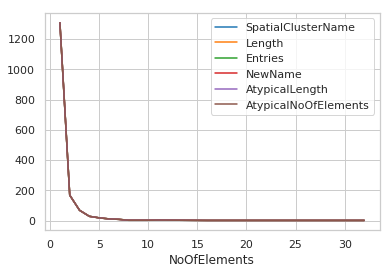

In [126]:
grpNoOfElements=spDF.groupby("NoOfElements")
grpNoOfElements.count().plot()
if saveFiguresAsPDF:
    plt.savefig('./figures/noelements_cluster.pdf')

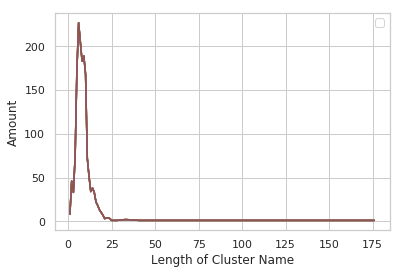

In [127]:
grpLength=spDF.groupby("Length")
grpLength.count().plot()
if saveFiguresAsPDF:
    plt.legend("")
    plt.ylabel("Amount")
    plt.xlabel("Length of Cluster Name")
    plt.savefig('./figures/length_spatialnames.pdf')

* "Poststempel", "Erscheinungsort", nicht entzifferbare Abkürzungen lassen sich so auffinden oder: St.Moritz Hotel, bzw. Kombinationen aus Verlagen und Orten; Signaturen/Referenzen: "Br117"; "VIII, 35"; (Budae,Budapest,Budapesten) wird als ein Cluster erkannt

* Excel weißt statistische Besonderheiten aus und ist alphabetisch anhand der Cluster sortiert, so kommt man in gut XX Minuten mit der Korrektur durch

* nicht alle Korrekturen sind manuell notwendig, da Ortsnamen auch Mehrsprachig in OSM oder GND(???) liegen
* Character Encoding -Probleme sind dort auch gut zu erkennen (Piešťany)

* consonant shift or sound changes

* durch die Aufbereitung in ca. 45 Minuten leistbar (inkl. Recherchen in Historischen Ortsnamen, OSM und Google)

In [128]:
spDF_manuallyCleaned=pd.read_excel("spatialnamesCorrections.xlsx")
spDF_manuallyCleaned.head(20)

,SpatialClusterName,Length,NoOfElements,Entries,NewName,AtypicalLength,AtypicalNoOfElements
0,1,1,1,1,.,True,False
1,2,1,1,2,.,True,False
2,2.,2,1,2.,.,True,False
3,50,2,1,50,.,True,False
4,??,2,1,??,.,True,False
5,A,1,1,A,.,True,False
6,A.,2,1,A.,.,True,False
7,Abel,4,1,Abel,NaN,True,False
8,Agra,4,1,Agra,NaN,True,False
9,Aigen/Salzburg,14,1,Aigen/Salzburg,Aigen,True,False


In [129]:
df3[df3.spatialClusterName=="Aigen/Salzburg"].head() # returns PPN771101503 and/or PPN771101589

,title,creator,subject,type,format,identifier,language,date,relation,publisher,coverage,rights,PPN,spatialClean,dateClean,spatialCluster,spatialClusterName
25296,Brief von Friederike von Kap-herr an Gerhart H...,"Kap-herr, Friederike von",Nachlässe und Autographe,manuscript,application/mets+xml,PPN771101589,de,None,Nachlass Gerhart Hauptmann digital,NaN,Aigen/Salzburg,NaN,PPN771101589,Aigen/Salzburg,NaN,389,Aigen/Salzburg


In [130]:
df3[df3.spatialClusterName=="1"].head() # returns PPN662043146 and PPN688520944

,title,creator,subject,type,format,identifier,language,date,relation,publisher,coverage,rights,PPN,spatialClean,dateClean,spatialCluster,spatialClusterName


## korrekturen einarbeiten; sagen, welche spalten wie ausgefüllt werden müssen; vorteil excel: leute kennen das tool und können sich alles anpassen, wie sie s brauchen

In [131]:
uniqueValues(df3)

title;		 unique values:	34855	 total count: 52391
creator;		 unique values:	17611	 total count: 41203
subject;		 unique values:	47	 total count: 52388
type;		 unique values:	8	 total count: 52391
format;		 unique values:	1	 total count: 52391
identifier;		 unique values:	41964	 total count: 52391
language;		 unique values:	106	 total count: 45463
date;		 unique values:	529	 total count: 37562
relation;		 unique values:	1207	 total count: 50709
publisher;		 unique values:	7326	 total count: 28455
coverage;		 unique values:	3489	 total count: 43269
rights;		 unique values:	12	 total count: 34658
PPN;		 unique values:	41964	 total count: 52391
spatialClean;		 unique values:	2385	 total count: 52347
dateClean;		 unique values:	510	 total count: 37394
spatialCluster;		 unique values:	1629	 total count: 52391
spatialClusterName;		 unique values:	1625	 total count: 52347


In [132]:
# df3.ix[df3["spatialClusterName"]=="Carlsruhe", "spatialClusterName"] = "Karlsruhe"
printLog("Fixing spatial cluster names on the basis of manual corrections...")
counterRemoved=0
counterAltered=0
ignoredSpatialNamesLowerCase=[]

for row in spDF_manuallyCleaned.iterrows():
    #py27 newName=readDate=unicode(row[1]["NewName"])
    #py27 oldName=unicode(row[1]["SpatialClusterName"])
    newName=str(row[1]["NewName"])
    oldName=row[1]["SpatialClusterName"]
    
    if newName==".":
        #print("Removed: "+row[1]["SpatialClusterName"])
        df3.ix[df3["spatialClusterName"]==oldName, "spatialClusterName"] = ""
        ignoredSpatialNamesLowerCase.append(oldName.lower())
        counterRemoved=counterRemoved+1
    elif newName=="nan":
        pass
    else:
        #print("Changed: "+row[1]["SpatialClusterName"])
        df3.ix[df3["spatialClusterName"]==oldName, "spatialClusterName"] = newName
        counterAltered=counterAltered+1
        
printLog("Done.")
printLog("Removed clusters: %i"%counterRemoved)
printLog("Altered clusters: %i"%counterAltered)

[2019-02-24 17:25:43.425438]	Fixing spatial cluster names on the basis of manual corrections...


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


[2019-02-24 17:25:50.766740]	Done.
[2019-02-24 17:25:50.767531]	Removed clusters: 62
[2019-02-24 17:25:50.768300]	Altered clusters: 186


gate 6

In [133]:
uniqueValues(df3)

title;		 unique values:	34855	 total count: 52391
creator;		 unique values:	17611	 total count: 41203
subject;		 unique values:	47	 total count: 52388
type;		 unique values:	8	 total count: 52391
format;		 unique values:	1	 total count: 52391
identifier;		 unique values:	41964	 total count: 52391
language;		 unique values:	106	 total count: 45463
date;		 unique values:	529	 total count: 37562
relation;		 unique values:	1207	 total count: 50709
publisher;		 unique values:	7326	 total count: 28455
coverage;		 unique values:	3489	 total count: 43269
rights;		 unique values:	12	 total count: 34658
PPN;		 unique values:	41964	 total count: 52391
spatialClean;		 unique values:	2385	 total count: 52347
dateClean;		 unique values:	510	 total count: 37394
spatialCluster;		 unique values:	1629	 total count: 52391
spatialClusterName;		 unique values:	1540	 total count: 52347


# spatialCluster-ID muss auch noch angepasst werden und der spatialClusterName-Anzahl entsprechen

Some debugging...

In [134]:
df3[df3.spatialClusterName=="Upsaliæ"].head()

,title,creator,subject,type,format,identifier,language,date,relation,publisher,coverage,rights,PPN,spatialClean,dateClean,spatialCluster,spatialClusterName


In [135]:
df3[df3.PPN=="PPN771101503"].head()

,title,creator,subject,type,format,identifier,language,date,relation,publisher,coverage,rights,PPN,spatialClean,dateClean,spatialCluster,spatialClusterName


In [136]:
df3[df3.PPN=="PPN662043146"].head()

,title,creator,subject,type,format,identifier,language,date,relation,publisher,coverage,rights,PPN,spatialClean,dateClean,spatialCluster,spatialClusterName


In [137]:
pickleCompress('./picklez/clean_dataframe.picklez',df3)
pickleCompress('./picklez/ignoredSpatialNames.picklez',ignoredSpatialNamesLowerCase)

[2019-02-24 17:26:09.766840]	Pickling to './picklez/clean_dataframe.picklez'
[2019-02-24 17:26:13.743269]	Pickling done.
[2019-02-24 17:26:13.744036]	Pickling to './picklez/ignoredSpatialNames.picklez'
[2019-02-24 17:26:13.745692]	Pickling done.


# Geodaten erzeugen

In [4]:
# uncomment only needed if you resume the notebook
df4=pickleDecompress('./picklez/clean_dataframe.picklez')
#ignoredSpatialNamesLowerCase=pickleDecompress('./picklez/ignoredSpatialNames.picklez')

# otherwise just run this line:
#df4=df3

[2019-02-24 18:23:13.138309]	Depickling from './picklez/clean_dataframe.picklez'
[2019-02-24 18:23:13.432153]	Depickling done.


In [5]:
# not tested with Python 3
if useGoogleMapsAPI:
    # idee ist, die Algorithmen von Google zu nutzen, um mit mitunter fehlerhaften, mehrsprachigen Ortsbezeichner umzugehen
    gmaps = googlemaps.Client(key=privateGoogleKey)
    # if you re-run this cell you might want to uncomment the following line
    latLng=dict()
    printLog("Fetching geolocations from Google Maps...")
    for row in df4.iterrows():
        if not row[1]["spatialClusterName"]:
            # in some cases, i.e., when the cluster was corrected manually above, 
            # we will ignore the spatialClean replacement
            loc=row[1]["spatialClean"]
            if loc:
                if not loc.lower() in ignoredSpatialNamesLowerCase:
                    printLog("Taking %s instead."%loc)
                else:
                    loc=None
        else:
            loc=row[1]["spatialClusterName"]
        if loc:
            if loc not in latLng:
                #printLog(loc)
                try:
                    retLL=gmaps.geocode(loc)
                    if len(retLL)>0:
                        latLng[loc]=retLL[0][u'geometry'][u'location']
                    else:
                        latLng[loc]=None
                except googlemaps.exceptions.ApiError:
                    printLog("Problem fetching: "+loc)
                    latLng[loc]=None
    printLog("Done.")

    triedAgain=[]
    printLog("Fetching geolocations from Google Maps a second time (aka the brute force failover solution)...")
    for row in df4.iterrows():
        if not row[1]["spatialClusterName"]:
            loc=row[1]["spatialClean"]
        else:
            loc=row[1]["spatialClusterName"]
        if loc:
            if latLng[loc]==None:
                if loc not in triedAgain:
                    #printLog(loc)
                    triedAgain.append(loc)
                    try:
                        retLL=gmaps.geocode(loc)
                        if len(retLL)>0:
                            latLng[loc]=retLL[0][u'geometry'][u'location']
                        else:
                            latLng[loc]=None
                    except googlemaps.exceptions.ApiError:
                        printLog("Problem fetching: "+loc)
                        latLng[loc]=None
    printLog("Done.")
    pickleCompress('./picklez/geo_coordinates.picklez',latLng)
else:
    printLog("Skipping Google Map API calls.")

[2019-02-24 18:23:15.328443]	Skipping Google Map API calls.


alternative with OpenStreetMap http://wiki.openstreetmap.org/wiki/Nominatim#Reverse_Geocoding

In [6]:
if not useGoogleMapsAPI:
    if getSpatialNamesFromOSM:
        osmNominatimURL="http://nominatim.openstreetmap.org/search?format=json&namedetails=1&q="
        # if you re-run this cell you might want to uncomment the following line
        latLng=dict()
        names=dict()
    
        maxItems=df4.shape[0]
        counter=0
    
        printLog("Fetching geolocations from OpenStreetMaps...")
        for row in df4.iterrows():
            counter=counter+1
            if counter%5000==0:
                printLog("\tProcessed %i items of %i"%(counter,maxItems))
            if not row[1]["spatialClusterName"]:
                # in some cases, i.e., when the cluster was corrected manually above, 
                # we will ignore the spatialClean replacement
                loc=str(row[1]["spatialClean"])
                if loc:
                    if not loc.lower() in ignoredSpatialNamesLowerCase:
                        printLog("No spatial cluster name for %s. Taking %s instead."%(row[1]["PPN"],loc))
                    else:
                        loc=None
            else:
                loc=str(row[1]["spatialClusterName"])
            if loc:
                if loc not in latLng:
                #printLog(loc)
                    locURL=osmNominatimURL+urllib.parse.quote(loc).replace(" ","+")
                    try:
                        data = json.load(urllib.request.urlopen(locURL))
                        latLng[loc]=dict()
                        if len(data)>0:
                            #print data[0]
                            latLng[loc][u'lat']=data[0]["lat"]
                            latLng[loc][u'lng']=data[0]["lon"]
                            #print loc
                            names[loc]=dict()
                            if len(data[0]['namedetails'])>0:
                                for k,v in data[0]['namedetails'].items():
                                    names[loc][k]=v
                            else:
                                names[loc][u'name']=loc
                                #print "No namedetails for "+loc
                            #print names[loc]
                        else:
                            latLng[loc]=None
                    except IOError:
                        printLog("\tCould not open: "+locURL)
                        pickleCompress('./picklez/save_names.picklez',names)
                        pickleCompress('./picklez/save_latLng.picklez',latLng)
                    time.sleep(1) # see http://wiki.openstreetmap.org/wiki/Nominatim_usage_policy
        printLog("Number of coordinates: %i"%len(latLng))
        printLog("Done.")
    else:
        printLog("Skipping OpenStreetMap API calls.")
else:
    printLog("Skipping OpenStreetMap API calls.")

[2019-02-24 18:23:17.547025]	Skipping OpenStreetMap API calls.


In [7]:
# for manual additions, you can directly pass an URL as the example below shows
#manualLocation="Kehl"
#data = json.load(urllib.urlopen("http://nominatim.openstreetmap.org/search?format=json&namedetails=1&q="+manualLocation))
#loc=manualLocation
#if len(data)>0:
#    latLng[loc][u'lat']=data[0]["lat"]
#    latLng[loc][u'lng']=data[0]["lon"]
#    names[loc]=dict()
#    if len(data[0]['namedetails'])>0:
#        for k,v in data[0]['namedetails'].items():
#            names[loc][k]=v
#    else:
#        names[loc][u'name']=loc
#else:
#    latLng[loc]=None

In [8]:
# save everything
if not useGoogleMapsAPI:
    if getSpatialNamesFromOSM:
        pickleCompress('./picklez/osm_names.picklez',names)
        pickleCompress('./picklez/osm_latLng.picklez',latLng)

In [9]:
if useGoogleMapsAPI:
    latLng=pickleDecompress('./picklez/geo_coordinates.picklez')
else:
    latLng=pickleDecompress('./picklez/osm_latLng.picklez')
    osmNames=pickleDecompress('./picklez/osm_names.picklez')

[2019-02-24 18:23:20.164649]	Depickling from './picklez/osm_latLng.picklez'
[2019-02-24 18:23:20.168933]	Depickling done.
[2019-02-24 18:23:20.169435]	Depickling from './picklez/osm_names.picklez'
[2019-02-24 18:23:20.187259]	Depickling done.


latitude und longitude aus den spatial names generieren

In [10]:
def getLat(spatialName):
    if spatialName:
        if spatialName in latLng:
            if latLng[spatialName]:
                return latLng[spatialName][u'lat']
            else:
                return np.nan
    else:
        return np.nan

def getLng(spatialName):
    if spatialName:
        if spatialName in latLng:
            if latLng[spatialName]:
                return latLng[spatialName][u'lng']
            else:
                return np.nan
    else:
        return np.nan

df4['latitude']=df4['spatialClusterName'].apply(getLat)
df4['longitude']=df4['spatialClusterName'].apply(getLng)

### lambda-Ausdruck ansprechen (Church aus theoretischer Informatik...)

In [11]:
# overwrite every "nulled" column (i.e. NULL or NaN) with -1
df4.ix[df4["dateClean"].isnull(), "dateClean"] = -1

df4["century"]=df4["dateClean"].apply(lambda x: int(int(x)/100)) # uns interessiert nur das jahrhundert
df4.head(20)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,title,creator,subject,type,format,identifier,language,date,relation,publisher,coverage,rights,PPN,spatialClean,dateClean,spatialCluster,spatialClusterName,latitude,longitude,century
0,Publikationsfragmente und Zeitungsausschnitt z...,"Boussingault, Jean-Baptiste",Alexander von Humboldt,manuscript,application/mets+xml,PPN829063234,fr,None,Nachlass Alexander von Humboldt digital,NaN,NaN,NaN,PPN829063234,,-1,,,NaN,NaN,0
1,Ein Recht geschickter und beglückter grosser F...,"Schmidt, Friedrich",Historische Drucke,monograph,application/mets+xml,PPN736737871,lat,1711,VD18 digital,Richter,Altenburg,CC BY-NC-SA 4.0 International,PPN736737871,Altenburg,1711,1002,Altenburg,50.9852411,12.4340988,17
2,Brief von Carl F. W. Behl an Gerhart Hauptmann,"Behl, Carl F. W.",Nachlässe und Autographe,manuscript,application/mets+xml,PPN77116016X,de,None,Nachlass Gerhart Hauptmann digital,NaN,Berlin,NaN,PPN77116016X,Berlin,-1,932,Berlin,52.5170365,13.3888599,0
3,Eyu Vrtayl Got=||tes vnsers Eegema||hels/ wie ...,"Hätzer, Ludwig",Historische Drucke,monograph,application/mets+xml,PPN798196564,ger,1524,VD16 digital,"Libisch, Kaspar",Breslau,CC BY-NC-SA 4.0 International,PPN798196564,Breslau,1524,927,Breslau,51.1089776,17.0326689,15
4,Il Capitano; Operette Comique Aus dem Beschluß...,"Schwemschuch, ...",Historische Drucke,monograph,application/mets+xml,PPN689276958,ita,1726,VD18 digital,Stromer,[Hamburg],CC BY-NC-SA 4.0 International,PPN689276958,Hamburg,1726,1027,Hamburg,53.550341,10.000654,17
5,Brief von Leopold von Berchtold an Margarete H...,"Berchtold, Leopold von",Nachlässe und Autographe,manuscript,application/mets+xml,PPN771163401,de,None,Nachlass Gerhart Hauptmann digital,NaN,Rapallo [Grand Hotel Savoia],NaN,PPN771163401,Rapallo,-1,57,Rapallo,44.3511473,9.229671,0
6,Sinfonien; orch; F-Dur; op.93,"Beethoven, Ludwig van",Musiknoten,monograph,application/mets+xml,PPN644450916,NaN,1812,NaN,NaN,NaN,NaN,PPN644450916,,1812,,,NaN,NaN,18
7,Brief von Louis Choris an Adelbert von Chamisso,"Choris, Louis",Nachlässe und Autographe,manuscript,application/mets+xml,PPN769823777,de,None,Nachlass Chamisso digital,NaN,Paris [ermittelt],NaN,PPN769823777,Paris,-1,428,Paris,48.8566101,2.3514992,0
8,Honestae & Piissimae matronae Annae Wederkops ...,"Avemann, Anna",Einblattdrucke,monograph,application/mets+xml,PPN833303600,lat,1616,VD17 digital - Digitalisierung der VD17-Unika ...,"Duncker, Andreas",Braunschweig,CC BY-NC-SA 4.0 International,PPN833303600,Braunschweig,1616,924,Braunschweig,52.2646577,10.5236066,16
9,Natalem Magnifico Illvstri Experientissimo Doc...,"Trillerus, Daniel Guilielmus",Historische Drucke,monograph,application/mets+xml,PPN716262320,lat,1767,VD18 digital,Dürr,Vitebergae,CC BY-NC-SA 4.0 International,PPN716262320,Vitebergae,1767,975,Vitebergae,NaN,NaN,17


In [12]:
grpCentury=df4.groupby("century")
grpCentury.describe()

title                                                                creator                                                           subject                                             type                           format                                     identifier                            language                    date                    relation                                                                 publisher                                           coverage  \
         count unique                                                top freq   count unique                                           top freq   count unique                          top  freq  count unique         top   freq  count unique                   top   freq      count unique            top freq    count unique  top  freq count unique   top  freq    count unique                                                top  freq     count unique                           top freq    count   
century                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
0        14997   8360                                      Korrespondenz  627   13506   3113                             B. Schott's Söhne  914   14994     28     Nachlässe und Autographe  6206  14997      8  manuscript  14314  14997      1  application/mets+xml  14997      14997  12321   PPN895543923    2     9319     69   de  6096   168     19  18XX    68    14833     42                 Nachlass Gerhart Hauptmann digital  4565        33     26          藤岡屋慶次郎 [フジオカヤ ケイジロウ]    2     9390   
10           2      1                            Muḫtaṣar ġarīb al-ḥadīṯ    2       2      1  Astarābāḏī, Abū-ʽAlī Ibn-al-Ḥusain Ibn-Aḥmad    2       2      1  Orientalische Handschriften     2      2      1   monograph      2      2      1  application/mets+xml      2          2      1   PPN655634029    2        2      1  ara     2     2      1  1071     2        2      1                Orientalische Handschriften digital     2         0      0                           NaN  NaN        0   
12           7      5     ar-Risāla aš-šarafīya fī 'n-nasab at-taʾlīfīya    2       6      4                           Banū-Mūsā Ibn-Šākir    2       7      3  Orientalische Handschriften     5      7      1   monograph      7      7      1  application/mets+xml      7          7      5   PPN635597942    2        7      4  ara     4     7      5  1210     2        7      2                Orientalische Handschriften digital     6         1      1                   東大寺 [トウダイジ]    1        2   
13           7      6              K. Radd maʿānī al-ayāt al-mutašābihāt    2       3      2       Ibn-al-Labbān, Aḥmad Ibn-ʿAbd-al-Muʾmin    2       7      2  Orientalische Handschriften     6      7      1   monograph      7      7      1  application/mets+xml      7          7      6   PPN618594752    2        7      3  ara     5     7      5  1379     2        2      1                Orientalische Handschriften digital     2         0      0                           NaN  NaN        0   
14         389    296  Ablassbrief zum besten des Kampfes gegen die T...    4     258    159                            Peraudi, Raimundus    8     389      8           Historische Drucke   287    389      1   monograph    389    389      1  application/mets+xml    389        389    315  PPN1014586402    2      371     14  lat   170   389     38  1490    29        7      1                Orientalische Handschriften digital     7       375    179              Martin Landsberg   17      378   
15        4071   3319  [Einband a

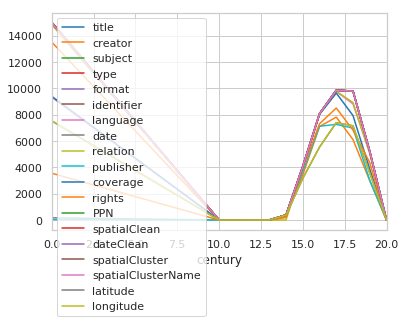

In [13]:
grpCentury.count().plot()

disclaimer: much more would be possible...

### Text-based Clustering

In [14]:
printLog("Number of unique title fields %i"%len(df4.title.unique()))

[2019-02-24 18:23:27.650080]	Number of unique title fields 34855


In [15]:
#title soll geclustert werden -> textCluster
corpus=df4.title.astype(str)

* k=100
* [2017-01-30 17:41:54.436239]	Clustering text with cluster target size 100
* [2017-01-30 17:53:04.512449]	Done.
* k=1000 (mini k-batch) 15 min
* k=2000 (mini k-batch) 27 min (bei 125k, ca. 6 min ohne Pickling + Pickling à 8min)
* k=5000 (125k, ca. 12 min. ohne Pickling +Pickling à 11 min))
* k=10000 (125k, ca. 90 min. ohne Pickling +Pickling à XX min))

In [16]:
# in Python 3 you cannot save files over 4 GB, hence we have to run the clustering everytime  :-/
true_k=5000

if sys.version_info.major>=3 or allowComputationallyExpensiveCalculations:
    printLog("Clustering text with cluster target size %i"%true_k)
    printLog("\t Preparing tf*idf model")
    # from an analysis we know that there are 167,715 different words in the corpus
    # to speed up processing, we limit the vocabulary size to the ca. top-75% of the words
    tfidfvectorizer = TfidfVectorizer(min_df=1,max_features=125000) #max_features is used to limit the vocabulary size 
    Xtfidf=tfidfvectorizer.fit_transform(corpus)
    featNames=tfidfvectorizer.get_feature_names()
    printLog("\t Number of feature names: %i"%len(featNames))

    printLog("\t K-Means clustering")
    km=MiniBatchKMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    # fit the k-means algorithm on the data created above
    km.fit(Xtfidf)
    printLog("Done.")
    if sys.version_info.major<3:
        pickleCompress('./picklez/textClustersK_'+str(true_k)+'.picklez',km)
else:
    km=pickleDecompress('./picklez/textClustersK_'+str(true_k)+'.picklez')
    printLog("\t Updating Dataframe")
# add the detected clusters as a new column to the original data frame
df4['textCluster']=km.labels_
printLog("Done.")

[2019-02-24 18:23:31.225129]	Clustering text with cluster target size 5000
[2019-02-24 18:23:31.225776]		 Preparing tf*idf model
[2019-02-24 18:23:32.504882]		 Number of feature names: 112277
[2019-02-24 18:23:32.505614]		 K-Means clustering


/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=5000. Setting it to 3*k
  init_size=init_size)


[2019-02-24 18:30:27.220735]	Done.
[2019-02-24 18:30:27.229591]	Done.


In [83]:
if allowComputationallyExpensiveCalculations:
    # group the data by the cluster and describe it
    df4.groupby('textCluster').describe()

In [17]:
df4=df4.sort_values(by="textCluster")
df4[['PPN','title','textCluster']].tail()

,PPN,title,textCluster
47481,PPN683224832,Indische schetsen,4998
50666,PPN683223674,Indische schetsen,4998
15664,PPN640046665,Indische schetsen; van Batavia naar Buitenzorg,4998
49623,PPN683223674,Indische schetsen,4998
49643,PPN683224123,Indische schetsen,4998


do the same with the creator column

In [18]:
#creator soll geclustert werden -> creatorCluster
corpus=df4.creator.astype(str)

In [19]:
printLog("Number of unique creator fields %i"%len(df4.creator.unique()))

[2019-02-24 18:30:46.958438]	Number of unique creator fields 17611


next cell may take a while

In [20]:
true_k=20000

if sys.version_info.major>=3 or allowComputationallyExpensiveCalculations:
    printLog("Clustering text with cluster target size %i"%true_k)
    printLog("\t Preparing tf*idf model")
    tfidfvectorizer = TfidfVectorizer(min_df=1) #max_features setzen?
    Xtfidf=tfidfvectorizer.fit_transform(corpus)
    featNames=tfidfvectorizer.get_feature_names()
    printLog("\t Number of feature names: %i"%len(featNames))

    printLog("\t K-Means clustering")
    km=MiniBatchKMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    # fit the k-means algorithm on the data created above
    km.fit(Xtfidf)
    if sys.version_info.major<3:
        pickleCompress('./picklez/creatorClustersK_'+str(true_k)+'.picklez',km)
else:
    km=pickleDecompress('./picklez/creatorClustersK_'+str(true_k)+'.picklez')

printLog("Done.")

[2019-02-24 18:30:56.546427]	Clustering text with cluster target size 20000
[2019-02-24 18:30:56.547225]		 Preparing tf*idf model
[2019-02-24 18:30:56.795198]		 Number of feature names: 14954
[2019-02-24 18:30:56.795797]		 K-Means clustering


/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=20000. Setting it to 3*k
  init_size=init_size)


[2019-02-24 18:34:49.618731]	Done.


In [21]:
# add the detected clusters as a new column to the original data frame
printLog("\t Updating Dataframe")
df4['creatorCluster']=km.labels_

df4=df4.sort_values(by="creatorCluster")
df4[['PPN','creator','creatorCluster']].tail()

[2019-02-24 18:36:29.156039]		 Updating Dataframe


,PPN,creator,creatorCluster
8261,PPN770918387,"Staël-Holstein, Anne Louise Germaine de",13491
6755,PPN770129455,"ʿUmarī, Yāsīn Ibn-Ḫairallāh al-Ḫaṭīb al-",13492
2411,PPN787773239,"Savoyen-Carignan, Eugen von",13493
51384,PPN752400479,"Arnauld de la Perière, Lothar von",13494
51544,PPN752400479,"Arnauld de la Perière, Lothar von",13494


In [22]:
pickleCompress('./picklez/clean_dataframe_with_century.picklez',df4)

[2019-02-24 18:36:35.425121]	Pickling to './picklez/clean_dataframe_with_century.picklez'
[2019-02-24 18:36:40.023522]	Pickling done.


In [23]:
df4.to_csv("cleanedData.csv",sep=';',header=True, index=False, encoding='utf-8')

## The Analyses Shall Begin!
safe to continue from here if you resume the notebook...

In [92]:
# if you have run this notebook from top to bottom, you don't have to reload the data
df4=pickleDecompress('./picklez/clean_dataframe_with_century.picklez')
grpCentury=df4.groupby("century")
#df4.shape

[2017-02-27 17:04:07.504126]	Depickling from './picklez/clean_dataframe_with_century.picklez'
[2017-02-27 17:04:11.265011]	Depickling done.


In [24]:
df4.head()

,title,creator,subject,type,format,identifier,language,date,relation,publisher,coverage,rights,PPN,spatialClean,dateClean,spatialCluster,spatialClusterName,latitude,longitude,century,textCluster,creatorCluster
42749,"Der beglückseeligte Sclav, oder Personirte auf...","Raethel, Wolfgang Christoph",Historische Drucke,monograph,application/mets+xml,PPN748918132,ger,1689,Preußen 17 digital - Digitalisierung des im VD...,Birckner,Erffut,Public Domain Mark 1.0,PPN748918132,Erffut,1689,412,Erfurt,50.9777974,11.0287364,16,50,0
45614,"Der beglückseeligte Sclav, oder Personirte auf...","Raethel, Wolfgang Christoph",Historische Drucke,monograph,application/mets+xml,PPN748918132,ger,1689,Preußen 17 digital - Digitalisierung des im VD...,Birckner,Erffut,Public Domain Mark 1.0,PPN748918132,Erffut,1689,412,Erfurt,50.9777974,11.0287364,16,50,0
4244,"... Morgenröthe Der Dunkeln Frage; Was von, he...","Raethel, Wolfgang Christoph",Historische Drucke,monograph,application/mets+xml,PPN687536340,ger,1702,VD18 digital,NaN,Neapolis,CC BY-NC-SA 4.0 International,PPN687536340,Neapolis,1702,393,Napoli,40.8359336,14.2487826,17,50,0
40534,Kanzlei-Ordnung vom 9. Februar 1895; (Beilage ...,NaN,Rechtswissenschaft,monograph,application/mets+xml,PPN718782011,ger,1895,Deutsches Territorialrecht des 19. Jahrhunderts,v. Decker,Berlin,Public Domain Mark 1.0,PPN718782011,Berlin,1895,932,Berlin,52.5170365,13.3888599,18,50,1
46628,Verslag van het inlandsch onderwijs in Nederla...,NaN,Historische Drucke,periodical,application/mets+xml,PPN770544800,dut,1868,"SSG 6,25 Digital : Digitalisierung des Sonders...",NaN,Batavia,UNKNOWN,PPN770544800,Batavia,1868,307,Batavia,-6.1753942,106.827183,18,1753,1


### Speeding things up

dauert ca.40 min mit Zugriff innerhalb der Schleife mittels df4[df4.PPN==ppn].iloc[-1]['title'], deshalb look-up, so dauert alles komplett ca. 40 Sekunden.

In [28]:
printLog("Creating PPN look-up table...")
ppnLookup=dict()
for row in df4.iterrows():
    ppn=readDate=str(row[1]["PPN"])
    if ppn not in ppnLookup:
        ppnLookup[ppn]=dict()
    # it is redundant but handy for later JSON exports to save the PPN as a value as well
    ppnLookup[ppn]["ppn"]=ppn
    ppnLookup[ppn]["dateClean"]=str(row[1]["dateClean"])
    ppnLookup[ppn]["title"]=str(row[1]["title"])
    ppnLookup[ppn]["creator"]=str(row[1]["creator"])
    
    if not row[1]["spatialClusterName"]:
        if row[1]["spatialClean"]:
            ppnLookup[ppn]["spatialClusterName"]=row[1]["spatialClean"]
        else:
            ppnLookup[ppn]["spatialClusterName"]="None"
    else:
        ppnLookup[ppn]["spatialClusterName"]=row[1]["spatialClusterName"] 
    ppnLookup[ppn]['spatialClean']=row[1]["spatialClean"]
    ppnLookup[ppn]['spatialRaw']=str(row[1]["coverage"])
    ppnLookup[ppn]['mediatype']=str(row[1]["type"])
    ppnLookup[ppn]['subject']=str(row[1]["subject"])
    # daz
    #ppnLookup[ppn]['source']=str(row[1]["source"])
    ppnLookup[ppn]['publisher']=str(row[1]["publisher"])
    #ppnLookup[ppn]['alternative']=str(row[1]["alternative"])
    ppnLookup[ppn]['lat']=str(row[1]["latitude"])
    ppnLookup[ppn]['lng']=str(row[1]["longitude"])
    ppnLookup[ppn]['textCluster']=str(row[1]["textCluster"])
    ppnLookup[ppn]['creatorCluster']=str(row[1]["creatorCluster"])
    
pickleCompress("./picklez/ppnLookup.picklez",ppnLookup)
printLog("Done.")

[2019-02-24 18:38:26.005332]	Creating PPN look-up table...
[2019-02-24 18:38:33.696215]	Pickling to './picklez/ppnLookup.picklez'
[2019-02-24 18:38:35.677155]	Pickling done.
[2019-02-24 18:38:35.677950]	Done.


In [29]:
#serialize data per PPN; one large file would be more than 80 MB and thus too much for a transmission to a browser
if serializePPNLookup2JSON:
    printLog("Serializing PPN lookup table to JSON in directory:\n\t"+jsonWebDir)
    for k in ppnLookup:
        dump=json.dumps(ppnLookup[k])

        jsonFile = open(jsonWebDir+k+".json", "w")
        jsonFile.write(dump)
        jsonFile.close()
    printLog("Done.")

[2019-02-24 18:41:29.342783]	Serializing PPN lookup table to JSON in directory:
	./web/data/ppn/
[2019-02-24 18:41:35.932393]	Done.


### A Creation and Its Place of Origin - Graphing the Library World
build a network graph: do publishers and their publication locations resemble superheroes?
verbindung publisher/creator - spatialClusterName; dazu: dateClean, century, title

In [30]:
def createGraph(consideredDataFrame):
    # for testing purposes it is handy to limit the number of records
    #consideredDataFrame=consideredDataFrame[(consideredDataFrame.Year>=1961) & (consideredDataFrame.Year<1975)]

    # create an empty graph from the nx (networkx) package imported above
    G=nx.Graph()

    rowCount=0
    seenCreators=[]
    seenLocations=[]
    for row in consideredDataFrame.iterrows():
        rowCount=rowCount+1
        #if rowCount%1000==0:
        #    printLog("Processed %i rows..."%rowCount)
        ppn=row[1]["PPN"]
        creator=str(row[1]["publisher"]).upper()
        if creator=="NAN":
            creator=str(row[1]["creator"]).upper()
        if creator=="NAN":
            creator="Unknown creator"
        
        location=row[1]["spatialClusterName"]
        if location=="NAN":
            location="s. l."
        elif not location:
            location="s. l."
        year=row[1]["dateClean"]
        subject=row[1]["subject"]
        
        #if not creator in G.nodes():
        #if not creator in seenCreators:
        
        G.add_node(creator)
        if not creator=="Unknown creator":
            # the name attribute will be helpful for D3.js visualizations
            G.node[creator]['name'] = creator
            G.node[creator]['year'] = year
            G.node[creator]['type'] = "creator"
            G.node[creator]['subject']=subject
            G.node[creator]['century']=row[1]["century"]
            seenCreators.append(creator)
        else:
            G.node[creator]['name'] = creator
            G.node[creator]['year'] = year
            G.node[creator]['type'] = "no_creator"
        
        #if not location in G.nodes():
        #if not location in seenLocations:
       
        # the name attribute will be helpful for D3.js visualizations
        if not location=="s. l.":
            G.add_node(location)
            G.node[location]['name'] = location
            G.node[location]['year'] = year
            G.node[location]['type'] = "location"
            seenLocations.append(location)
            G.add_edge(creator,location)
        else:
            pass
        # if we would like to add the unknown location, uncomment the following lines and the comment the last line
            #G.add_node(location)
            #G.node[location]['name'] = location
            #G.node[location]['year'] = year
            #G.node[location]['type'] = "no_location"
    
        #print location
        #print creator
        #print "* * *"
    return G

In [97]:
printLog("Creating graphs and additional data...")

graphsPerCentury=dict()
ppnPerCentury=OrderedDict()
for century in range(7,21): # we know that there are only media from the 7th century on
    if century in grpCentury.groups:
        centDF=grpCentury.get_group(century)
        returnedGraph=createGraph(centDF)
        graphsPerCentury[century]=returnedGraph
        printLog("Graph for century %i built with %i nodes and %i edges."%(century, len(returnedGraph.nodes()),len(returnedGraph.edges())))
        # export as GraphML, which can be read by Gephi
        nx.write_gml(returnedGraph,"graphs/century_"+str(century)+".gml")
        
        # now save the PPNs
        ppnPerCentury[century]=[]
        for row in centDF.iterrows():
            ppn=row[1]["PPN"]
            ppnPerCentury[century].append(ppn)

# create the full graph
returnedGraph=createGraph(df4)
printLog("Graph for all centuries built with %i nodes and %i edges."%(len(returnedGraph.nodes()),len(returnedGraph.edges())))
nx.write_gml(returnedGraph,"graphs/all_centuries.gml")
printLog("Done.")

[2017-02-27 17:11:07.972650]	Creating graphs and additional data...
[2017-02-27 17:11:09.117767]	Graph for century 7 built with 2 nodes and 1 edges.
[2017-02-27 17:11:09.163712]	Graph for century 10 built with 1 nodes and 0 edges.
[2017-02-27 17:11:09.169283]	Graph for century 11 built with 1 nodes and 0 edges.
[2017-02-27 17:11:09.176344]	Graph for century 12 built with 14 nodes and 3 edges.
[2017-02-27 17:11:09.185147]	Graph for century 13 built with 11 nodes and 0 edges.
[2017-02-27 17:11:09.352734]	Graph for century 14 built with 214 nodes and 160 edges.
[2017-02-27 17:11:12.050143]	Graph for century 15 built with 2062 nodes and 1886 edges.
[2017-02-27 17:11:16.225058]	Graph for century 16 built with 3762 nodes and 3429 edges.
[2017-02-27 17:11:32.933369]	Graph for century 17 built with 22098 nodes and 18881 edges.
[2017-02-27 17:11:45.075152]	Graph for century 18 built with 4733 nodes and 4305 edges.
[2017-02-27 17:11:47.480373]	Graph for century 19 built with 1185 nodes and 854 e

In [31]:
def createFullGraph(consideredDataFrame):
    # for testing purposes it is handy to limit the number of records
    #consideredDataFrame=consideredDataFrame[(consideredDataFrame.Year>=1961) & (consideredDataFrame.Year<1975)]

    # create an empty graph from the nx (networkx) package imported above
    G=nx.Graph()

    rowCount=0
    seenCreators=[]
    seenLocations=[]
    for row in consideredDataFrame.iterrows():
        rowCount=rowCount+1
        #if rowCount%1000==0:
        #    printLog("Processed %i rows..."%rowCount)
        ppn=row[1]["PPN"]
        creator=str(row[1]["publisher"]).upper()
        if creator=="NAN":
            creator=str(row[1]["creator"]).upper()
        if creator=="NAN":
            creator="Unknown creator"
        
        location=row[1]["spatialClusterName"]
        if location=="NAN":
            location="s. l."
        elif not location:
            location="s. l."
        year=row[1]["dateClean"]
        subject=row[1]["subject"]
        
        #if not creator in G.nodes():
        #if not creator in seenCreators:
        
        G.add_node(creator)
        if not creator=="Unknown creator":
            # the name attribute will be helpful for D3.js visualizations
            G.node[creator]['name'] = creator
            G.node[creator]['year'] = year
            G.node[creator]['type'] = "creator"
            G.node[creator]['subject']=subject
            G.node[creator]['century']=row[1]["century"]
            seenCreators.append(creator)
        else:
            G.node[creator]['name'] = creator
            G.node[creator]['year'] = year
            G.node[creator]['type'] = "no_creator"
        
        #if not location in G.nodes():
        #if not location in seenLocations:
       
        # the name attribute will be helpful for D3.js visualizations
        if not location=="s. l.":
            G.add_node(location)
            G.node[location]['name'] = location
            G.node[location]['year'] = year
            G.node[location]['type'] = "location"
            seenLocations.append(location)
            G.add_edge(creator,location)
        else:
            pass
        # if we would like to add the unknown location, uncomment the following lines and the comment the last line
            #G.add_node(location)
            #G.node[location]['name'] = location
            #G.node[location]['year'] = year
            #G.node[location]['type'] = "no_location"
    
        #print location
        #print creator
        #print "* * *"
        
        G.add_node(ppn)
        G.node[ppn]['name'] = str(ppn)
        G.node[ppn]['year'] = year
        G.node[ppn]['type'] = "PPN"
        G.node[ppn]['century']=row[1]["century"]
        G.add_edge(ppn,creator)

    return G

In [99]:
printLog("Creating graphs incl. PPNs...")

graphsPerCentury=dict()
for century in range(7,21): # we know that there are only media from the 7th century on
    if century in grpCentury.groups:
        centDF=grpCentury.get_group(century)
        returnedGraph=createFullGraph(centDF)
        graphsPerCentury[century]=returnedGraph
        gmlPath="graphs/century_ppn_"+str(century)+".gml"
        # export as GraphML, which can be read by Gephi
        nx.write_gml(returnedGraph,gmlPath)
        printLog("Graph for century %i built with %i nodes and %i edges (see %s)."%(century, len(returnedGraph.nodes()),len(returnedGraph.edges()),gmlPath))
        

# create the full graph
returnedGraph=createFullGraph(df4)
gmlPath="graphs/all_centuries_ppn.gml"
nx.write_gml(returnedGraph,gmlPath)
printLog("Graph for all centuries built with %i nodes and %i edges (see %s)."%(len(returnedGraph.nodes()),len(returnedGraph.edges()),gmlPath))
printLog("Done.")

[2017-02-27 17:12:11.481736]	Creating graphs incl. PPNs...
[2017-02-27 17:12:11.632080]	Graph for century 7 built with 3 nodes and 2 edges (see graphs/century_ppn_7.gml).
[2017-02-27 17:12:11.641930]	Graph for century 10 built with 2 nodes and 1 edges (see graphs/century_ppn_10.gml).
[2017-02-27 17:12:11.647937]	Graph for century 11 built with 2 nodes and 1 edges (see graphs/century_ppn_11.gml).
[2017-02-27 17:12:11.664057]	Graph for century 12 built with 28 nodes and 17 edges (see graphs/century_ppn_12.gml).
[2017-02-27 17:12:11.677614]	Graph for century 13 built with 28 nodes and 17 edges (see graphs/century_ppn_13.gml).
[2017-02-27 17:12:11.975205]	Graph for century 14 built with 504 nodes and 450 edges (see graphs/century_ppn_14.gml).
[2017-02-27 17:12:14.688869]	Graph for century 15 built with 12711 nodes and 12535 edges (see graphs/century_ppn_15.gml).
[2017-02-27 17:12:18.188772]	Graph for century 16 built with 17967 nodes and 17634 edges (see graphs/century_ppn_16.gml).
[2017-0

In [100]:
# takes ca. 45 min for a graph built with 16368 nodes and 18539 edges on my MacBook Pro, i.e., with the full data set
# with http://networkx.github.io/documentation/latest/reference/generated/networkx.drawing.layout.spring_layout.html#networkx.drawing.layout.spring_layout
# theory behind it: https://en.wikipedia.org/wiki/Force-directed_graph_drawing
#printLog("Preparing to draw...")

#nx.draw(G)
#plt.savefig("graph.pdf")
#printLog("Done.")

generic graph building

In [32]:
def createGenericGraph(consideredDataFrame):
    # for testing purposes it is handy to limit the number of records
    #consideredDataFrame=consideredDataFrame[(consideredDataFrame.Year>=1961) & (consideredDataFrame.Year<1975)]

    # create an empty graph from the nx (networkx) package imported above
    G=nx.Graph()

    rowCount=0
    seenCreators=[]
    seenLocations=[]
    # [u'PPN', u'alternative', u'creator', u'dataProvider', u'date', 
    # u'description', u'format', u'identifier', u'isShownAt', u'issued', 
    # u'object', u'provider', u'publisher', u'relation', u'rights', u'source', 
    # u'spatial', u'subject', u'title', u'type', u'spatialClean', u'dateClean', 
    # u'spatialCluster', u'spatialClusterName', u'latitude', u'longitude', u'century']
    ignoreList=[u'rights', u'issued',u'source',u'spatial',u'dataProvider', u'date',u'format',u'spatialCluster',u'century', u'provider']
    for row in consideredDataFrame.iterrows():#itertuples(): 
        ppn=val=row[1]["PPN"]
        G.add_node(ppn)
        G.node[ppn]['name'] = ppn
        G.node[ppn]['type'] = "PPN"
            
        keys=row[1].keys()
        for k in keys:
            elementEmpty=False
            if k not in ignoreList:
                #print k
                val=row[1][k]
                if val: 
                    if type(val) is float:
                        if not math.isnan(val):
                            #print row[1][k]
                            pass
                        else:
                            #print "I DON'T KNOW!"
                            elementEmpty=True
                    else:
                        #print row[1][k]
                        pass
                else:
                    #print "I DON'T KNOW!"
                    elementEmpty=True
                
                # only process non-empty elements
                if not elementEmpty:
                    if not val in G.nodes():
                        G.add_node(val)
                        G.node[val]['name'] = val
                        G.node[val]['type'] = k
                    
                    G.add_edge(ppn,val)
            
        # spatialClean auf spatialClusterName binden, den rest dann mit spatialClusterName
        # spatialClusterName erhält als Attribut latitude/longitude

       

    return G

**ACHTUNG!** Dauert ggf. einige Stunden auf dem MacBook

In [33]:
if allowComputationallyExpensiveCalculations:
    saveDir="./graphs/generics/"
    if not os.path.exists(saveDir):
        os.makedirs(saveDir)
        
    printLog("Creating graphs incl. PPNs...")

    graphsPerCentury=dict()
    for century in range(7,21):#(7,21): # we know that there are only media from the 7th century on
        if century in grpCentury.groups:
            centDF=grpCentury.get_group(century)
            returnedGraph=createGenericGraph(centDF)
            graphsPerCentury[century]=returnedGraph
            gmlPath="graphs/generics/full_"+str(century)+".gml"
            # export as GraphML, which can be read by Gephi
            nx.write_gml(returnedGraph,gmlPath)
            printLog("Graph for century %i built with %i nodes and %i edges (see %s)."%(century, len(returnedGraph.nodes()),len(returnedGraph.edges()),gmlPath))
    printLog("Done.")

[2019-02-24 18:45:16.671811]	Creating graphs incl. PPNs...
[2019-02-24 18:45:16.679999]	Graph for century 10 built with 9 nodes and 9 edges (see graphs/generics/full_10.gml).
[2019-02-24 18:45:16.684757]	Graph for century 12 built with 39 nodes and 51 edges (see graphs/generics/full_12.gml).
[2019-02-24 18:45:16.689364]	Graph for century 13 built with 31 nodes and 46 edges (see graphs/generics/full_13.gml).
[2019-02-24 18:45:16.832386]	Graph for century 14 built with 1232 nodes and 3644 edges (see graphs/generics/full_14.gml).
[2019-02-24 18:45:18.197709]	Graph for century 15 built with 9972 nodes and 41820 edges (see graphs/generics/full_15.gml).
[2019-02-24 18:45:20.951341]	Graph for century 16 built with 20584 nodes and 81040 edges (see graphs/generics/full_16.gml).
[2019-02-24 18:45:24.191510]	Graph for century 17 built with 25314 nodes and 99979 edges (see graphs/generics/full_17.gml).
[2019-02-24 18:45:27.091435]	Graph for century 18 built with 22423 nodes and 88922 edges (see gr

xxx

In [34]:
grpCentury.get_group(17).count()

title                 9849
creator               7809
subject               9849
type                  9849
format                9849
identifier            9849
language              9751
date                  9849
relation              9779
publisher             7256
coverage              9633
rights                8501
PPN                   9849
spatialClean          9847
dateClean             9849
spatialCluster        9849
spatialClusterName    9847
latitude              7388
longitude             7388
century               9849
textCluster           9849
dtype: int64

### Exploring the Collection by Visual Content
* reading the feature files takes approx. 12 min
* erklären, woher die CBIR features kommen (https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision)

![Visual Words](img/visword.jpg)
By Masterwaw - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=19645418

Scale-invariant feature transform, reference for local feature detection

![Visual Word Generation](img/visword_generation2.png)

int sampleDocumentsToCreateCodebook = 5000; 
int numberOfClusters = 1000;

next step takes ca. 40 minutes if the raw features are loaded from disk and converted

In [104]:
featureBaseDir="./featureFiles.5k1k/"
missingPPNs=[]
readPPNs=[]
featuresPPN=[]
featsPerCentury=dict()
readPpnPerCentury=dict()

printLog("Loading features...")
if reinterpretVisualWordRawFeatures:
    for century in range(7,21):
        if century in grpCentury.groups:
            featsPerCentury[century]=[]
    for century in range(7,21):
        if century in grpCentury.groups:
            readPpnPerCentury[century]=[]

    index=0
    for row in df4.iterrows():
        index=index+1
        if index%10000==0:
            printLog("Processed %i documents."%index)
        ppn=str(row[1]["PPN"])
        if os.path.isfile(featureBaseDir+ppn+".csv"):
            #print ppn+" okay."
            featFile=open(featureBaseDir+ppn+".csv")
            for line in featFile:
                feature=line
            tokens=feature.split()
            harray=[]
            for t in tokens:
                harray.append(int(t,16))
            featFile.close()

            readPPNs.append(ppn)
            featuresPPN.append(np.array(harray,dtype=np.uint8))
            # check to which century the feature belongs
            for century in range(7,21):
                if century in grpCentury.groups:
                    if ppn in ppnPerCentury[century]:
                        readPpnPerCentury[century].append(ppn)
                        featsPerCentury[century].append(np.array(harray,dtype=np.uint8))
        else:
            missingPPNs.append(ppn)
    printLog("Done.")
    printLog("Number of missing PPNs: %i"%len(missingPPNs))
    
    # pickling takes about 15 minutes
    pickleCompress('./picklez/missingPPNs.picklez',missingPPNs)
    pickleCompress('./picklez/readPPNs.picklez',readPPNs)
    pickleCompress('./picklez/featuresPPN.picklez',featuresPPN)
    pickleCompress('./picklez/featsPerCentury.picklez',featsPerCentury)
    pickleCompress('./picklez/readPpnPerCentury.picklez',readPpnPerCentury)
    printLog("Pickling completed.")
else:
    # takes about 1 minute
    missingPPNs=pickleDecompress('./picklez/missingPPNs.picklez')
    readPPNs=pickleDecompress('./picklez/readPPNs.picklez')
    featuresPPN=pickleDecompress('./picklez/featuresPPN.picklez')
    featsPerCentury=pickleDecompress('./picklez/featsPerCentury.picklez')
    readPpnPerCentury=pickleDecompress('./picklez/readPpnPerCentury.picklez')
    printLog("Loading from disk completed.")

[2017-02-27 17:13:17.440180]	Loading features...
[2017-02-27 17:13:17.441368]	Depickling from './picklez/missingPPNs.picklez'
[2017-02-27 17:13:17.459297]	Depickling done.
[2017-02-27 17:13:17.460725]	Depickling from './picklez/readPPNs.picklez'
[2017-02-27 17:13:17.514925]	Depickling done.
[2017-02-27 17:13:17.515719]	Depickling from './picklez/featuresPPN.picklez'
[2017-02-27 17:13:27.096644]	Depickling done.
[2017-02-27 17:13:27.097489]	Depickling from './picklez/featsPerCentury.picklez'
[2017-02-27 17:13:36.340991]	Depickling done.
[2017-02-27 17:13:36.341835]	Depickling from './picklez/readPpnPerCentury.picklez'
[2017-02-27 17:13:36.396439]	Depickling done.
[2017-02-27 17:13:36.397545]	Loading from disk completed.


* Clustering of 101031 elements started with 1000 as cluster target size: 3 min
* note that the cluster labels vary for each run

In [105]:
# working with all features will most likely halt your computer because of the memory consumption if you use KMeans!
feats=featuresPPN#[:20000] 

# define the number of clusters to be found
true_k=1000
printLog("Clustering of %i elements started with %i as cluster target size."%(len(feats),true_k))
# initialize the k-means algorithm
#km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
# we will rely on the mini batch k-means algorithm due to performance consideration otherwise your computer might crash...
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

# apply the algorithm on the data
km.fit(feats)
printLog("Clustering finished.")
km.labels_

[2017-02-27 17:13:36.413121]	Clustering of 101031 elements started with 1000 as cluster target size.


/Users/david/anaconda/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:1381: RuntimeWarning: init_size=300 should be larger than k=1000. Setting it to 3*k
  init_size=init_size)


[2017-02-27 17:17:09.986306]	Clustering finished.


array([648, 225, 566, ..., 355, 888, 888], dtype=int32)

In [106]:
saveDir="./html/_clusteroverview_allcents/"
if not os.path.exists(saveDir):
        os.makedirs(saveDir)
        
imgDir="../../web/thumbnails/"
#imgDir="file:///Volumes/2TB_WD/sbb_images/tmp/"
htmlHead="<html><head></head><body bgcolor='#000000'>"
htmlTail="</body></html>"
clusters=dict()
for i,val in enumerate(km.labels_):
    if val not in clusters:
        clusters[val]=[]
    clusters[val].append(readPPNs[i])
#print clusters
for i in clusters:
    htmlOut=open(saveDir+str(i)+".html","w")
    htmlOut.write(htmlHead+"\n")
    htmlOut.write("<a href='"+str(i-1)+".html'>last</a> &nbsp;"+"<a href='"+str(i+1)+".html'>next</a>\n"+"<br />")
    for ppn in clusters[i]:
        htmlOut.write("<img width='170' src='"+imgDir+ppn+".jpg' />\n")
    htmlOut.write(htmlTail)
    htmlOut.close()

repeat the same step for each century...

In [107]:
clustersPerCentury=dict()
maxClusterAmount=100
printLog("Starting clustering per century...")
for century in featsPerCentury:
    maxClusters=len(featsPerCentury[century])
    # define the number of clusters to be found
    true_k=int(maxClusters*0.1+1)
    # restrict the number of clusters to prevent extremely large clusters
    if true_k>(maxClusterAmount*2):
        true_k=maxClusterAmount+int(maxClusters*0.005)
    elif true_k>maxClusterAmount:
        true_k=maxClusterAmount+int(maxClusters*0.01)
    printLog("Clustering of %i element(s) started with %i as cluster target size for century %i."%(maxClusters,true_k,century))
    # initialize the k-means algorithm
    #km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    # we will rely on the mini batch k-means algorithm due to performance consideration otherwise your computer might crash...
    km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

    # apply the algorithm on the data
    km.fit(featsPerCentury[century])
    clustersPerCentury[century]=km.labels_
printLog("Clustering finished.")

[2017-02-27 17:17:13.731497]	Starting clustering per century...
[2017-02-27 17:17:13.733213]	Clustering of 1 element(s) started with 1 as cluster target size for century 7.
[2017-02-27 17:17:13.948313]	Clustering of 1 element(s) started with 1 as cluster target size for century 10.
[2017-02-27 17:17:14.103660]	Clustering of 1 element(s) started with 1 as cluster target size for century 11.
[2017-02-27 17:17:14.226303]	Clustering of 14 element(s) started with 2 as cluster target size for century 12.
[2017-02-27 17:17:14.388356]	Clustering of 14 element(s) started with 2 as cluster target size for century 13.
[2017-02-27 17:17:14.816381]	Clustering of 282 element(s) started with 29 as cluster target size for century 14.
[2017-02-27 17:17:15.375360]	Clustering of 7394 element(s) started with 136 as cluster target size for century 15.
[2017-02-27 17:17:19.491346]	Clustering of 10653 element(s) started with 153 as cluster target size for century 16.
[2017-02-27 17:17:23.149179]	Clustering o

/Users/david/anaconda/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:1381: RuntimeWarning: init_size=300 should be larger than k=430. Setting it to 3*k
  init_size=init_size)


[2017-02-27 17:18:25.701194]	Clustering of 14107 element(s) started with 170 as cluster target size for century 18.
[2017-02-27 17:18:30.518772]	Clustering of 1937 element(s) started with 119 as cluster target size for century 19.
[2017-02-27 17:18:33.055171]	Clustering of 2 element(s) started with 1 as cluster target size for century 20.
[2017-02-27 17:18:33.348364]	Clustering finished.


Computing 'centroids' takes up to 6 minutes;

In [108]:
clusterCentroidsPerCentury=dict()
numberCentroids=0

printLog("Computing 'centroids' for...")

for century in clustersPerCentury:
    printLog("\tcentury %i"%century)
    clusters=dict()
    centFeats=dict()

    for i,val in enumerate(clustersPerCentury[century]):
        if val not in centFeats:
            centFeats[val]=[]
        if val not in clusters:
            clusters[val]=[]
        index=readPPNs.index(readPpnPerCentury[century][i])
        clusters[val].append(readPpnPerCentury[century][i])
        centFeats[val].append(featuresPPN[index])

    clusterCentroidsPerCentury[century]=dict()
    for cluster in centFeats:
        r=centFeats[cluster]
        meanDistances=[]
        D=pairwise_distances(r,r)
        #A distance matrix D such that D_{i, j} is the distance between the ith and jth vectors of the given matrix X, if Y is None.
        #If Y is not None, then D_{i, j} is the distance between the ith array from X and the jth array from Y.
        # distance between element 0 and 13 (=0.0 if X and Y are anti-correlated)
        #D[0][13]
        for row in D:
            # each row in D stands for one document and its distances to all other documents
            # by calculating its mean, we compute how dissimilar this document is to all others
            meanDistances.append(np.mean(row))
        #print meanDistances
        minVal=np.min(meanDistances)
        index=meanDistances.index(minVal)
        clusterCentroidsPerCentury[century][cluster]=clusters[cluster][index]
        numberCentroids=numberCentroids+1
        #print str(cluster)+": "+str(clusters[cluster][index])+" (of %i elements)"%len(meanDistances)

printLog("Done computing %i 'centroids'."%numberCentroids)


[2017-02-27 17:18:33.395350]	Computing 'centroids' for...
[2017-02-27 17:18:33.396930]		century 7
[2017-02-27 17:18:33.407624]		century 10
[2017-02-27 17:18:33.411894]		century 11
[2017-02-27 17:18:33.419147]		century 12
[2017-02-27 17:18:33.442223]		century 13
[2017-02-27 17:18:33.468017]		century 14
[2017-02-27 17:18:34.227471]		century 15
[2017-02-27 17:18:54.457595]		century 16
[2017-02-27 17:19:26.488116]		century 17
[2017-02-27 17:24:09.278466]		century 18
[2017-02-27 17:25:08.837132]		century 19
[2017-02-27 17:25:12.265628]		century 20
[2017-02-27 17:25:12.270326]	Done computing 1038 'centroids'.


* iterate over all centuries and save output per centroids
* CSV output is for the visualization with the web-based QA tools

In [109]:
saveDir="./html/_clusteroverview_per_century/"
if not os.path.exists(saveDir):
        os.makedirs(saveDir)
        
printLog("Creating HTML and CSV output...")

# limits the shown PPNs per century-separated cluster
limitClusterCentroidsPerCentury=10
# for the cluster detail views limitClusterCentroidsPerCentury*centuryLimitFactor elements will be displayed per centroid
centuryLimitFactor=3

csvOut=open("./web/data/clusters.csv","w")
csvOut.write("id,value\n")
rootNode="all."
csvOut.write("all,"+"\n")

for century in clustersPerCentury:
    largestClusterSize=0
    largestCluster=None
    
    csvCenturyOut=open("./web/data/"+str(century)+".csv","w")
    csvCenturyOut.write("id,value\n")
    rootCenturyNode="all"
    csvCenturyOut.write(rootCenturyNode+","+"\n")
    
    csvOut.write("all."+str(century)+","+"\n")
    
    saveDir="./html/_clusteroverview_per_century/"+str(century)+"/"
    if not os.path.exists(saveDir):
        os.makedirs(saveDir)
    imgDir="../../../web/thumbnails/"
    #imgDir="file:///Volumes/2TB_WD/sbb_images/tmp/"
    htmlHead="<html><head></head><body bgcolor='#000000'>"
    htmlTail="</body></html>"
    
    clusters=dict()
    for i,val in enumerate(clustersPerCentury[century]):
        if val not in clusters:
            clusters[val]=[]
        clusters[val].append(readPpnPerCentury[century][i])
        

    clusterSizes=[]
    shownCentroidCount=0
    shownMoreCentroidsAvailable=False
    
    noClustersInCentury=len(clusters)
    for i in clusters:
        clusterSizes.append(len(clusters[i]))
        
        if largestClusterSize<len(clusters[i]):
            largestClusterSize=len(clusters[i])
            largestCluster=i
        
        # the cluster's centroid
        # 14/14: PPN789774356
        #<br/>
        #<img src='file:///Users/david/Documents/src/python/CulturalAnalytics/tmp/PPN789774356.jpg' />
        #print "\tCentroid for cluster "+str(i)+": "+str(clusterCentroidsPerCentury[century][i])
        centroid="<img src='"+imgDir+str(clusterCentroidsPerCentury[century][i])+".jpg' />\n"+"<br/>\n"
    
        if shownCentroidCount<limitClusterCentroidsPerCentury:
            shownCentroidCount=shownCentroidCount+1
            csvOut.write(rootNode+str(century)+"."+str(clusterCentroidsPerCentury[century][i])+",\n")
        else:
            if not shownMoreCentroidsAvailable:
                csvOut.write(rootNode+str(century)+".more,\n")
                shownMoreCentroidsAvailable=True
                
        csvCenturyOut.write(rootCenturyNode+"."+str(clusterCentroidsPerCentury[century][i])+",\n")
        
        
        
        htmlOut=open(saveDir+str(i)+".html","w")
        htmlOut.write(htmlHead+"\n")
        #htmlOut.write("<a href='"+str(century)+str(i-1)+".html'>last</a> &nbsp;"+"<a href='"+str(century)+str(i+1)+".html'>next</a>\n"+"<br />")
        htmlOut.write("<a href='"+str(i-1)+".html'>last</a> &nbsp;"+"<a href='"+str(i+1)+".html'>next</a>\n"+"<br />")
        
        htmlOut.write(centroid)
        
        centroidPPN=str(clusterCentroidsPerCentury[century][i])#str(clusters[i][0])
        csvPPNOut=open("./web/data/"+centroidPPN+".csv","w")
        csvPPNOut.write("id,value\n")
        rootPPNNode="all"
        csvPPNOut.write(rootPPNNode+","+"\n")
        csvPPNOut.write(rootPPNNode+"."+centroidPPN+",\n")
        ppnCount=0
    
        for ppn in clusters[i]:
            htmlOut.write("<img width='170' src='"+imgDir+ppn+".jpg' alt='"+ppn+"'/>\n")
            #csvOut.write(rootNode+str(century)+"."+str(clusterCentroidsPerCentury[century][i])+"."+ppn+",\n")
            if ppnCount<limitClusterCentroidsPerCentury*centuryLimitFactor:
                ppnCount=ppnCount+1
                csvCenturyOut.write(rootCenturyNode+"."+str(clusterCentroidsPerCentury[century][i])+"."+ppn+",\n")
            else:
                csvCenturyOut.write(rootCenturyNode+"."+str(clusterCentroidsPerCentury[century][i])+".more,\n")
                break
            
            csvPPNOut.write(rootPPNNode+"."+centroidPPN+"."+ppn+",\n")
        csvPPNOut.close()
        htmlOut.write(htmlTail)
        htmlOut.close()
    
    csvCenturyOut.close()
    print("\tLargest cluster for century %i is %i with %i elements."%(century,largestCluster,largestClusterSize))
    print("\t\tNumber of clusters: %i"%noClustersInCentury)
    print("\t\tMean cluster size: %s"%str(np.mean(clusterSizes)))
    print("\t\tCluster size standard deviation: %s"%str(np.std(clusterSizes)))
    print("\t\tMin. cluster size: %s"%str(np.amin(clusterSizes)))
    print("\t\tMax. cluster size: %s"%str(np.amax(clusterSizes)))
csvOut.close()
printLog("Done.")

[2017-02-27 17:25:12.447295]	Creating HTML and CSV output...
	Largest cluster for century 7 is 0 with 1 elements.
		Number of clusters: 1
		Mean cluster size: 1.0
		Cluster size standard deviation: 0.0
		Min. cluster size: 1
		Max. cluster size: 1
	Largest cluster for century 10 is 0 with 1 elements.
		Number of clusters: 1
		Mean cluster size: 1.0
		Cluster size standard deviation: 0.0
		Min. cluster size: 1
		Max. cluster size: 1
	Largest cluster for century 11 is 0 with 1 elements.
		Number of clusters: 1
		Mean cluster size: 1.0
		Cluster size standard deviation: 0.0
		Min. cluster size: 1
		Max. cluster size: 1
	Largest cluster for century 12 is 0 with 13 elements.
		Number of clusters: 2
		Mean cluster size: 7.0
		Cluster size standard deviation: 6.0
		Min. cluster size: 1
		Max. cluster size: 13
	Largest cluster for century 13 is 0 with 13 elements.
		Number of clusters: 2
		Mean cluster size: 7.0
		Cluster size standard deviation: 6.0
		Min. cluster size: 1
		Max. cluster size:

### A Visual Timeline of Publications
plotting of the "centroids"

In [110]:
imgDir="../web/thumbnails/"
htmlHead="<html><head></head><body bgcolor='#000000'>"
htmlTail="</body></html>"
centroidPath="html/_centroids.html"

printLog("Saving centroid overview HTML page at: "+centroidPath)
htmlOut=open(centroidPath,"w")
htmlOut.write(htmlHead)
for century in clustersPerCentury:
    htmlOut.write("<h1 style='color:white;'>"+str(century)+"</h1>\n")
    for centroid in clusterCentroidsPerCentury[century]:
        htmlOut.write("<img width='170' src='"+imgDir+clusterCentroidsPerCentury[century][centroid]+".jpg' />\n")
htmlOut.write(htmlTail)
htmlOut.close()
printLog("Done.")

[2017-02-27 17:25:16.997663]	Saving centroid overview HTML page at: html/_centroids.html
[2017-02-27 17:25:17.005376]	Done.


we can also extend the idea and create a graph of the data
to base a nice visualization of the clusters...

In [111]:
imgDir="./web/thumbnails/"
printLog("Creating overview graph...")
G=nx.Graph()

lastCentury="7"
for century in clustersPerCentury: 
#for century in [7,10,11,12,13,14,15,16]:#range(12,15):
    strCentury=str(century)
    G.add_node(strCentury)
    G.node[strCentury]['name'] = strCentury
    G.node[strCentury]['type'] = "century"
    
    for centroid in clusterCentroidsPerCentury[century]:
        ppn=str(clusterCentroidsPerCentury[century][centroid])
        imagePath=imgDir.replace("file://","")+ppn+".jpg"
        G.add_node(ppn)
        G.node[ppn]['name'] = ppn
        if os.path.isfile(imagePath):
            G.node[ppn]['name'] = ppn
            G.node[ppn]['imagePath'] = ppn
        else:
            G.node[ppn]['name'] = ppn
            G.node[ppn]['imagePath'] = "none"
        G.node[ppn]['title'] = ppnLookup[ppn]['title']
        G.node[ppn]['creator'] = ppnLookup[ppn]['creator']
        if ppnLookup[ppn]['spatialClusterName']:
            G.node[ppn]['location'] = ppnLookup[ppn]['spatialClusterName']
        G.node[ppn]['locationRaw'] =ppnLookup[ppn]['spatialRaw']
        
        G.node[ppn]['mediatype'] =ppnLookup[ppn]['mediatype']
        G.node[ppn]['subject'] =ppnLookup[ppn]['subject']
        G.node[ppn]['source'] =ppnLookup[ppn]['source']
        G.node[ppn]['publisher'] =ppnLookup[ppn]['publisher']
        G.node[ppn]['alternative'] =ppnLookup[ppn]['alternative']
            
        G.node[ppn]["century"]=century
        G.node[ppn]['dateClean'] =ppnLookup[ppn]['dateClean']
        G.node[ppn]["cluster"]=str(centroid)
        G.node[ppn]['lat']=ppnLookup[ppn]['lat']
        G.node[ppn]['lng']=ppnLookup[ppn]['lng']
        G.node[ppn]['type'] = "image"
        G.node[ppn]['textCluster'] =ppnLookup[ppn]['textCluster']
        G.node[ppn]['creatorCluster'] =ppnLookup[ppn]['creatorCluster']
        
        G.add_edge(strCentury,ppn)
    G.add_edge(strCentury,lastCentury)
    lastCentury=strCentury
    
nx.write_gml(G,"graphs/century.gml")
d = json_graph.node_link_data(G)
jsonPath='./web/data/century.json'
#jsonPath='./force/century_test.json'
saveDir="./web/force/"
if not os.path.exists(saveDir):
        os.makedirs(saveDir)
        
json.dump(d, open(jsonPath,'w'))
printLog("Done (see %s)."%jsonPath)

[2017-02-27 17:25:17.116611]	Creating overview graph...
[2017-02-27 17:25:19.645356]	Done (see ./web/data/century.json).


In [113]:
printLog("Creating cluster graph output...")
imgDir="./web/thumbnails/"

saveDir="./web/data/clusters/"
if not os.path.exists(saveDir):
        os.makedirs(saveDir)

for century in clustersPerCentury:
    printLog("Processing century "+str(century))
    saveDir="./web/data/clusters/"+str(century)+"/"
    if not os.path.exists(saveDir):
        os.makedirs(saveDir)

    clusters=dict()
    for i,val in enumerate(clustersPerCentury[century]):
        if val not in clusters:
            clusters[val]=[]
        clusters[val].append(readPpnPerCentury[century][i])

    for i in clusters:
        G=nx.Graph()
        # the cluster's centroid
        centroid=str(clusterCentroidsPerCentury[century][i])
        G.add_node(centroid)
        G.node[centroid]['type'] = "centroid"
        
        for ppn in clusters[i]:
            imagePath=imgDir.replace("file://","")+ppn+".jpg"
            #dateClean=str(df4[df4.PPN==ppn].iloc[-1]['dateClean'])
            dateClean=ppnLookup[ppn]["dateClean"]
            G.add_node(dateClean)
            G.node[dateClean]['name'] = dateClean
            G.node[dateClean]['type'] = "dateClean"
            G.add_edge(centroid,dateClean)
            
            G.add_node(ppn)
            G.node[ppn]['name'] = ppn
            if os.path.isfile(imagePath):
                G.node[ppn]['name'] = ppn
                G.node[ppn]['imagePath'] = ppn
            else:
                G.node[ppn]['name'] = ppn
                G.node[ppn]['imagePath'] = "none"
            #G.node[ppn]['title'] = df4[df4.PPN==ppn].iloc[-1]['title']
            #G.node[ppn]['creator'] = str(df4[df4.PPN==ppn].iloc[-1]['creator'])
            #G.node[ppn]['location'] = df4[df4.PPN==ppn].iloc[-1]['spatialClusterName']
            G.node[ppn]['title'] = ppnLookup[ppn]["title"]
            G.node[ppn]['creator'] = ppnLookup[ppn]["creator"]
            if ppnLookup[ppn]["spatialClusterName"]:
                G.node[ppn]['location'] = ppnLookup[ppn]["spatialClusterName"]
            else:
                G.node[ppn]['location']="none"
            G.node[ppn]['locationRaw'] =ppnLookup[ppn]['spatialRaw']
            
            G.node[ppn]['mediatype'] =ppnLookup[ppn]['mediatype']
            G.node[ppn]['subject'] =ppnLookup[ppn]['subject']
            G.node[ppn]['source'] =ppnLookup[ppn]['source']
            G.node[ppn]['publisher'] =ppnLookup[ppn]['publisher']
            G.node[ppn]['alternative'] =ppnLookup[ppn]['alternative']
            G.node[ppn]['dateClean'] =ppnLookup[ppn]['dateClean']
            G.node[ppn]['lat']=ppnLookup[ppn]['lat']
            G.node[ppn]['lng']=ppnLookup[ppn]['lng']
            
            if ppn==centroid:
                G.node[centroid]['type'] = "centroid"
            else:
                G.node[ppn]['type'] = "image"
            
            G.add_edge(dateClean,ppn)
            
        nx.write_gml(G,saveDir+str(i)+".gml")
        d = json_graph.node_link_data(G)
        jsonPath='./web/data/clusters/'+str(century)+'/'+str(i)+'.json'
        json.dump(d, open(jsonPath,'w'))
printLog("Done.")

[2017-02-27 17:25:59.607008]	Creating cluster graph output...
[2017-02-27 17:25:59.609200]	Processing century 7
[2017-02-27 17:25:59.613137]	Processing century 10
[2017-02-27 17:25:59.620784]	Processing century 11
[2017-02-27 17:25:59.626871]	Processing century 12
[2017-02-27 17:25:59.652622]	Processing century 13
[2017-02-27 17:25:59.675076]	Processing century 14
[2017-02-27 17:26:03.416533]	Processing century 15
[2017-02-27 17:26:09.495418]	Processing century 16
[2017-02-27 17:26:16.209028]	Processing century 17
[2017-02-27 17:26:48.849215]	Processing century 18
[2017-02-27 17:26:56.443111]	Processing century 19
[2017-02-27 17:26:58.311103]	Processing century 20
[2017-02-27 17:26:58.318930]	Done.


## Geospatial Extravaganza

In [114]:
# points are latitude, longitude
# Latitudes range from -90 to 90.
# Longitudes range from -180 to 180
newport_ri = (41.49008, -71.312796)
cleveland_oh = (41.499498, -81.695391)
test=(-95,-161)
x=vincenty(newport_ri, test)
print(x.kilometers)

5425.501973149517


In [115]:
index=0
ppnPosition=[]
ppnPositionLabels=[]
ppnPositionSpatialClean=[]

printLog("Extracting latitude and longitude...")

for row in df4.iterrows():
    index=index+1
    if index%10000==0:
        printLog("Processed %i documents."%index)
    ppn=str(row[1]["PPN"])
    try:
        lat=float(row[1]["latitude"])
        lng=float(row[1]["longitude"])
        spatialClean=row[1]["spatialClean"]
        if math.isnan(lat) and math.isnan(lng):
            pass
        else:
            ppnPositionLabels.append(ppn)
            ppnPositionSpatialClean.append(spatialClean)
            ppnPosition.append((lat,lng))
    except TypeError:
        #print(row[1]["latitude"])
        pass
    
printLog("Found %i PPNs with coordinates." %len(ppnPositionLabels))

[2017-02-27 17:28:43.349456]	Extracting latitude and longitude...
[2017-02-27 17:28:45.069923]	Processed 10000 documents.
[2017-02-27 17:28:46.377469]	Processed 20000 documents.
[2017-02-27 17:28:47.409378]	Processed 30000 documents.
[2017-02-27 17:28:48.551036]	Processed 40000 documents.
[2017-02-27 17:28:49.877349]	Processed 50000 documents.
[2017-02-27 17:28:51.130505]	Processed 60000 documents.
[2017-02-27 17:28:52.816459]	Processed 70000 documents.
[2017-02-27 17:28:54.092597]	Processed 80000 documents.
[2017-02-27 17:28:55.672778]	Processed 90000 documents.
[2017-02-27 17:28:57.180790]	Processed 100000 documents.
[2017-02-27 17:28:58.618530]	Processed 110000 documents.
[2017-02-27 17:28:59.825694]	Processed 120000 documents.
[2017-02-27 17:28:59.827259]	Found 83418 PPNs with coordinates.


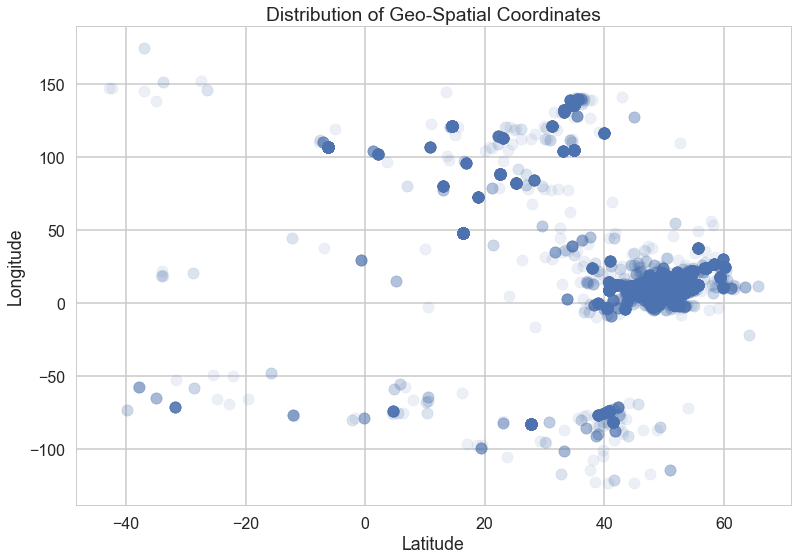

In [116]:
plt.title('Distribution of Geo-Spatial Coordinates')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.scatter(*zip(*ppnPosition),alpha=0.1)
if saveFiguresAsPDF:
    plt.savefig('./figures/sample.pdf')

* Latitudes range from -90 to 90. -> x-Achse sollte 180 breit sein, Mitte ist 90
* Longitudes range from -180 to 180 -> y-Achse sollte 360 breit sein, Mitte ist 180


In [117]:
feats=ppnPosition

# define the number of clusters to be found
true_k=30
printLog("Clustering of %i elements started with %i as cluster target size."%(len(feats),true_k))
# initialize the k-means algorithm
#km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
# we will rely on the mini batch k-means algorithm due to performance consideration otherwise your computer might crash...
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

# apply the algorithm on the data
km.fit(feats)
printLog("Clustering finished.")
km.labels_

[2017-02-27 17:29:09.144474]	Clustering of 83418 elements started with 30 as cluster target size.
[2017-02-27 17:29:09.418089]	Clustering finished.


array([13, 19,  6, ...,  0, 16, 11], dtype=int32)

bounding boxes aus http://boundingbox.klokantech.com/

Visualization with GeoJSON (http://geojson.org/) https://pypi.python.org/pypi/geojson and OpenLayers  http://openlayers.org/en/latest/doc/ http://openlayers.org/en/latest/apidoc/




In [118]:
regions=["Europe","Africa","Asia","Australia","SouthAmerica","NorthAmerica"]
regionBoundingBox=dict()
#westlimit=-22.5; southlimit=33.6; eastlimit=58.4; northlimit=82.9
regionBoundingBox["Europe"]=[33.6,82.9,-22.5,58.4]
#africa westlimit=-22.9; southlimit=-63.7; eastlimit=58.0; northlimit=37.2
regionBoundingBox["Africa"]=[-63.7,37.2,-22.9,58.0]
#asia westlimit=29.5; southlimit=-11.4; eastlimit=-168.4; northlimit=81.2
regionBoundingBox["Asia"]=[-11.4,81.2,-168.4,29.5]
#australia westlimit=112.5; southlimit=-50.4; eastlimit=-162.9; northlimit=-10.0
regionBoundingBox["Australia"]=[-50.4,-10.0,-162.9,112.5]
#south america westlimit=-119.5; southlimit=-57.0; eastlimit=-29.9; northlimit=28.1
regionBoundingBox["SouthAmerica"]=[-57.0,28.1,-119.5,-29.9]
#north america westlimit=-169.1; southlimit=23.7; eastlimit=-20.0; northlimit=71.4
regionBoundingBox["NorthAmerica"]=[23.7,71.4,-169.1,-20.0]


# man muss checken in welchen intervallen die kontinente liegen, insb. bei 2 und 3
def getRegion(lat,lng):
    for region in regions:
        if region in regionBoundingBox:
            if regionBoundingBox[region][0] <= lat <= regionBoundingBox[region][1]:
                if regionBoundingBox[region][2] <= lng <= regionBoundingBox[region][3]:
                    return region

    return "other"

#print getRegion(51,10)



In [119]:
# combine all arrays and check if there is more than one location associated with a PPN
# ppnPosition is (lat,lng)
printLog("Creating GeoJSON data...")
multipleCitiesPPN=pickleDecompress("./picklez/multipleSpatialNamesPerPPN.picklez")

baseDir="./web/data/layers/"
fileName=baseDir+"test.json"
locationFeatures=dict()
locationFeaturesGlobal=[]

spots=zip(ppnPositionLabels, ppnPositionSpatialClean,ppnPosition)

for spot in spots:
    ppn=spot[0]
    leadingLoc=spot[1]
    latLng=spot[2]
    # GeoJSON points are in longitude , latitude but our storage is lat/lng
    my_point = gj.Point((latLng[1], latLng[0]))

    region=getRegion(latLng[0],latLng[1])
    if region not in locationFeatures:
        locationFeatures[region]=[]
        print("Adding "+region)
    else:
        locationFeatures[region].append(gj.Feature(geometry=my_point, properties={"title": leadingLoc+" "+ppn, "ppn":ppn}))
    
    locationFeaturesGlobal.append(gj.Feature(geometry=my_point, properties={"title": leadingLoc+" "+ppn, "ppn":ppn}))
    #print ppn
    if ppn in multipleCitiesPPN:
        array=multipleCitiesPPN[ppn]
        #if there are alternative locations for this PPN
        if len(array)>1:
            #print leadingLoc+" "+ppn
            #print "\t"+"; ".join(array).encode("utf-8")
            pass

for region in locationFeatures:
    geoJSON_collection=gj.FeatureCollection(locationFeatures[region])
    dump = gj.dumps(geoJSON_collection, sort_keys=True)

    jsonFile = open(baseDir+region.lower()+".json", "w")
    jsonFile.write(dump)
    jsonFile.close()
    

geoJSON_collection=gj.FeatureCollection(locationFeaturesGlobal)
dump = gj.dumps(geoJSON_collection, sort_keys=True)

globalJSONPath=baseDir+"global.json"
jsonFile = open(globalJSONPath, "w")
jsonFile.write(dump)
jsonFile.close()
printLog("Serialized %i metadata records.\n\tSaved global JSON document at %s." %(len(locationFeaturesGlobal),globalJSONPath))

printLog("Done.")

[2017-02-27 17:29:09.503100]	Creating GeoJSON data...
[2017-02-27 17:29:09.504331]	Depickling from './picklez/multipleSpatialNamesPerPPN.picklez'
[2017-02-27 17:29:10.541805]	Depickling done.
Adding Europe
Adding other
Adding Asia
Adding Africa
Adding Australia
[2017-02-27 17:29:15.290048]	Serialized 83418 metadata records.
	Saved global JSON document at ./web/data/layers/global.json.
[2017-02-27 17:29:15.291348]	Done.


In [120]:
#print spots.index("PPN766441857")
#print(spots[10])
#print(getRegion(spots[10][2][0],spots[10][2][1]))

In [121]:
# we will create an inverted mapping from alternative location names to "leading" location names
# the resulting dicts "main" key will be the leading character of the alternative location name 
# within this map will be a mapping to the "leading" location name, e.g., 'Corfu' would be mapped to 'Korfu'
# lastLetter=r[0].lower()
osmNames=pickleDecompress('./picklez/osm_names.picklez')
osmAlternativesSorted=dict()
for leadLoc in osmNames:
    #print leadLoc
    for v in osmNames[leadLoc].values():
        leadingLetter=v[0].lower()
        if not leadingLetter in osmAlternativesSorted:
            osmAlternativesSorted[leadingLetter]=dict()
        else:
            osmAlternativesSorted[leadingLetter][v]=leadLoc

[2017-02-27 17:29:15.306266]	Depickling from './picklez/osm_names.picklez'
[2017-02-27 17:29:15.358683]	Depickling done.


In [122]:
# osmNames(key): alle alternativen titel in der Form names[loc][u'name']:
# u'Ems': {u'name:nl': u'Eems', u'name': u'Ems', u'name:de': u'Ems', u'name:la': u'Amisia'...
# latLng(key)[lat|lng]: latitude/longitude pro key

# Ideen

* Timeline und Grafisches Aussehen, x-Achse: Zeit, y-Achse. Farbe? Brightness? Entropy? Abweichung vom Referenzbild (Distanz zum QBE)? https://www.slideshare.net/formalist/how-and-why-study-big-cultural-data-v2-15552598 #43
* Dominante Farbe bestimmen, als 3D-Punkt nehmen und schauen, ob es mit etwas korreliert?
* Stabi-URL:



In [123]:
#g=df4.groupby("publisher")
#g.describe()

In [124]:
#g.count().plot(legend=False)

# Service Functions
to avoid problems with JSON access you should load the web pages from your own HTTP server

In [129]:
if True:#launchHTTPServer:
    # the resulting HTTP service will listen on port 8000 and open the main page in the browser
    import http_server
    http_server.load_url('web/webapps/index.html')

Webserver working directory: /Users/david/Documents/src/python/SBBrowse


127.0.0.1 - - [27/Feb/2017 18:07:59] "GET /web/webapps/qa/visualclusters.js HTTP/1.1" 200 -
127.0.0.1 - - [27/Feb/2017 18:08:51] "GET /web/webapps/qa/visualclusters.html HTTP/1.1" 200 -
127.0.0.1 - - [27/Feb/2017 18:08:51] "GET /web/webapps/common/SBBrowse_config.js HTTP/1.1" 200 -
127.0.0.1 - - [27/Feb/2017 18:08:51] "GET /web/webapps/css/sbbbrowse.css HTTP/1.1" 200 -
127.0.0.1 - - [27/Feb/2017 18:08:51] "GET /web/webapps/qa/visualclusters.js HTTP/1.1" 200 -
127.0.0.1 - - [27/Feb/2017 18:08:51] "GET /web/data/clusters.csv HTTP/1.1" 200 -
127.0.0.1 - - [27/Feb/2017 18:08:51] "GET /web/thumbnails/PPN3308101424.jpg HTTP/1.1" 200 -
127.0.0.1 - - [27/Feb/2017 18:08:51] "GET /web/thumbnails/PPN655634029.jpg HTTP/1.1" 200 -
127.0.0.1 - - [27/Feb/2017 18:08:51] "GET /web/thumbnails/PPN627401597.jpg HTTP/1.1" 200 -
127.0.0.1 - - [27/Feb/2017 18:08:51] "GET /web/thumbnails/PPN635598957.jpg HTTP/1.1" 200 -
127.0.0.1 - - [27/Feb/2017 18:08:51] "GET /web/thumbnails/PPN662350499.jpg HTTP/1.1" 200 -

Press <RETURN> to stop server

To restart server run: 
python -m http.server 8000
